<h2 align="center">Regularization,  Gradient Descent </h2>

# L2 Regularization - Ridge Regression

<ol>
   <li>
      <p><strong>Linear vs Ridge Regression</strong>:</p>
      <ul>
         <li>Linear Regression minimizes the residual sum of squares without regularization.</li>
         <li>Ridge Regression adds an L2 regularization term (<code>alpha</code>) that shrinks coefficients, which helps prevent overfitting.</li>
      </ul>
   </li>
   <li>
      <p><strong>Alpha in Ridge Regression</strong>:</p>
      <ul>
         <li>Higher <code>alpha</code> values lead to stronger regularization (simpler models), while lower values let the model fit the data more closely (but risk overfitting).</li>
      </ul>
   </li>
</ol>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Generate dummy data
np.random.seed(42)
# X = 2 * np.random.rand(20, 1)  # Features
# y = 4 + 3 * X + np.random.randn(20, 1)  # Target with some noise

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1,1)
y = np.array([4, 5, 10, 11, 16, 17, 22, 23, 28, 29]).reshape(-1,1)

In [ ]:
# Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = X[:7], X[7:], y[:7], y[7:]

In [ ]:
# Initialize models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)  # Default alpha for Ridge Regression

# Train models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)

# Make predictions
y_train_pred_linear = linear_reg.predict(X_train)
y_test_pred_linear = linear_reg.predict(X_test)
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
# Evaluate models using MSE and R-squared
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R²: {r2:.2f}")

print("Linear Regression:")
evaluate_model(y_train, y_train_pred_linear, "Train")
evaluate_model(y_test, y_test_pred_linear, "Test")

print("\nRidge Regression (alpha=1):")
evaluate_model(y_train, y_train_pred_ridge, "Train")
evaluate_model(y_test, y_test_pred_ridge, "Test")

Linear Regression:
Train - MSE: 0.98, R²: 0.97
Test - MSE: 1.12, R²: 0.84

Ridge Regression (alpha=1):
Train - MSE: 1.02, R²: 0.97
Test - MSE: 0.90, R²: 0.87


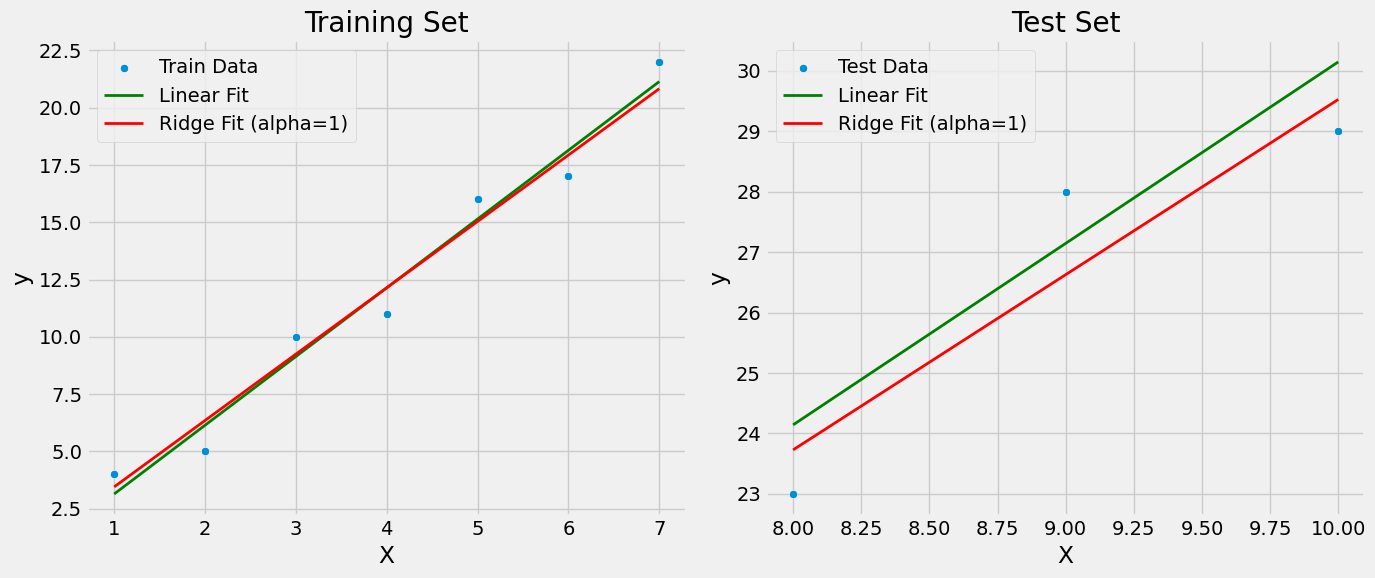

In [ ]:
# Visualize training data with regression lines
plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train.ravel(), y=y_train.ravel(), label='Train Data')
plt.plot(X_train, y_train_pred_linear, label='Linear Fit', color='green', linewidth=2)
plt.plot(X_train, y_train_pred_ridge, label='Ridge Fit (alpha=1)', color='red', linewidth=2)
plt.title('Training Set')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Test set
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test.ravel(), y=y_test.ravel(), label='Test Data')
plt.plot(X_test, y_test_pred_linear, label='Linear Fit', color='green', linewidth=2)
plt.plot(X_test, y_test_pred_ridge, label='Ridge Fit (alpha=1)', color='red', linewidth=2)
plt.title('Test Set')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


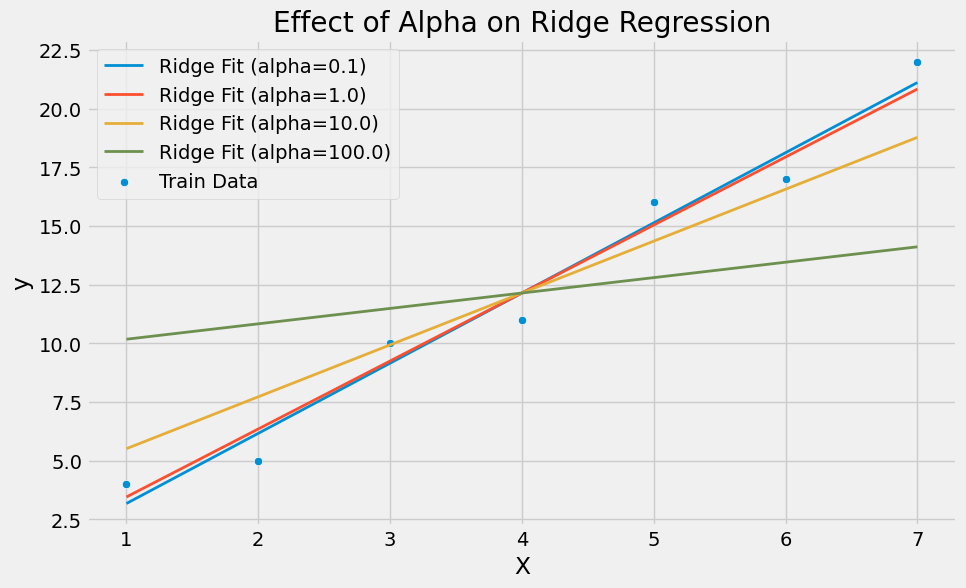

In [ ]:
# Visualize effect of different alpha values in Ridge Regression
alphas = [0.1, 1.0, 10.0, 100.0]
plt.figure(figsize=(10, 6))

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_train_pred_ridge = ridge_reg.predict(X_train)
    plt.plot(X_train, y_train_pred_ridge, label=f'Ridge Fit (alpha={alpha})', linewidth=2)

sns.scatterplot(x=X_train.ravel(), y=y_train.ravel(), label='Train Data')
plt.title('Effect of Alpha on Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# L1 Regularization - LASSO Model

<ol>
   <li>
      <p><strong>What & Why LASSO?</strong>:</p>
      <ul>
         <li>L1 Regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator), is used to prevent overfitting by adding a penalty to the model's coefficients.</li>
         <li>
         The higher the value of alpha, the stronger the regularization, causing more features to be set to zero (removed).
         </li>
      </ul>
   </li>
   <li>
      <p><strong>LASSO vs Ridge Regression</strong>:</p>
      <ul>
         <li>Ridge Regression (L2 Regularization) penalizes the square of the coefficients, leading to smaller coefficients but not necessarily zeroing them out.</li>
         <li>Lasso Regression (L1 Regularization) can shrink coefficients to zero, which makes it useful for feature selection.</li>
      </ul>
   </li>
</ol>

In [ ]:
from sklearn.linear_model import Lasso

# Generate dummy data with more features (some irrelevant)
X = np.random.rand(100, 5)  # 5 features

# Only first two features contribute to the output
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression models
lasso_reg = Lasso(alpha=0.1)
linear_reg = LinearRegression()

In [ ]:
# Training
lasso_reg.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)

# Inference
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)
y_train_pred_linear = linear_reg.predict(X_train)
y_test_pred_linear = linear_reg.predict(X_test)


print("Linear Regression:")
evaluate_model(y_train, y_train_pred_linear, "Train")
evaluate_model(y_test, y_test_pred_linear, "Test")

print("\nLasso Regression (alpha=0.1):")
evaluate_model(y_train, y_train_pred_lasso, "Train")
evaluate_model(y_test, y_test_pred_lasso, "Test")


Linear Regression:
Train - MSE: 0.85, R²: 0.56
Test - MSE: 1.10, R²: 0.25

Lasso Regression (alpha=0.1):
Train - MSE: 1.16, R²: 0.41
Test - MSE: 0.86, R²: 0.42


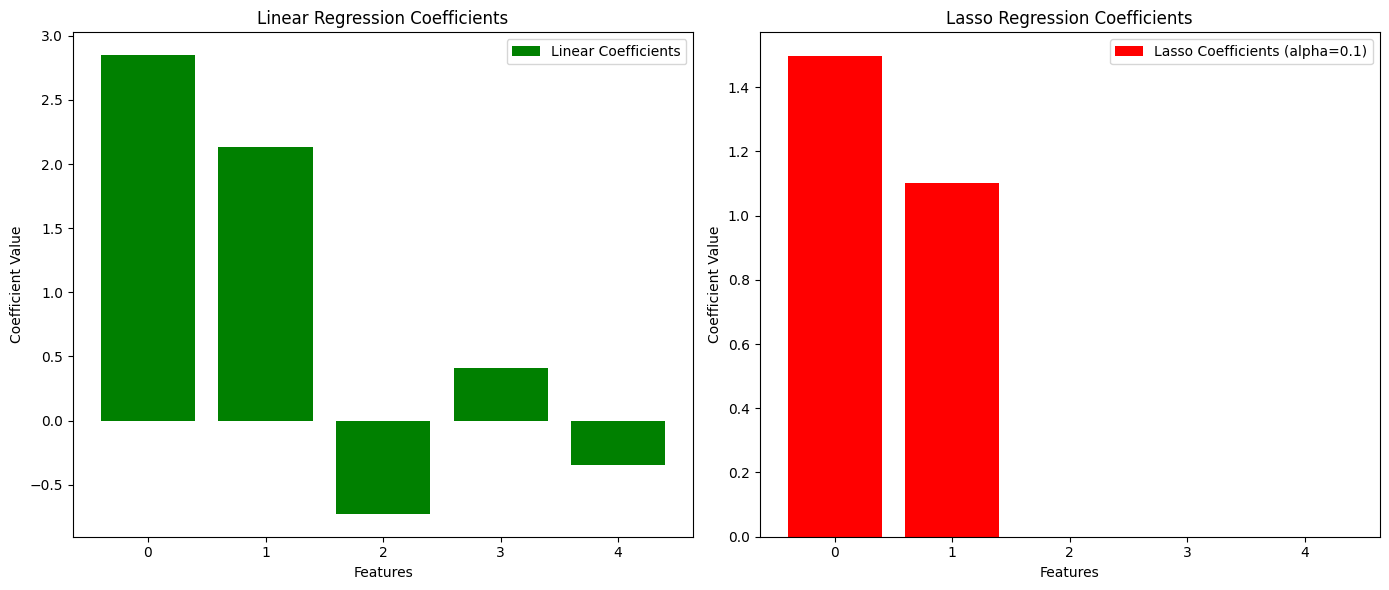

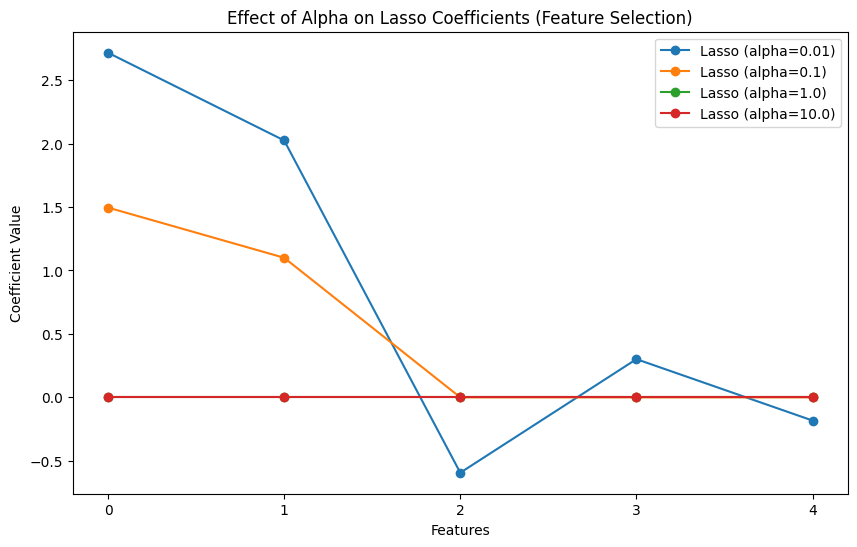

In [ ]:
# Visualize effect of L1 regularization
plt.figure(figsize=(14, 6))

# Visualize coefficients of the linear model
plt.subplot(1, 2, 1)
plt.bar(range(X.shape[1]), linear_reg.coef_, color='green', label='Linear Coefficients')
plt.title('Linear Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(range(X.shape[1]))
plt.legend()

# Visualize coefficients of the Lasso model
plt.subplot(1, 2, 2)
plt.bar(range(X.shape[1]), lasso_reg.coef_, color='red', label='Lasso Coefficients (alpha=0.1)')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(range(X.shape[1]))
plt.legend()

plt.tight_layout()
plt.show()

# Demonstrate effect of different alpha values in Lasso
alphas = [0.01, 0.1, 1.0, 10.0]
plt.figure(figsize=(10, 6))

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    plt.plot(range(X.shape[1]), lasso_reg.coef_, marker='o', label=f'Lasso (alpha={alpha})')

plt.title('Effect of Alpha on Lasso Coefficients (Feature Selection)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(range(X.shape[1]))
plt.legend()
plt.show()


# Gradient Descent

* Gradient Descent is an optimization algorithm used to minimize the cost function by iteratively adjusting the parameters (weights) of the model.<br>
* It is commonly used when direct analytical solutions (like the normal equation in linear regression) are computationally expensive or impossible due to the size of the data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Solve the House Price regression problem
# Suppose that X below represents House Area (meter^2)
x = np.array([1,3,4,7,9,12,13,15,18])

# I know, values are illogical, skip this for now
# Suppose that y represents House Price (x100K)
y = np.array([2, 4, 13, 18, 14, 21, 30, 35, 33])

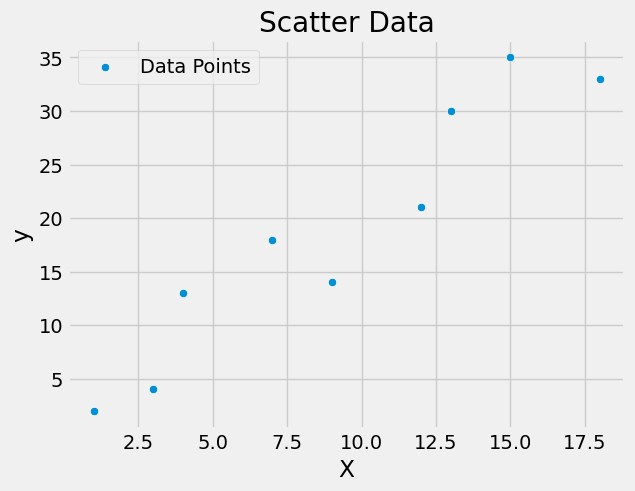

In [ ]:
sns.scatterplot(x=x, y=y, label='Data Points')
plt.title('Scatter Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

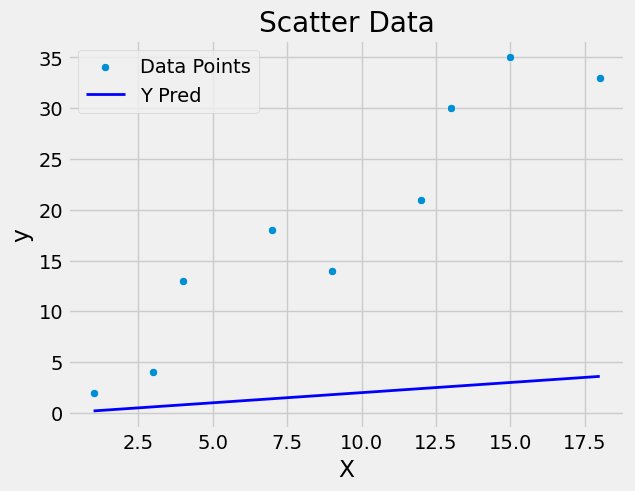

In [ ]:
# Suppose random values for W, b
w = 0.2
b = 0
# Draw prediction line
y_pred = w * x + b
sns.scatterplot(x=x, y=y, label='Data Points')
plt.plot(x, y_pred, label='Y Pred', color='blue', linewidth=2)
plt.title('Scatter Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Sum of squared residuals
def ssr(y, y_pred):
    return sum((y - y_pred) ** 2)

Sum of Squared Residuals = 3573.12


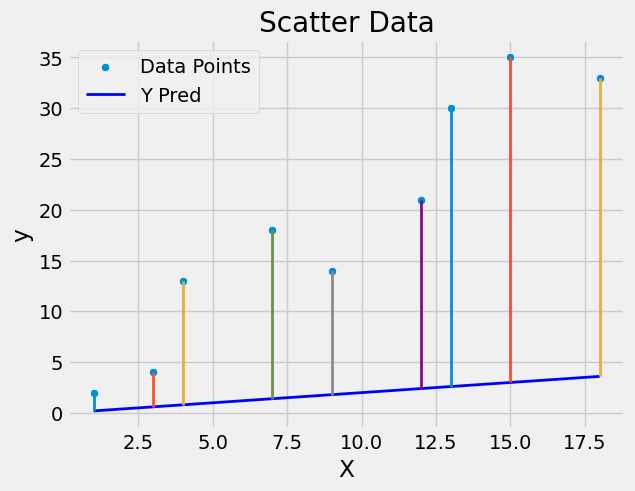

In [ ]:
# Calculate Dist
distance = ssr(y, y_pred)
print(f"Sum of Squared Residuals = {distance}")

sns.scatterplot(x=x, y=y, label='Data Points')
plt.plot(x, y_pred, label='Y Pred', color='blue', linewidth=2)
plt.plot([x,x], [y,y_pred], linewidth=2)
plt.title('Scatter Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Sum of Squared Residuals = 3217.4399999999996


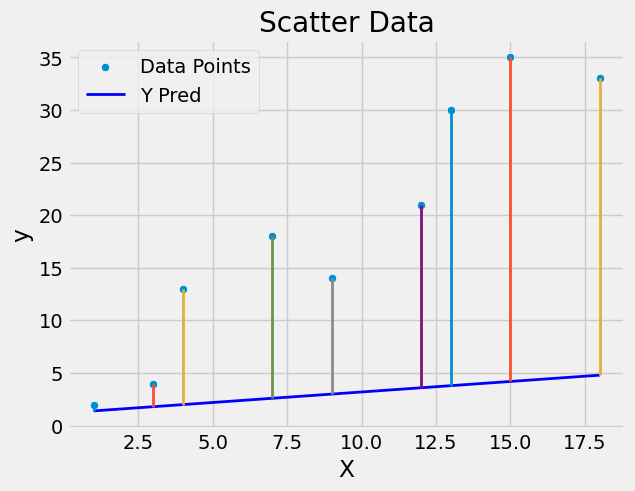

Sum of Squared Residuals = 2172.75


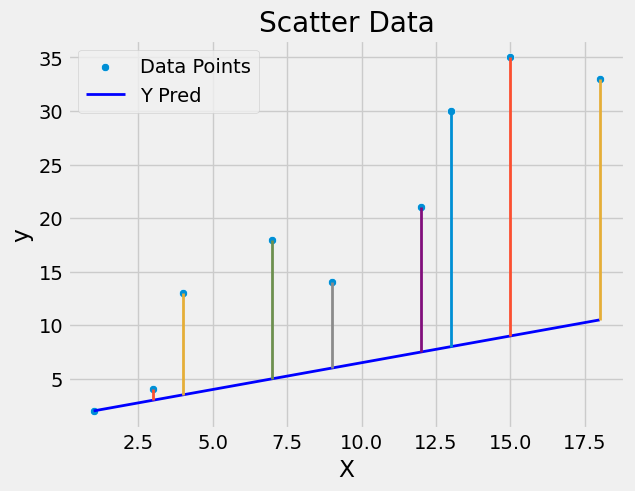

Sum of Squared Residuals = 1342.4399999999998


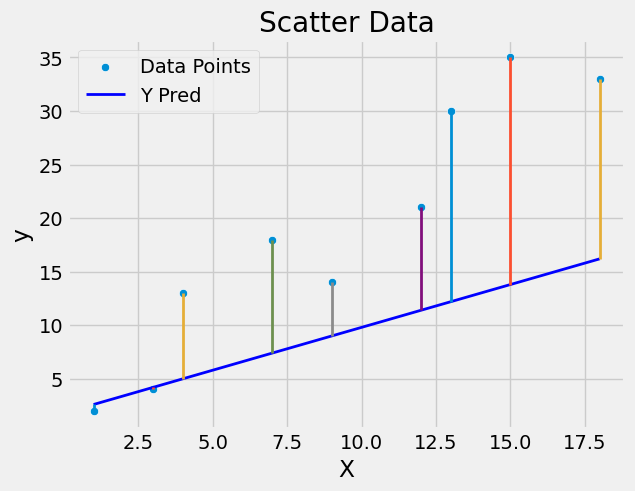

Sum of Squared Residuals = 908.0


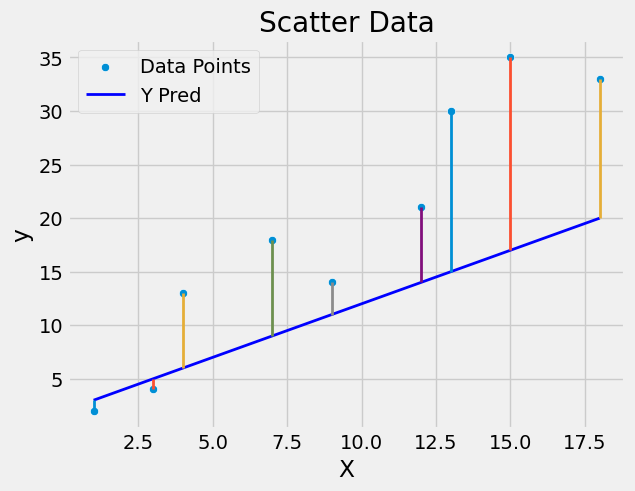

Sum of Squared Residuals = 568.84


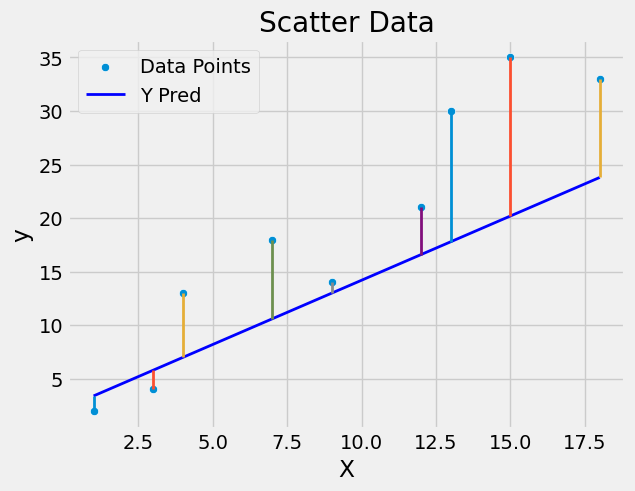

Sum of Squared Residuals = 324.9600000000001


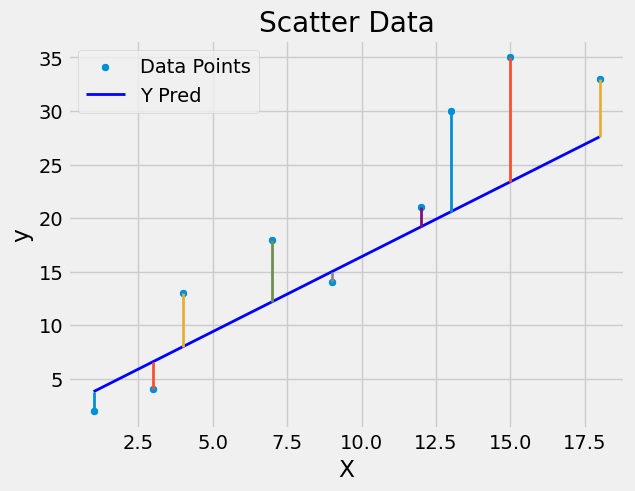

Sum of Squared Residuals = 176.35999999999996


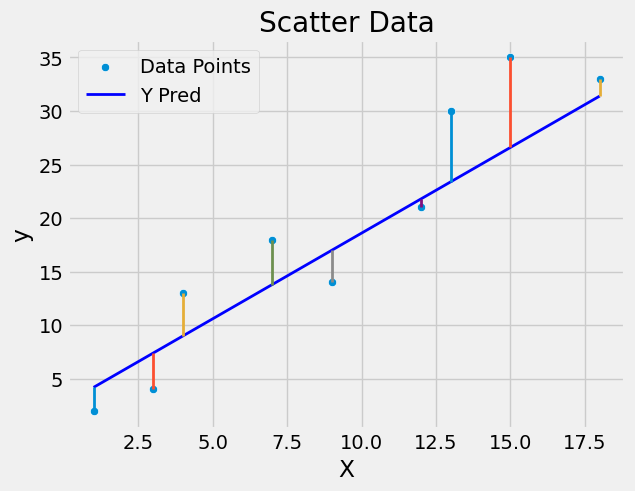

Sum of Squared Residuals = 123.03999999999996


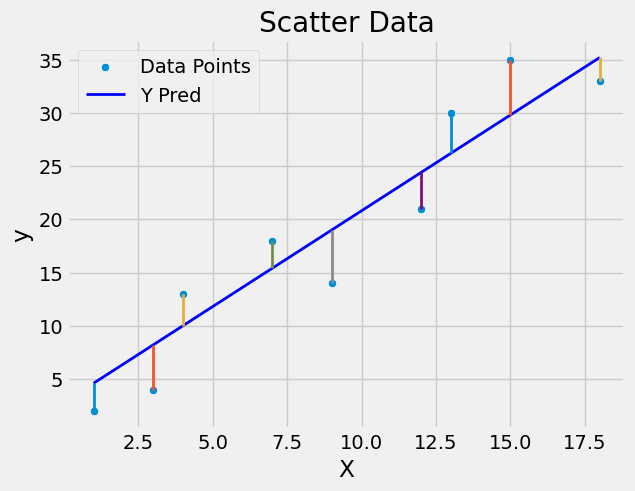

Sum of Squared Residuals = 165.0


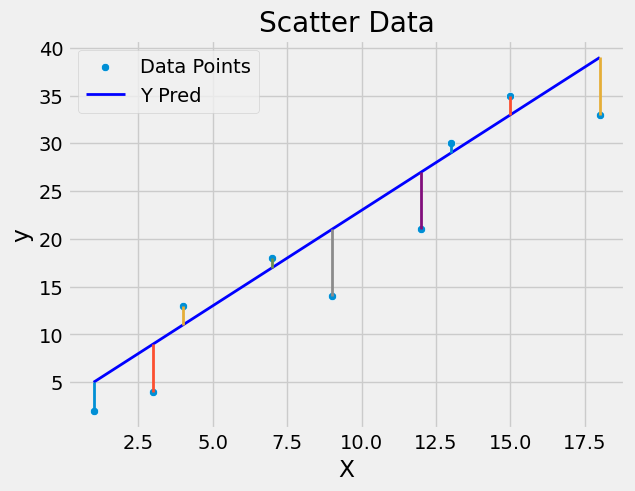

In [ ]:
w = [0.2, 0.5, 0.8, 1., 1.2, 1.4, 1.6, 1.8, 2.0]
b = [1.2, 1.5, 1.8, 2., 2.2, 2.4, 2.6, 2.8, 3.0]
for (w,b) in zip(w,b):
  y_pred = w * x + b
  distance = ssr(y, y_pred)
  print(f"Sum of Squared Residuals = {distance}")

  sns.scatterplot(x=x, y=y, label='Data Points')
  plt.plot(x, y_pred, label='Y Pred', color='blue', linewidth=2)
  plt.plot([x,x], [y,y_pred], linewidth=2)
  plt.title('Scatter Data')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.show()

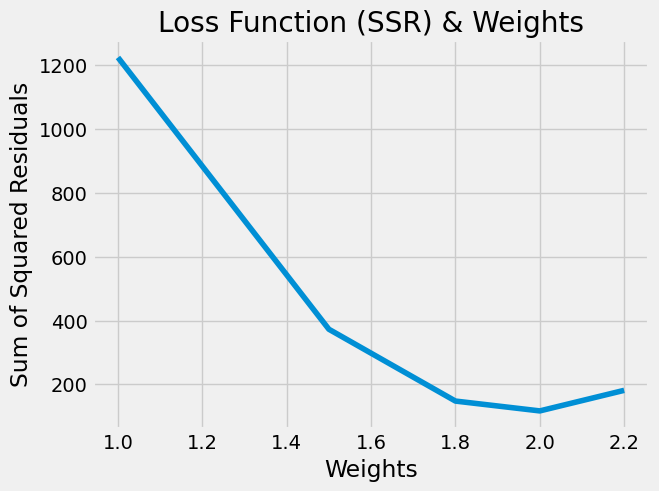

In [ ]:
# Try different values of W, B
ws = np.array([1, 1.5, 1.8, 2, 2.2])
bs = np.array([0, 0.5, 0.8, 1, 1.2])

# Calculate their distances
distances = np.array([])
for w, b in zip(ws, bs):
    y_pred = w * x + b
    distance = ssr(y, y_pred)
    distances = np.append(distances, distance)

# Plot different values for W and their SSR
plt.plot(ws, distances)
plt.title("Loss Function (SSR) & Weights")
plt.xlabel("Weights")
plt.ylabel("Sum of Squared Residuals")
plt.show()

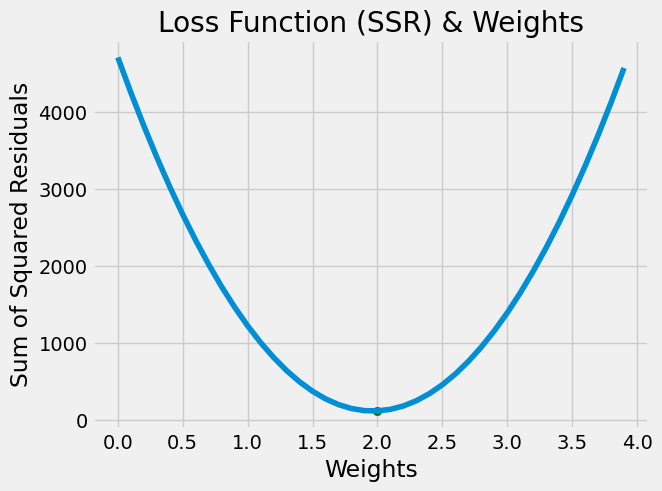

In [ ]:
# Function to apply SSR on different values of Ws and Bs
def test_parameters(ws, bs):
    distances = np.array([])
    for w, b in zip(ws, bs):
        error = ssr(y, w * x + b)
        distances = np.append(distances, error)
    return distances

ws = np.arange(0, 4, 0.1) # 0, 0.1, 0.2, ... 3.9
bs = np.arange(-1, 3, 0.1) # -1, -0.9, -0.8, ... 2.9
distances = test_parameters(ws, bs)
plt.plot(ws, distances)
plt.scatter(ws[distances.argmin()], distances[distances.argmin()], c='green')
plt.title("Loss Function (SSR) & Weights")
plt.xlabel("Weights")
plt.ylabel("Sum of Squared Residuals")
plt.show()

# Differentiation
**To get the slope of the loss function at specific point, we need to calculate the derivative of the loss function at that point .. using the following equation(s)**
<br>
![differ2031923.gif](https://user-images.githubusercontent.com/50156227/197768787-8e621fb6-5b6e-4dda-a253-ad6e154cc49e.gif)

# Derivative of loss function to W
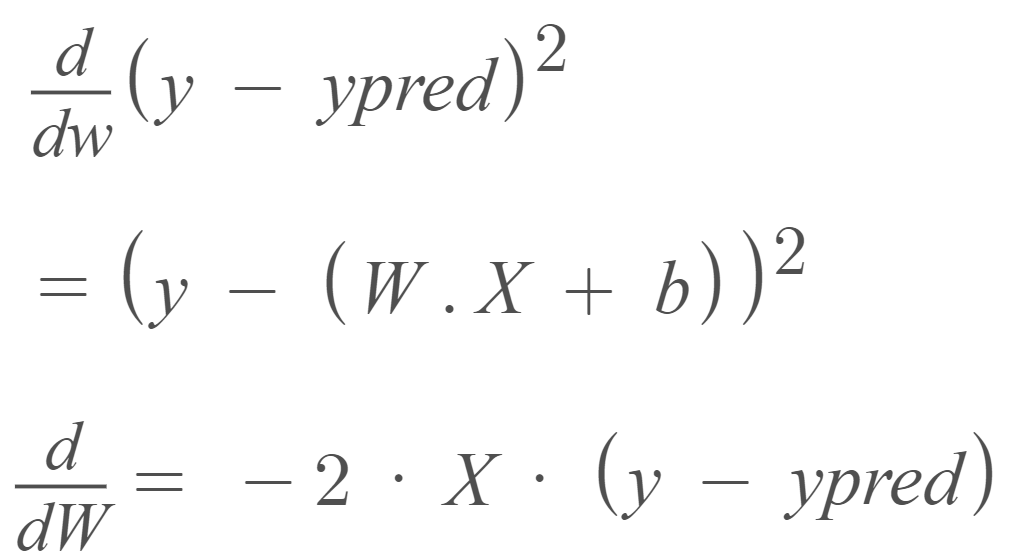

# Derivative of loss function to b
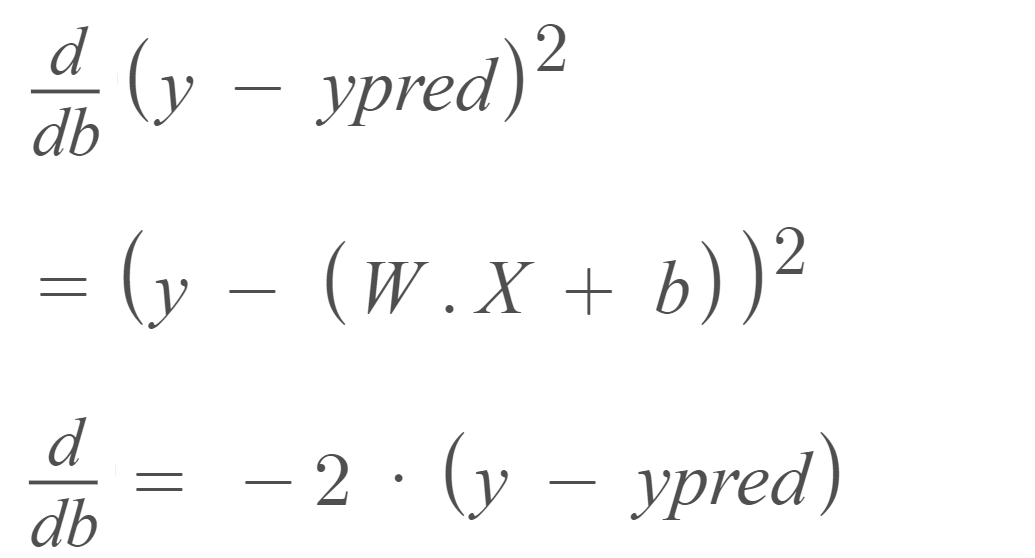

# Update rule
**In general, the update rule is as follows**
<br>
**New = Old - α . derivative**
<br>
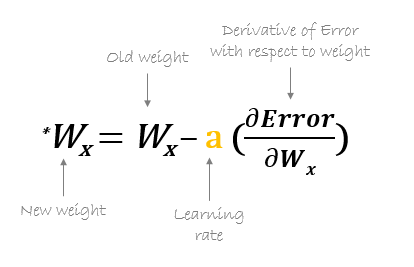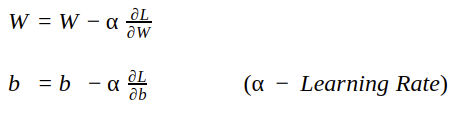

In [ ]:
def calc_gradient(x, y, y_pred, w, b, lr=0.0001):

    # Derivative of W
    w_gradient = np.sum(2 * x * (y-y_pred) * -1)

    # Derivative of b
    b_gradient = np.sum(2 * (y-y_pred) * -1)

    # Update W
    w = w - lr * w_gradient

    # Update b
    b = b - lr * b_gradient

    return w, b

In [ ]:
# This is the same function implemented above
# We just added some code for visualization (plot)
def calc_gradient(x, y, y_pred, w, b, lr=0.0001, plot=True):
    w_gradient = np.sum(2 * x * (y - y_pred) * -1)
    b_gradient = np.sum(2 * (y - y_pred) * -1)

    w = w - lr * w_gradient
    b = b - lr * b_gradient

    if plot:
        new_distance = ssr(y, (w * x + b))
        print(f"W = {w} | LossFunc Slope = ({w_gradient}) | Distance = {new_distance}")

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

        # Plot the data points and best-fitting line
        ax1.scatter(x, y, label="Data Points")
        ax1.plot(x, w * x + b, label="Best-fitting Line", color='orange')
        ax1.plot([x, x], [y, w * x + b], linestyle='--', color='gray')

        # Add X and Y labels and legend to the first plot
        ax1.set_xlabel("X (Input Feature)")
        ax1.set_ylabel("Y (Target)")
        ax1.set_title("Linear Regression")
        ax1.legend()

        # Calculate distances (losses) for a range of weights
        ws = np.arange(0, 4, 0.1)
        distances = [ssr(y, (w_i * x + b)) for w_i in ws]

        # Second plot for Loss Function
        ax2.scatter(w, new_distance, c="green", s=100, label="Current Loss")

        w_gradient = np.sum(2 * x * (y - (w * x + b)) * -1)
        drv_slope = w_gradient
        drv_intercept = y.mean() - drv_slope * w
        ax2.plot(ws, ws * drv_slope + drv_intercept, label="Gradient Line", color='blue')
        ax2.plot(ws, distances, c="red", label="Loss Curve")

        # Add X and Y labels and legend to the second plot
        ax2.set_xlabel("Weight (W)")
        ax2.set_ylabel("Loss (Sum of Squared Residuals)")
        ax2.set_title("Loss Function (Sum of Squared Residuals)")
        ax2.legend()

        plt.show()

    return w, b

# 25 Epochs of Gradient Descent


W = 0.4158 | LossFunc Slope = (-4158) | Distance = 2801.87415832


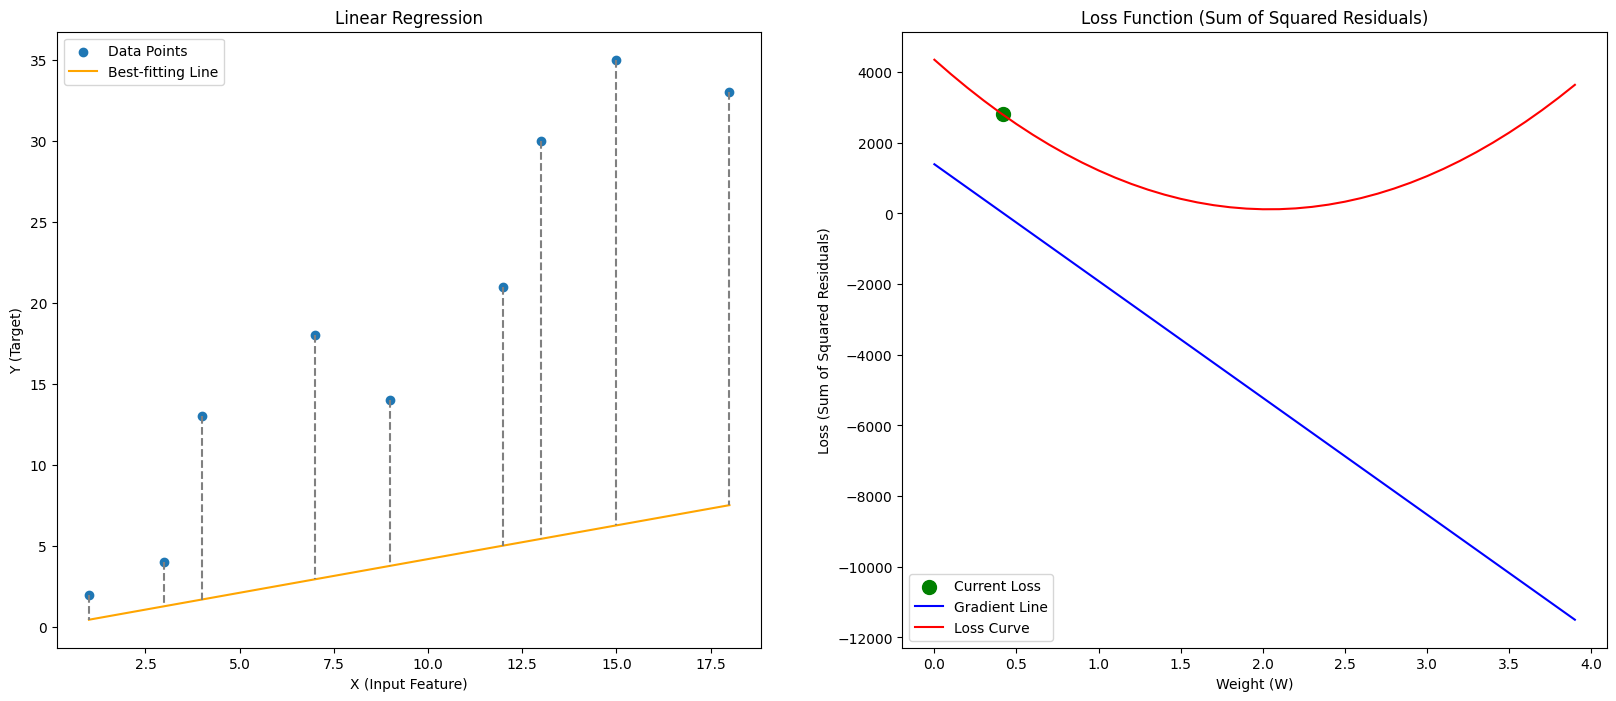

W = 0.74638552 | LossFunc Slope = (-3305.8552) | Distance = 1814.3824162824037


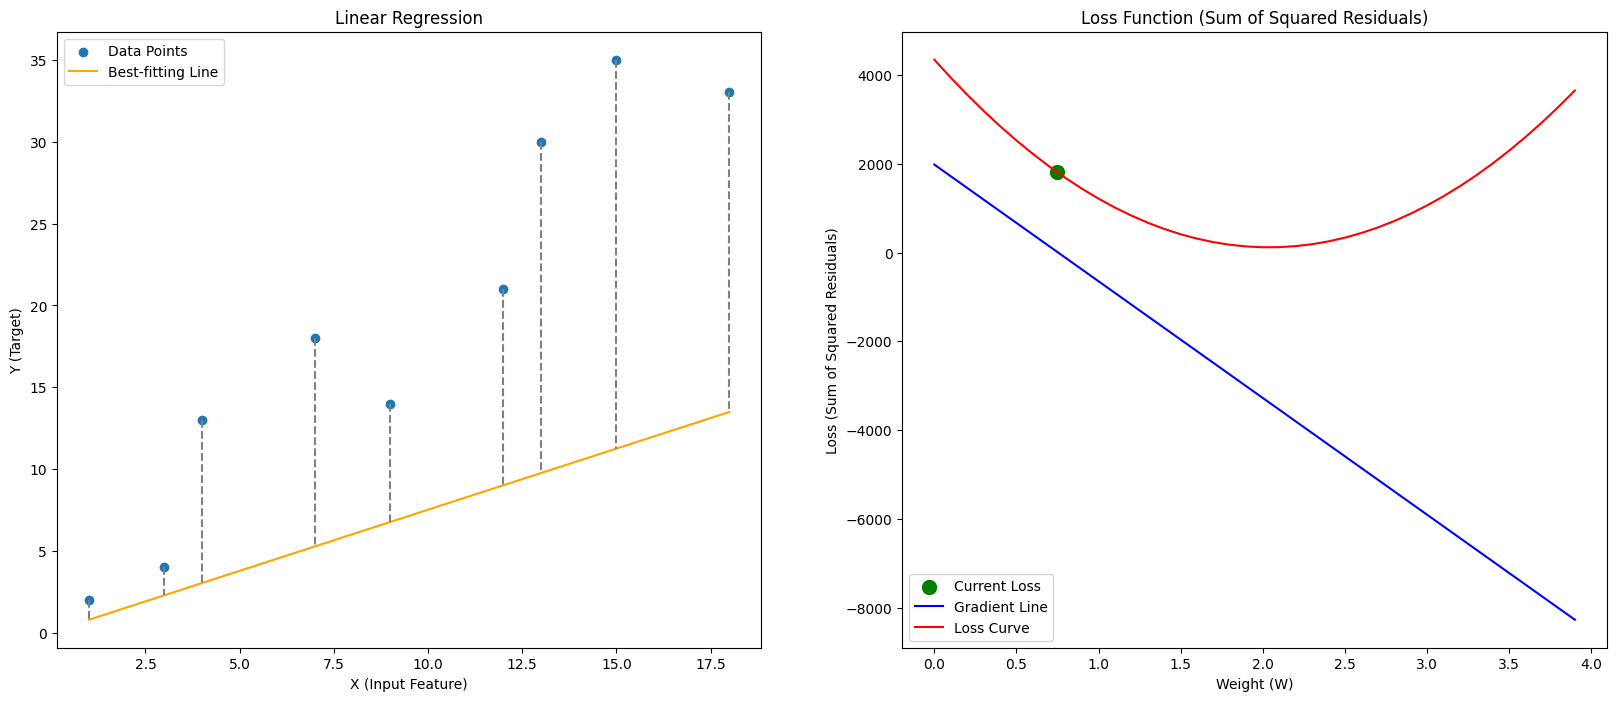

W = 1.009219065376 | LossFunc Slope = (-2628.33545376) | Distance = 1190.1431273341982


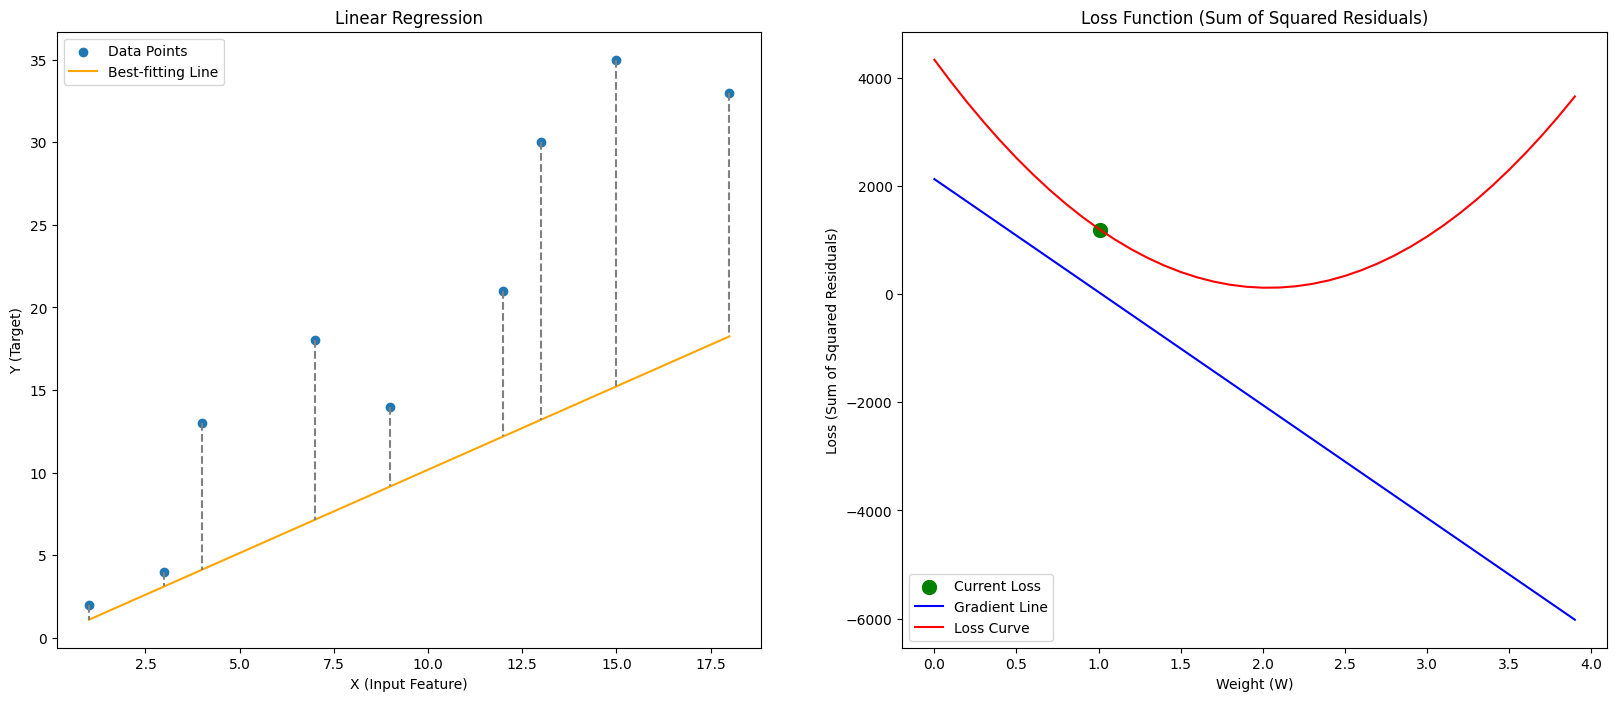

W = 1.218184653015859 | LossFunc Slope = (-2089.6558763985918) | Distance = 795.5323009015452


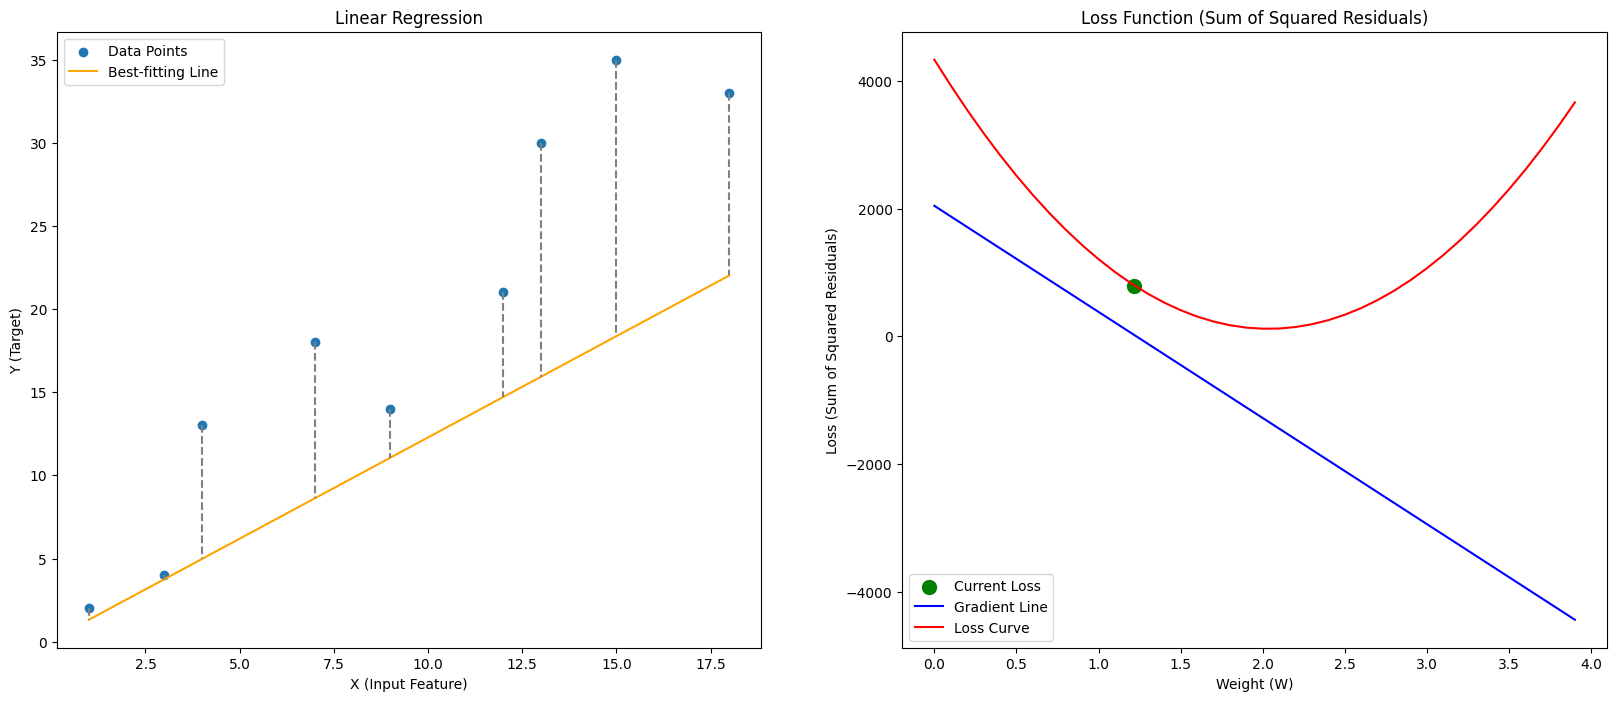

W = 1.384321129911236 | LossFunc Slope = (-1661.3647689537668) | Distance = 546.0801112068011


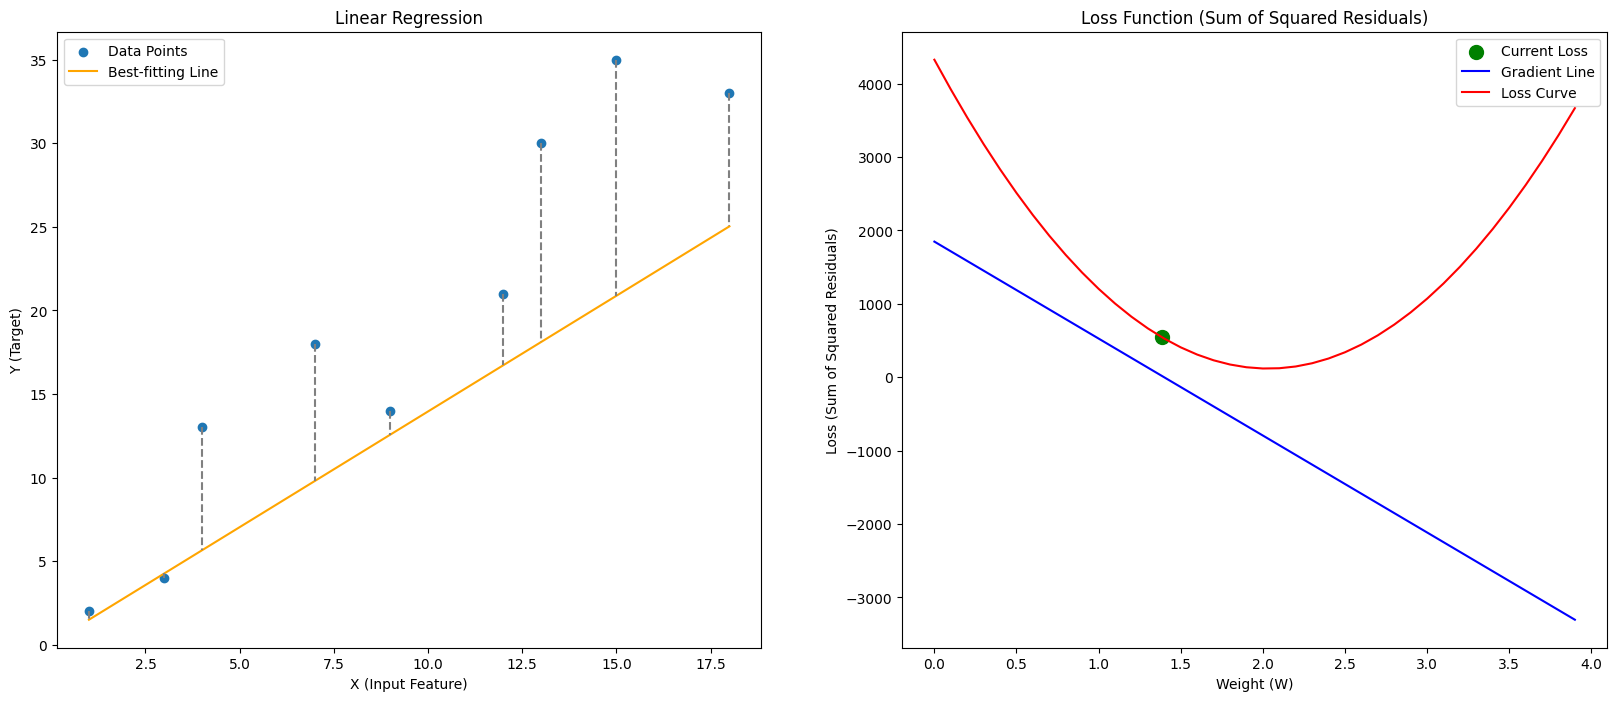

W = 1.51640521708494 | LossFunc Slope = (-1320.8408717370417) | Distance = 388.38932444267124


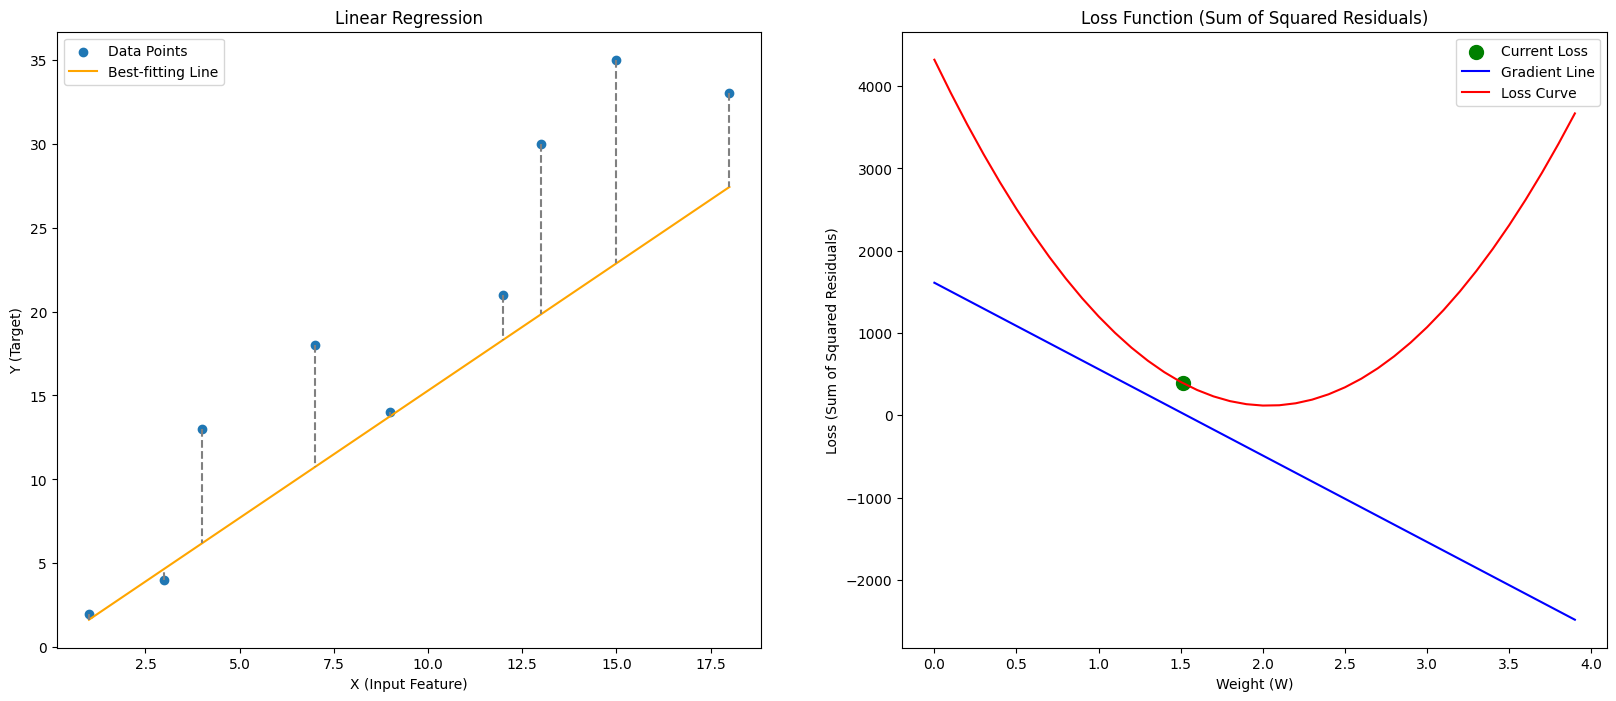

W = 1.6214150737565765 | LossFunc Slope = (-1050.098566716364) | Distance = 288.7051109757262


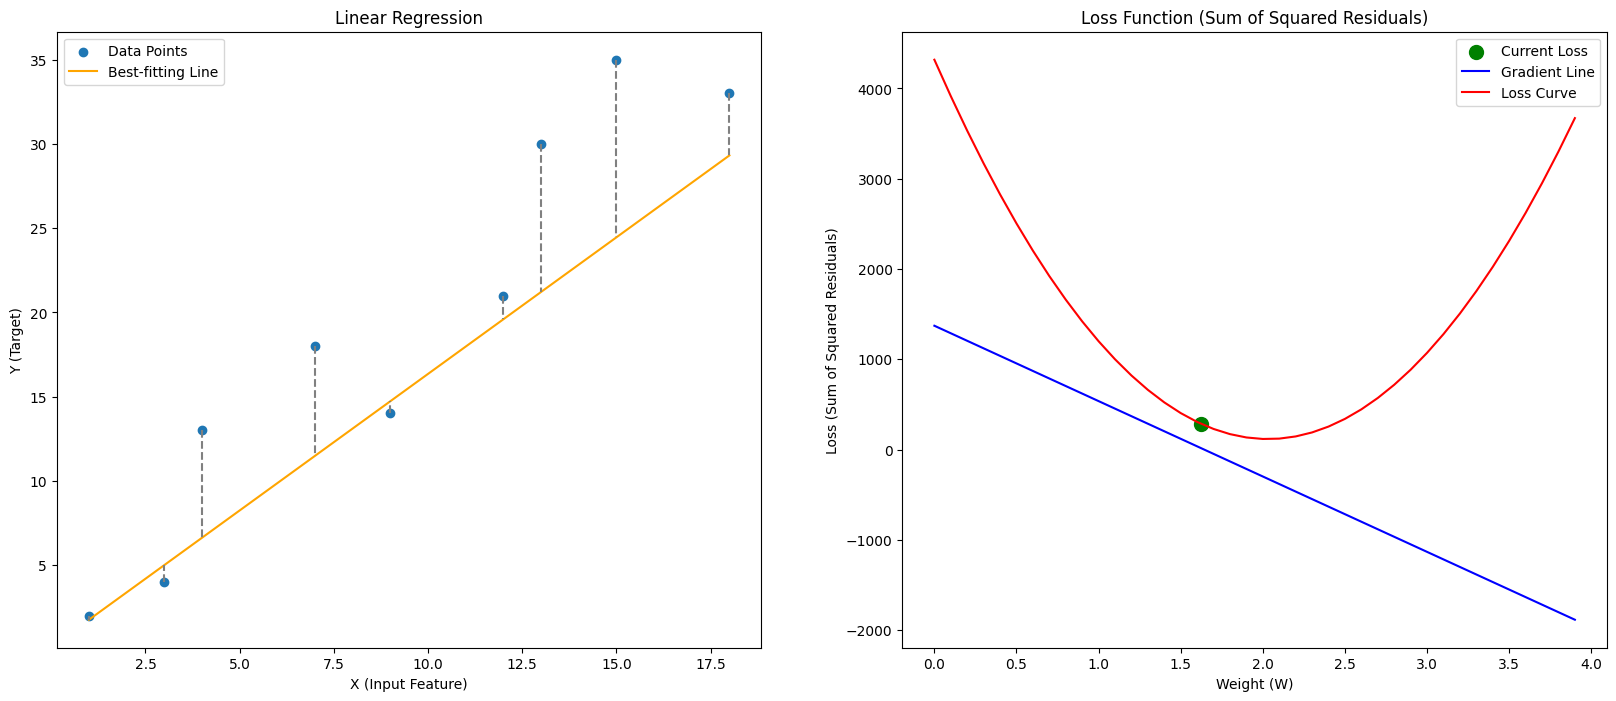

W = 1.7048988660310886 | LossFunc Slope = (-834.8379227451215) | Distance = 225.6895017324077


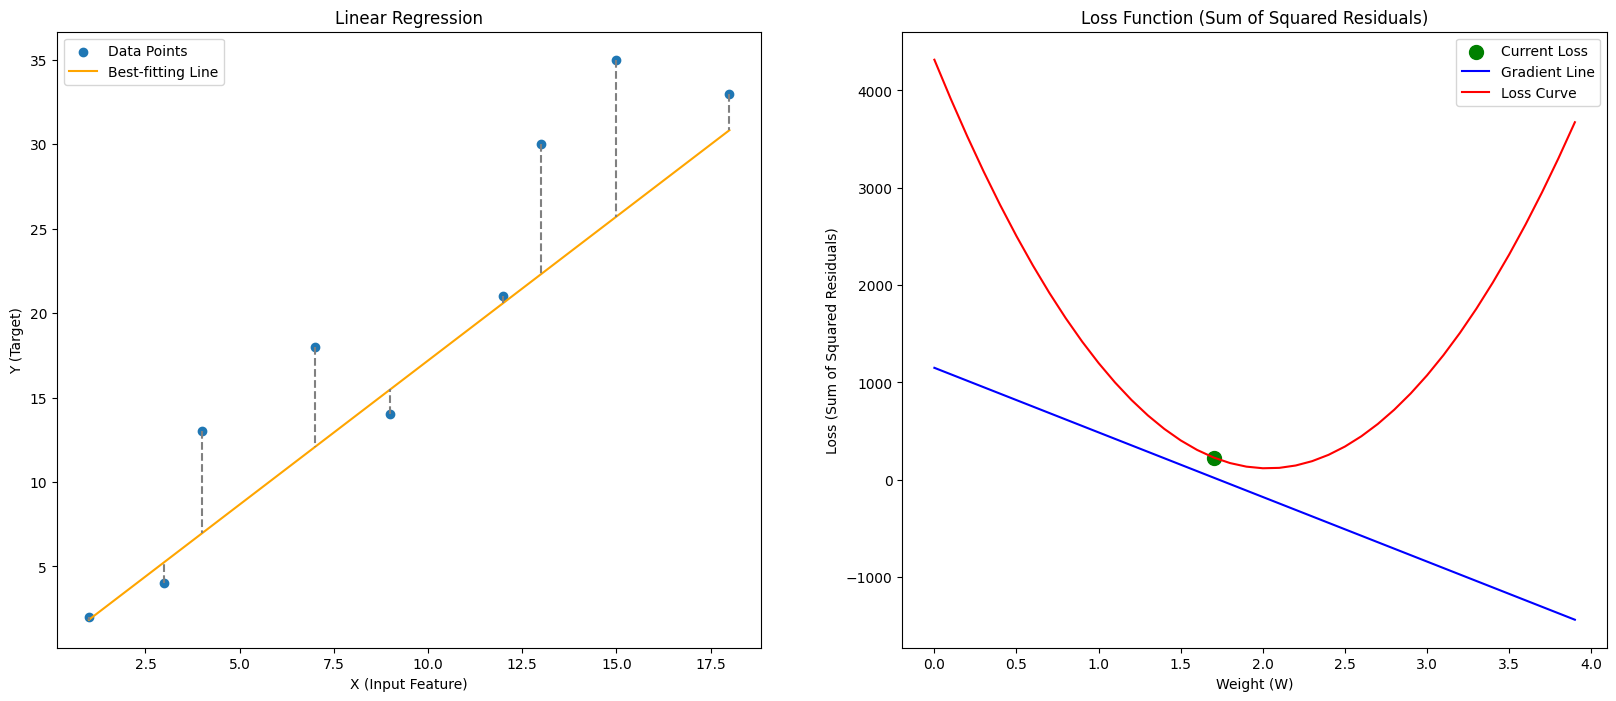

W = 1.7712678069744232 | LossFunc Slope = (-663.689409433346) | Distance = 185.85379215884325


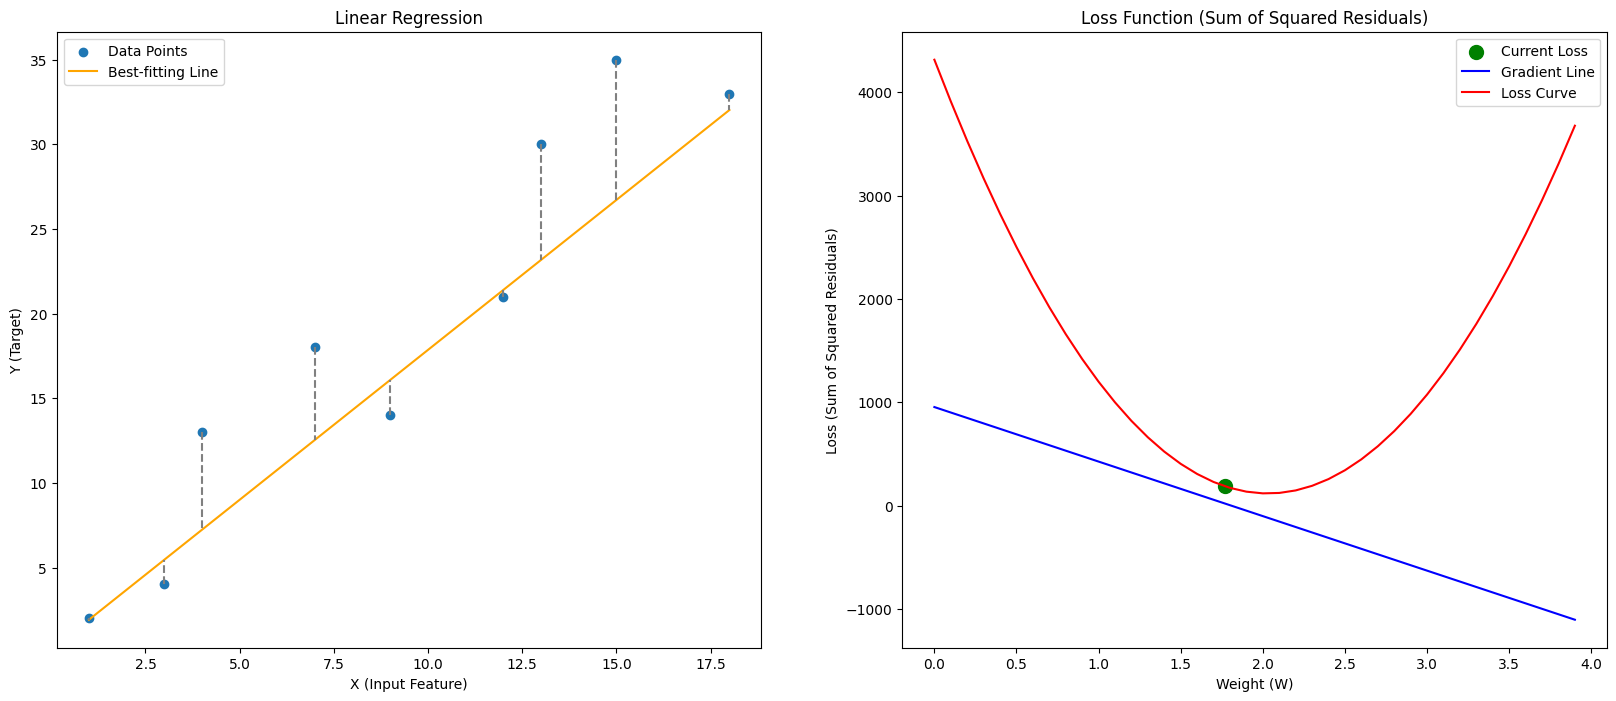

W = 1.8240291457105815 | LossFunc Slope = (-527.6133873615832) | Distance = 160.67115620522554


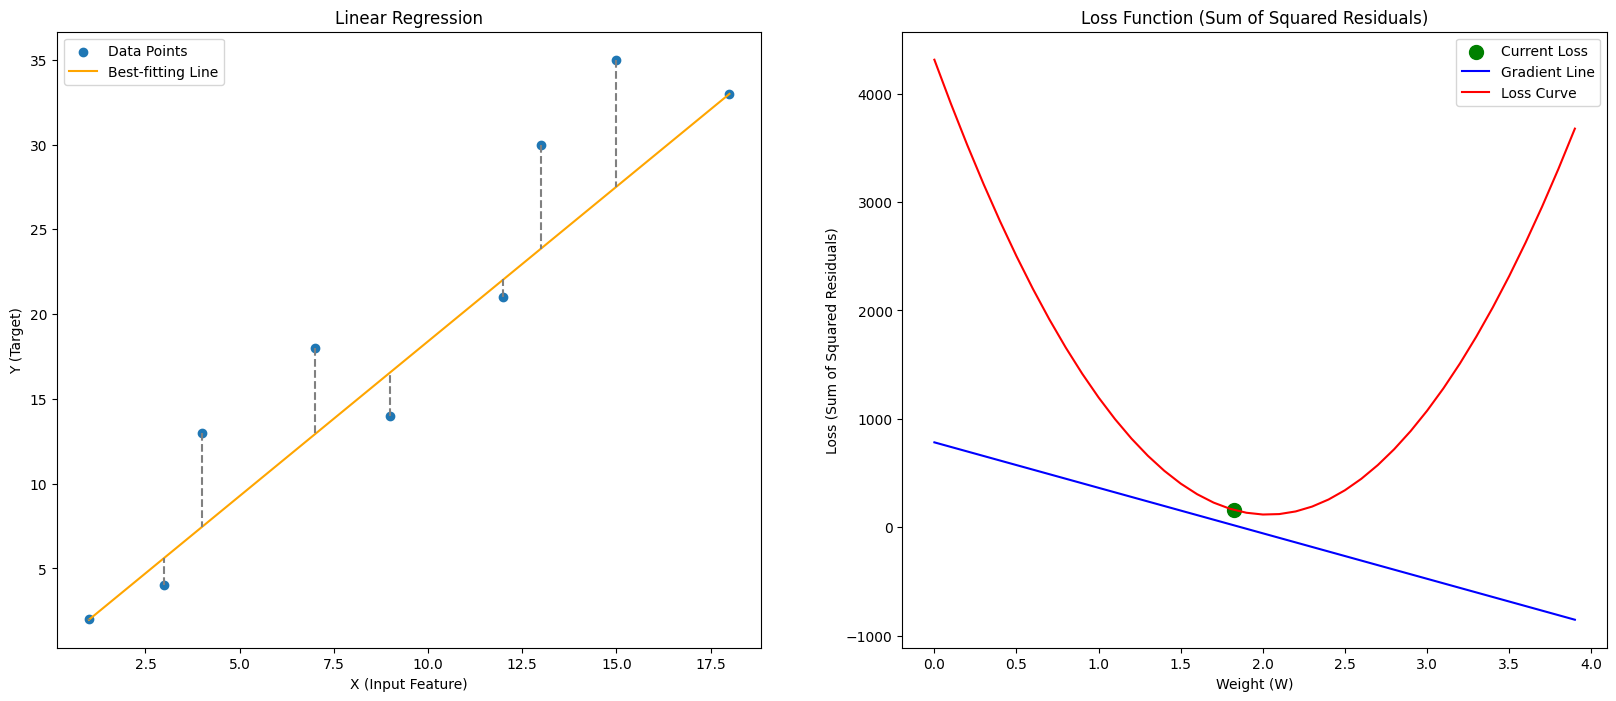

W = 1.8659714114337969 | LossFunc Slope = (-419.4226572321529) | Distance = 144.7513977859136


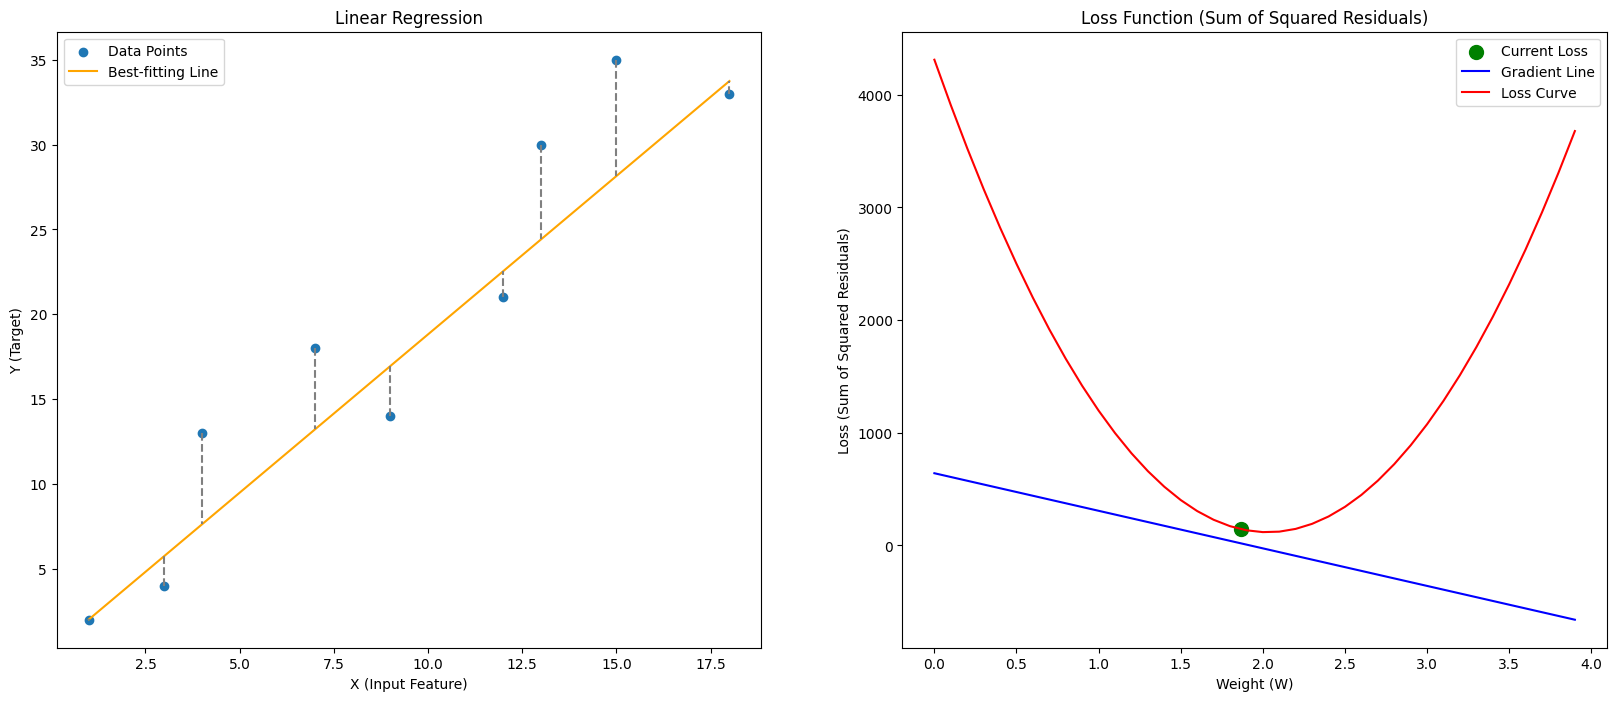

W = 1.899311696455174 | LossFunc Slope = (-333.40285021377156) | Distance = 134.68712783564078


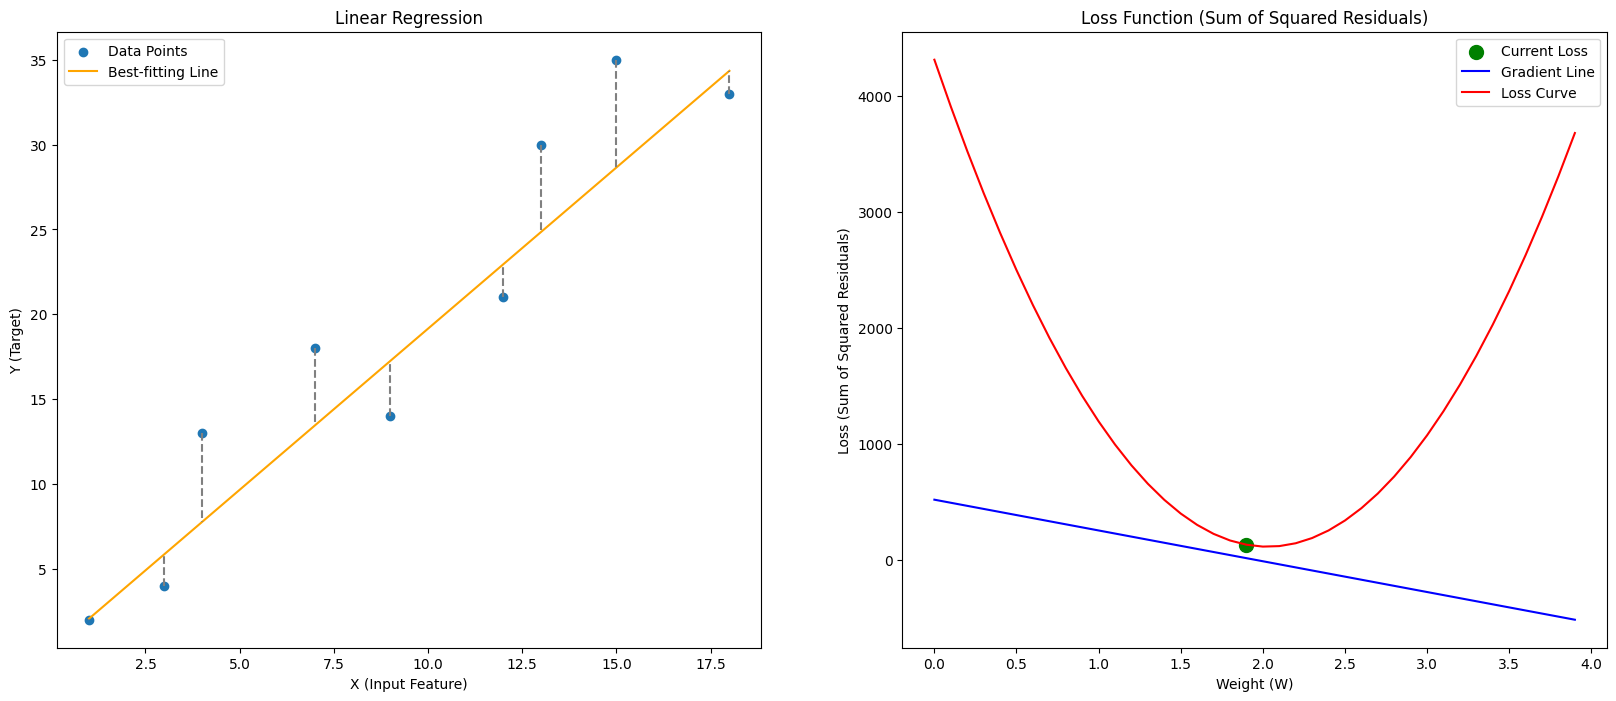

W = 1.9258127574011172 | LossFunc Slope = (-265.0106094594329) | Distance = 128.32438014263582


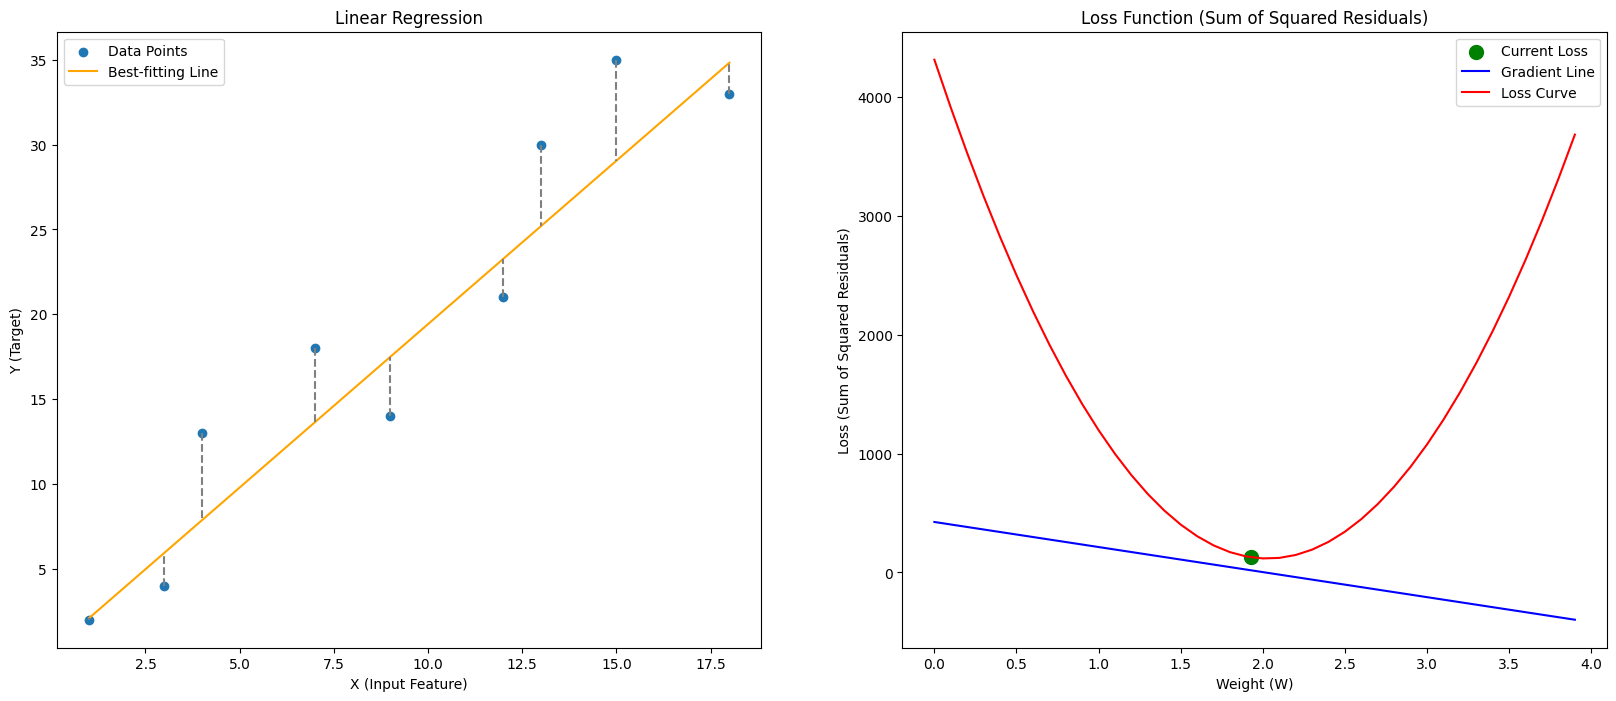

W = 1.9468761195521254 | LossFunc Slope = (-210.63362151008215) | Distance = 124.30153431271025


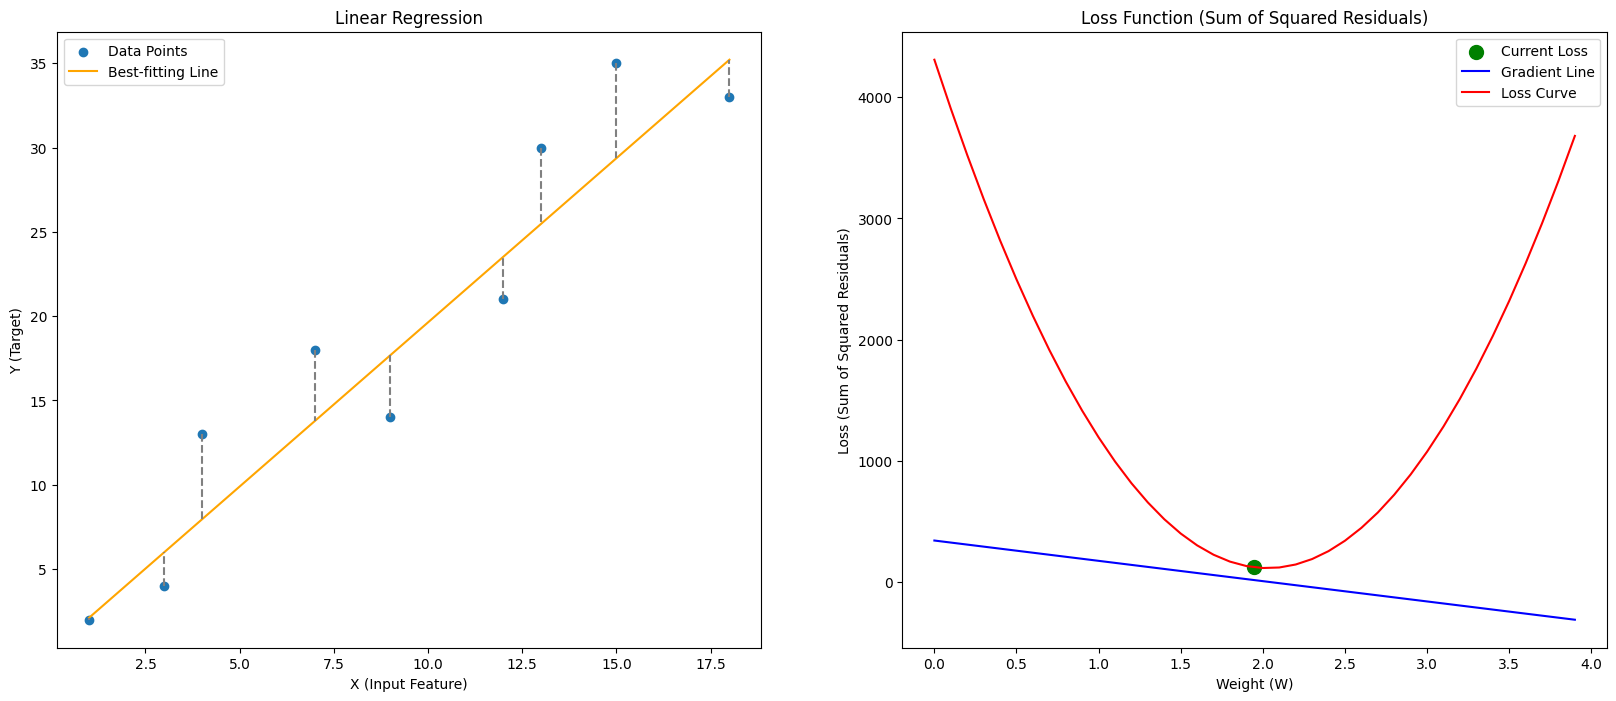

W = 1.9636161018572147 | LossFunc Slope = (-167.39982305089387) | Distance = 121.75784792185848


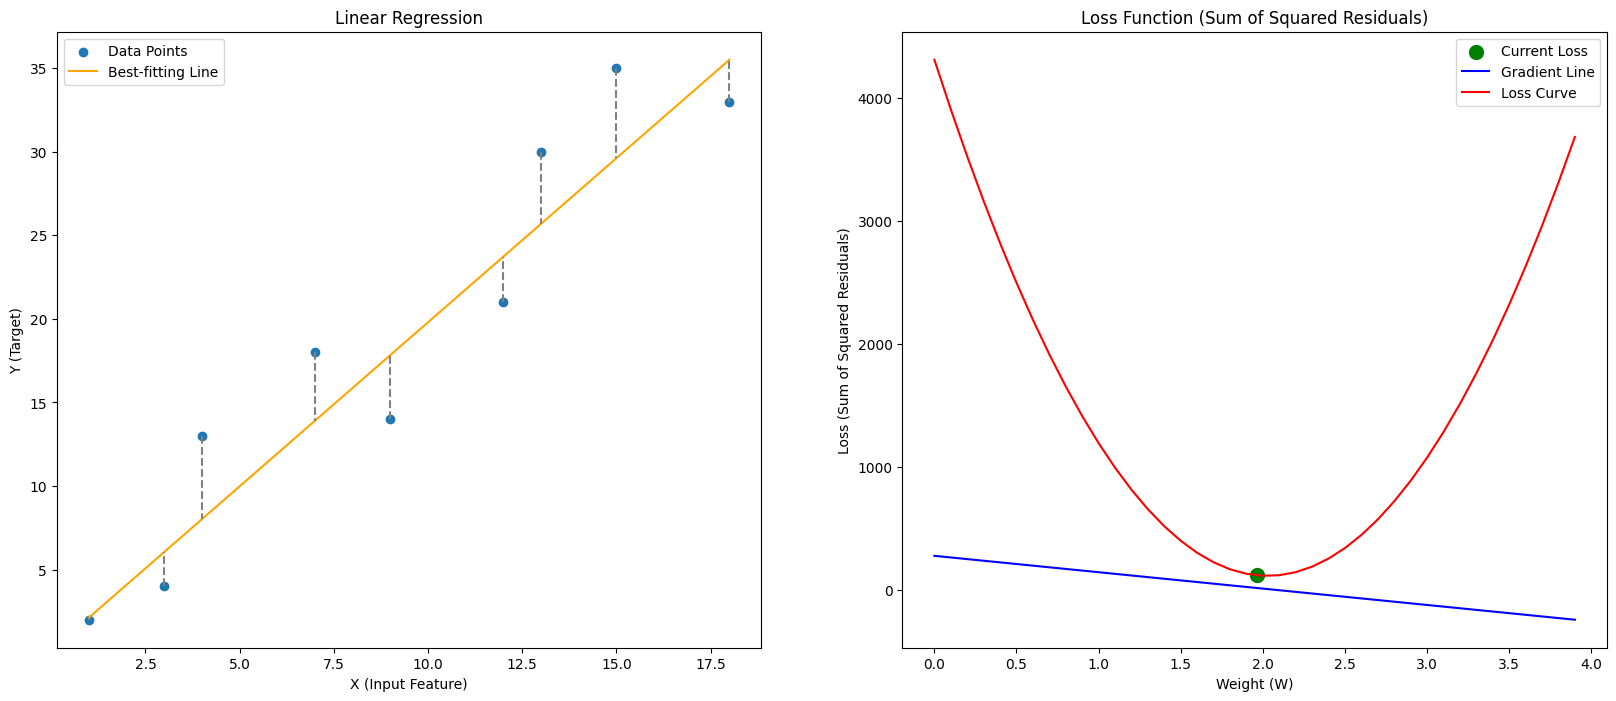

W = 1.97691867243766 | LossFunc Slope = (-133.02570580445288) | Distance = 120.149206381356


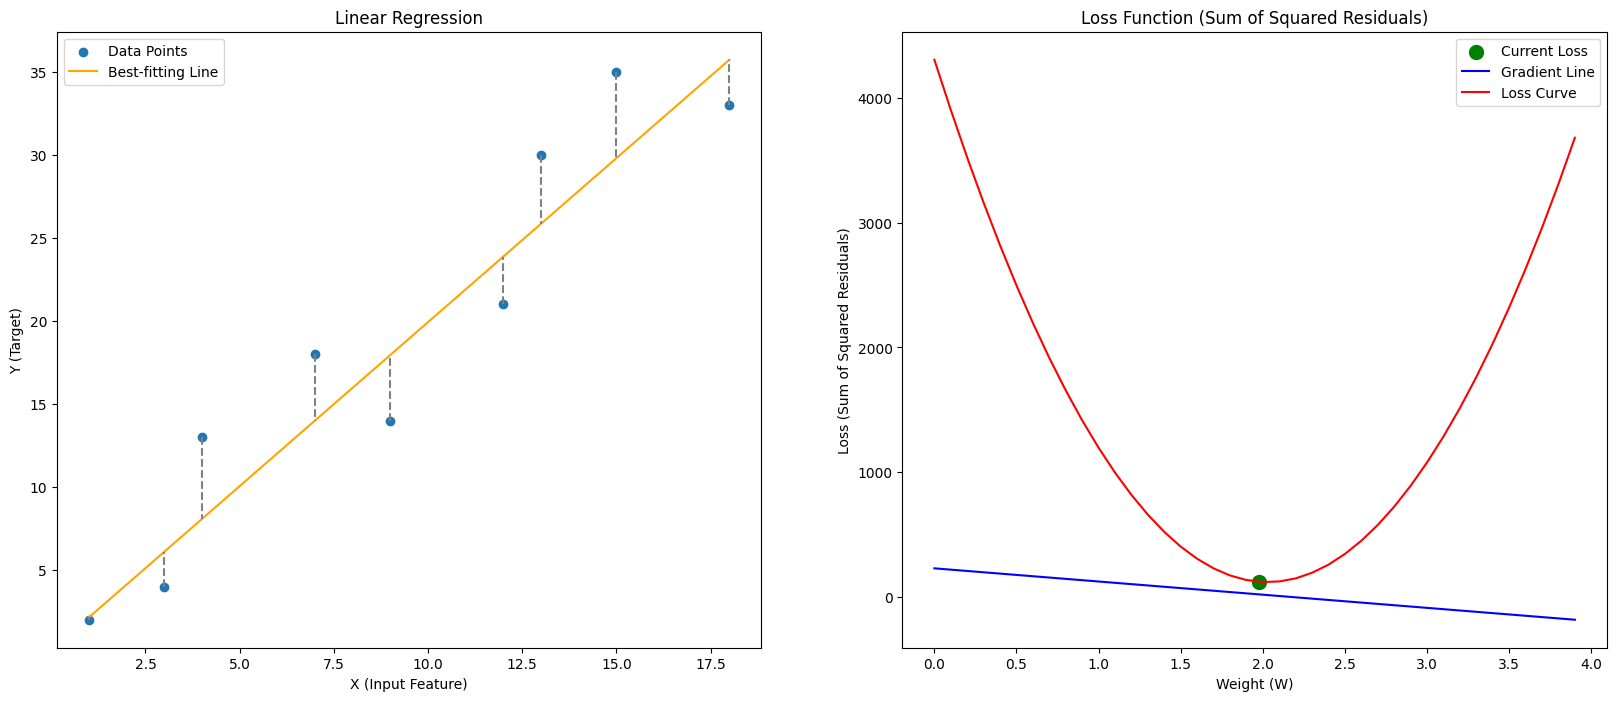

W = 1.9874882431786287 | LossFunc Slope = (-105.6957074096874) | Distance = 119.13165001453852


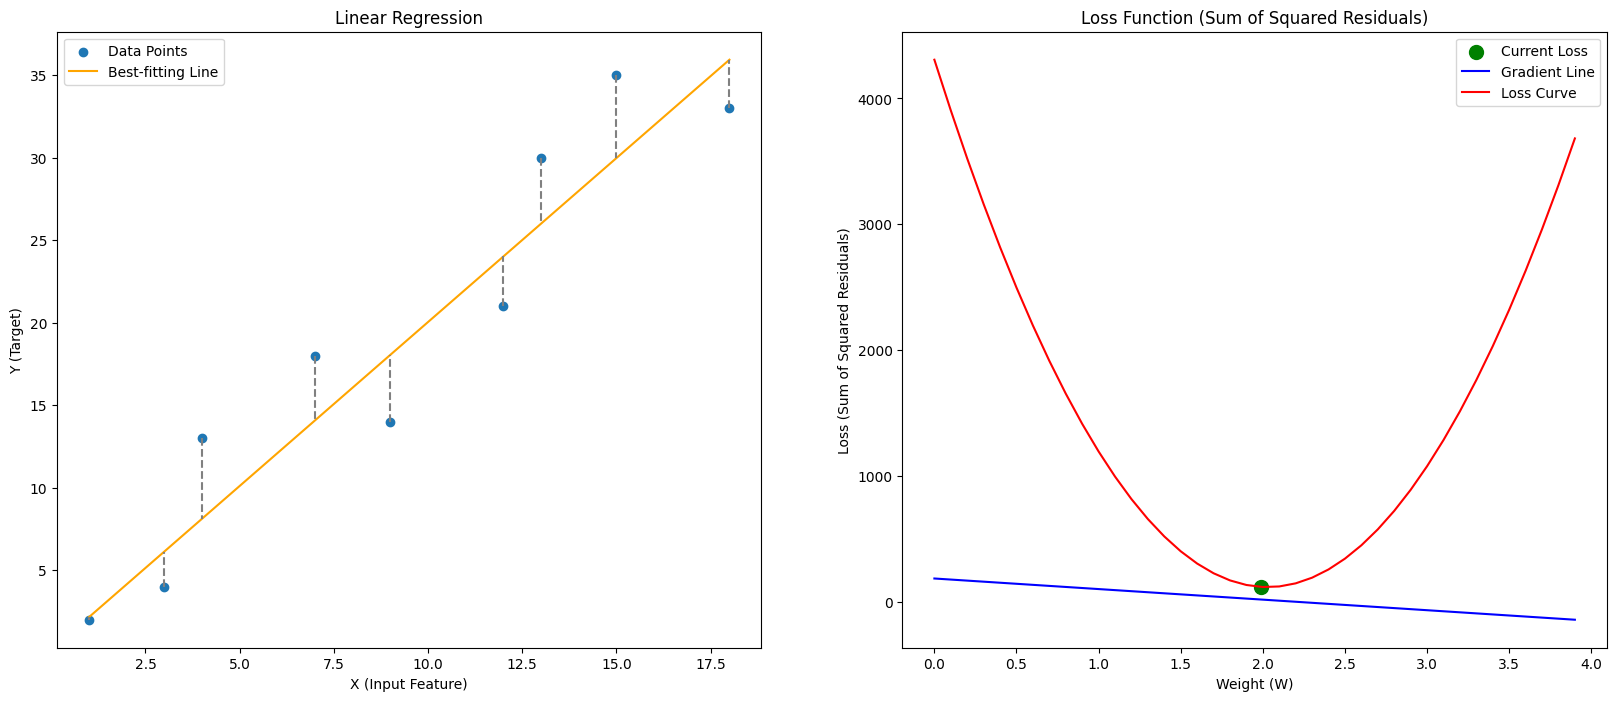

W = 1.9958848749804663 | LossFunc Slope = (-83.96631801837628) | Distance = 118.48774620382454


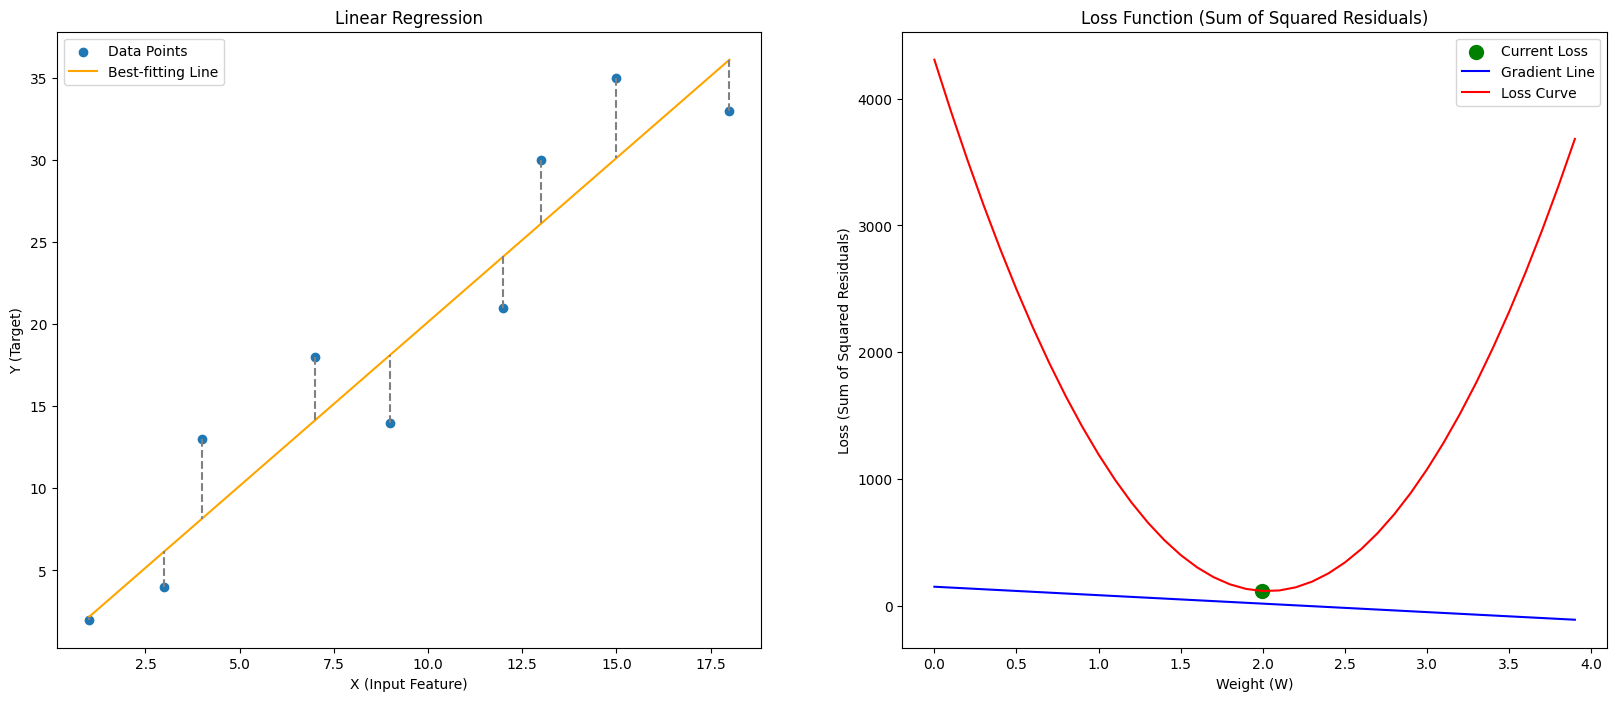

W = 2.0025538587567318 | LossFunc Slope = (-66.68983776265412) | Distance = 118.08004586296528


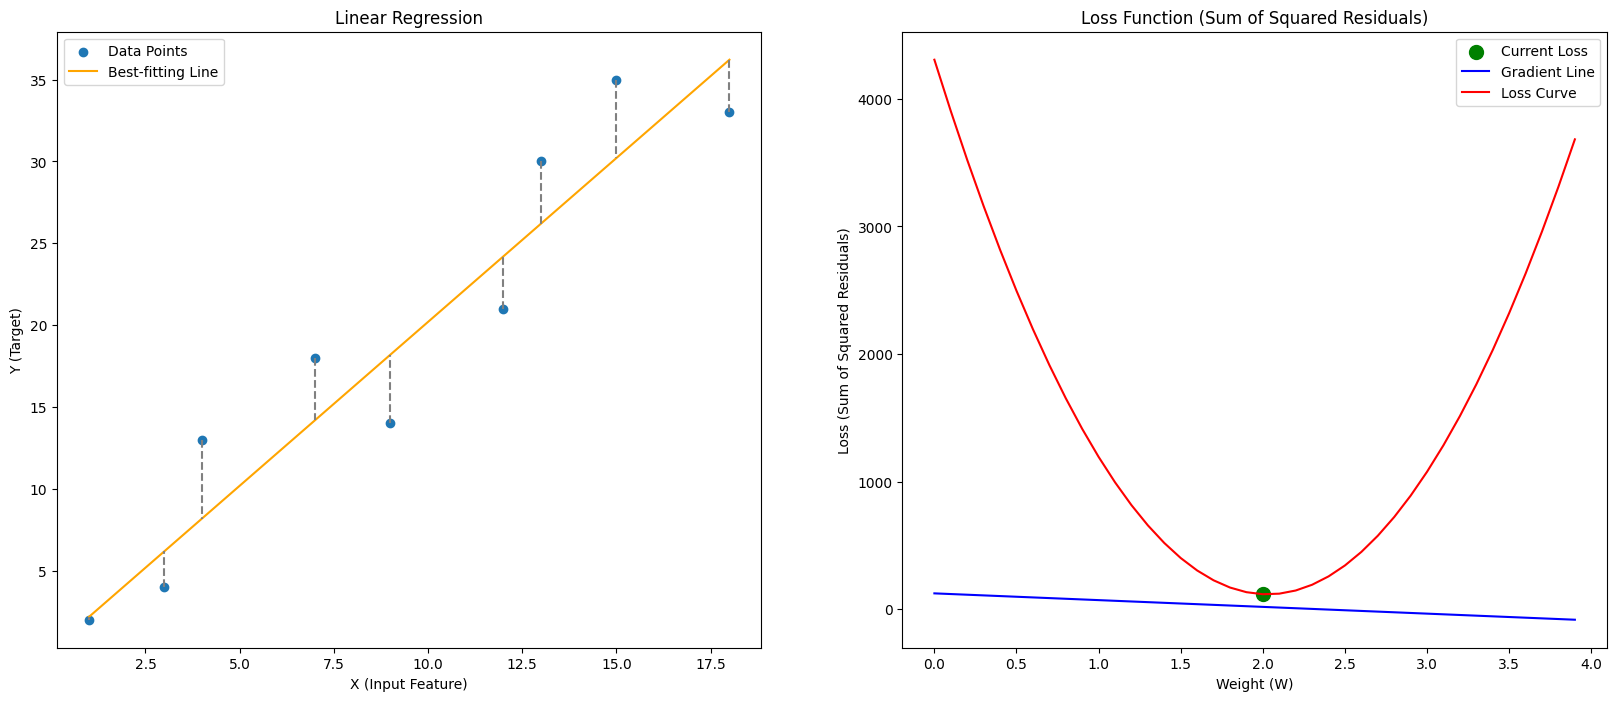

W = 2.007849234572344 | LossFunc Slope = (-52.95375815612397) | Distance = 117.82166114795456


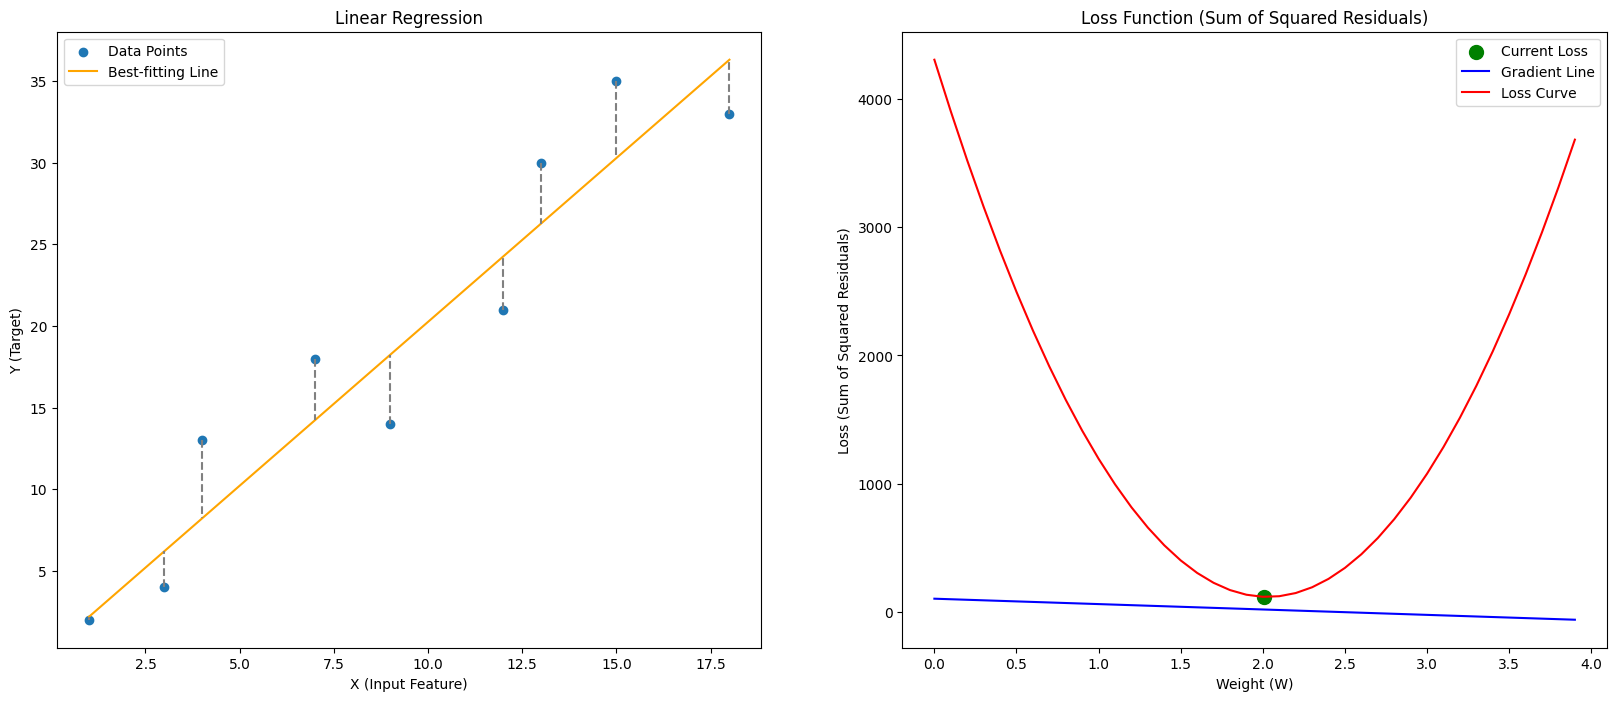

W = 2.0120524911431237 | LossFunc Slope = (-42.03256570779692) | Distance = 117.65766628465818


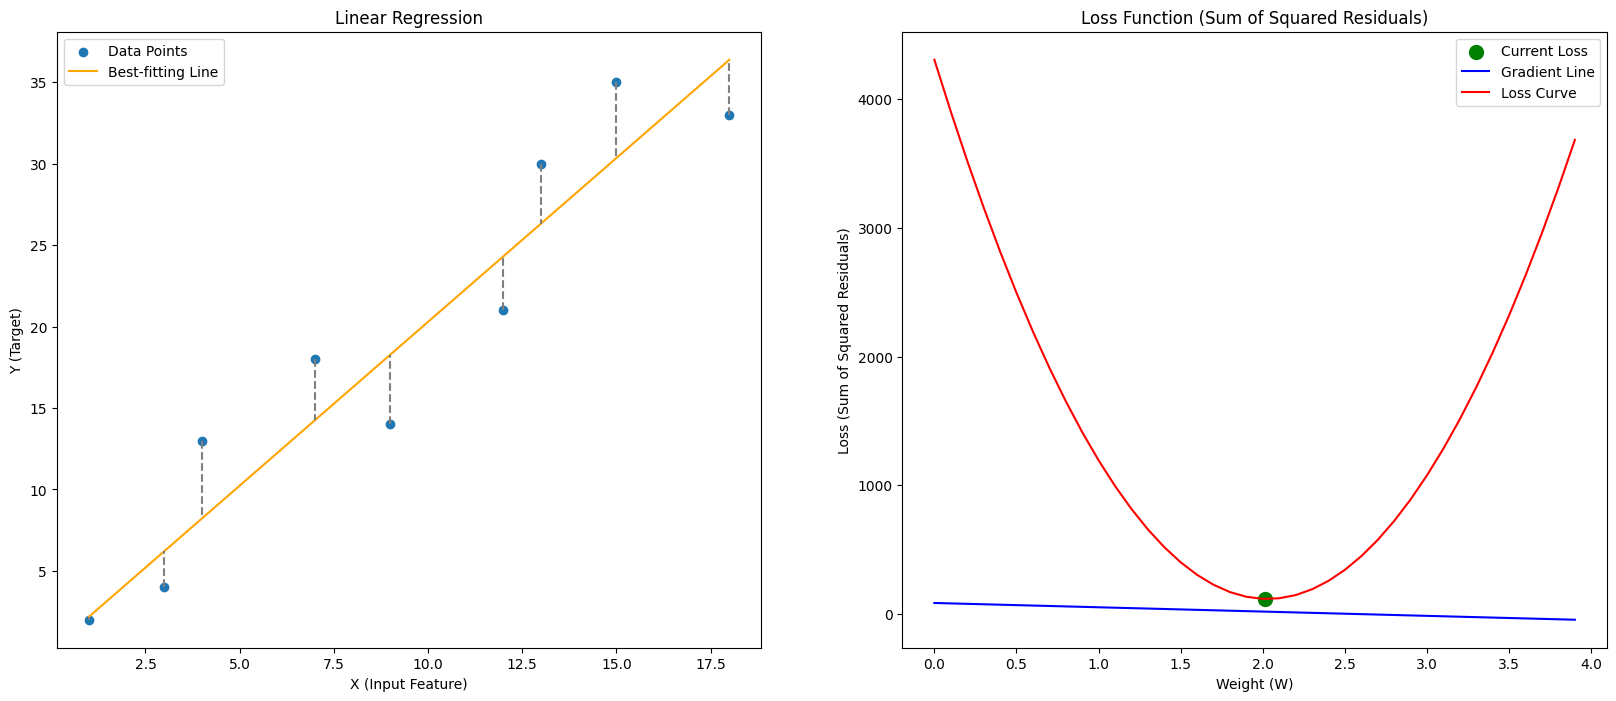

W = 2.0153874333569095 | LossFunc Slope = (-33.34942213786039) | Distance = 117.55334018271276


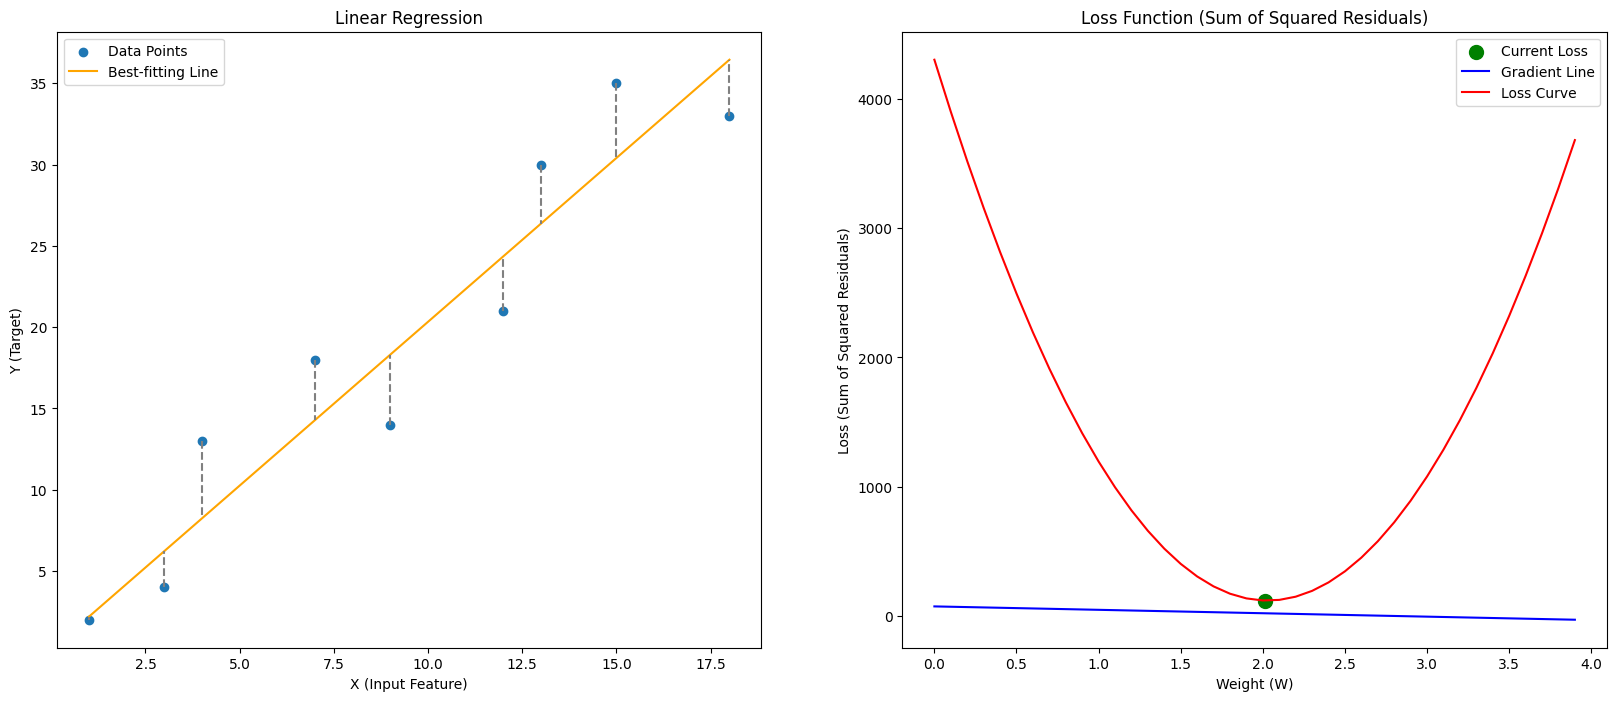

W = 2.0180320030810477 | LossFunc Slope = (-26.44569724138171) | Distance = 117.48673405492181


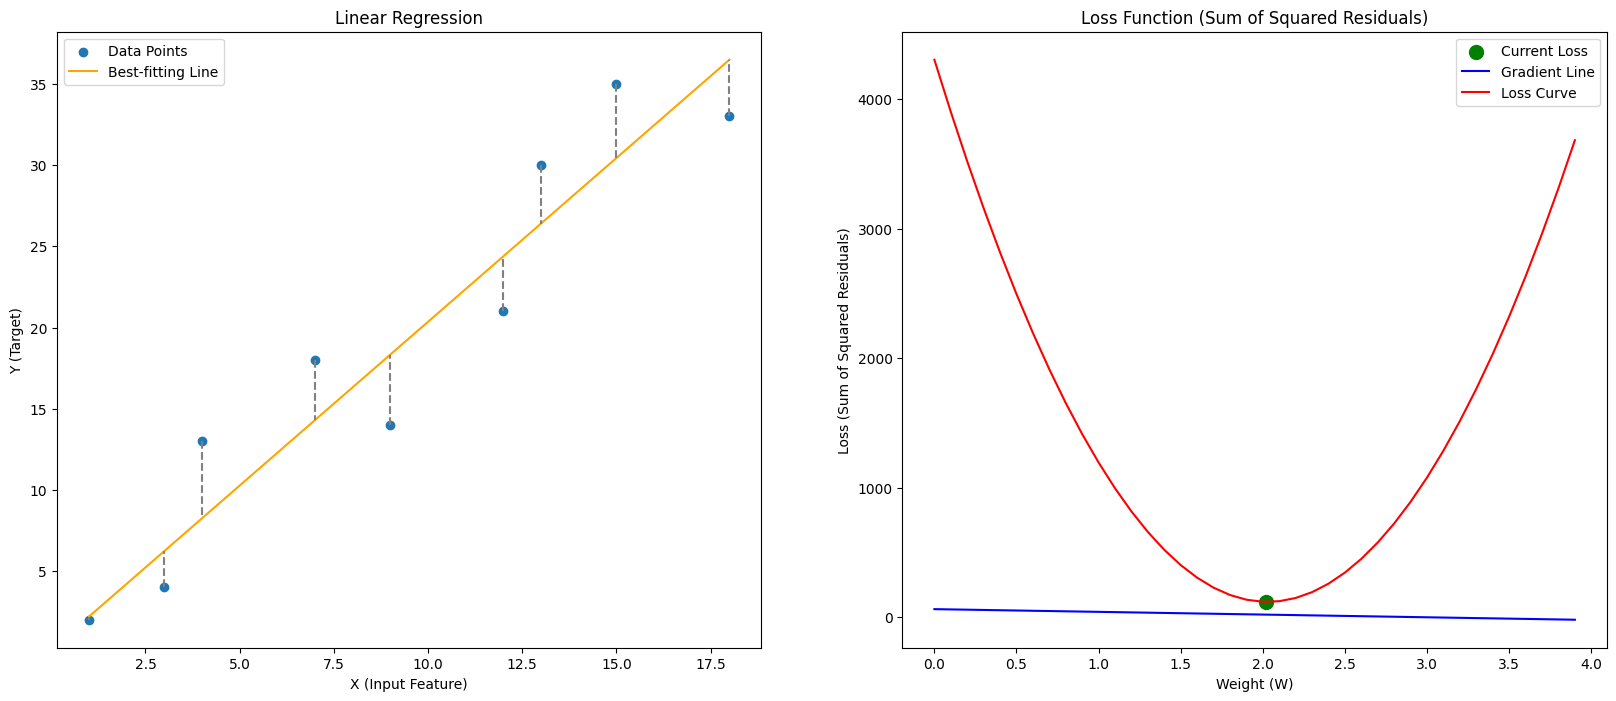

W = 2.020127677601347 | LossFunc Slope = (-20.95674520299235) | Distance = 117.44397307011145


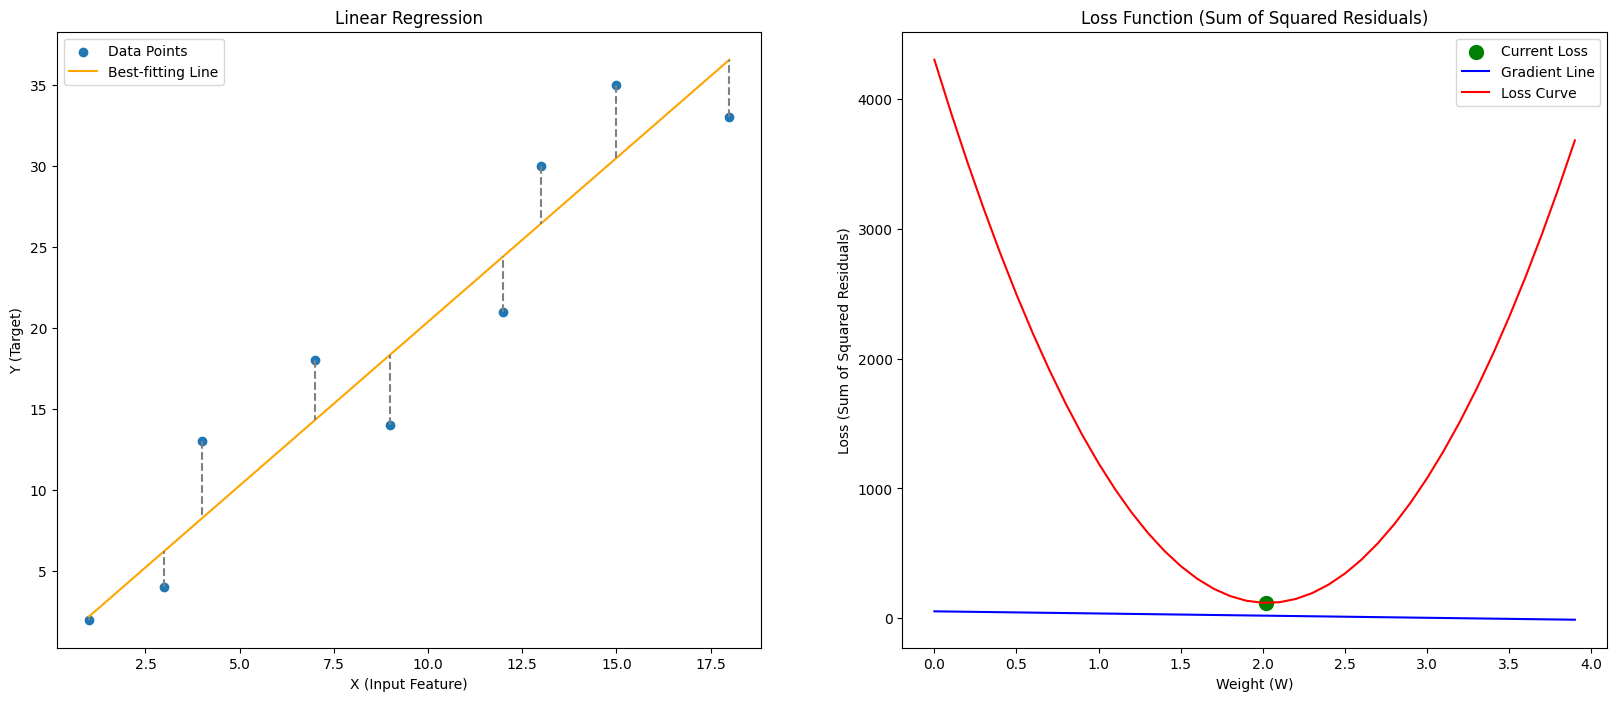

W = 2.0217869420942365 | LossFunc Slope = (-16.592644928892327) | Distance = 117.41628631337014


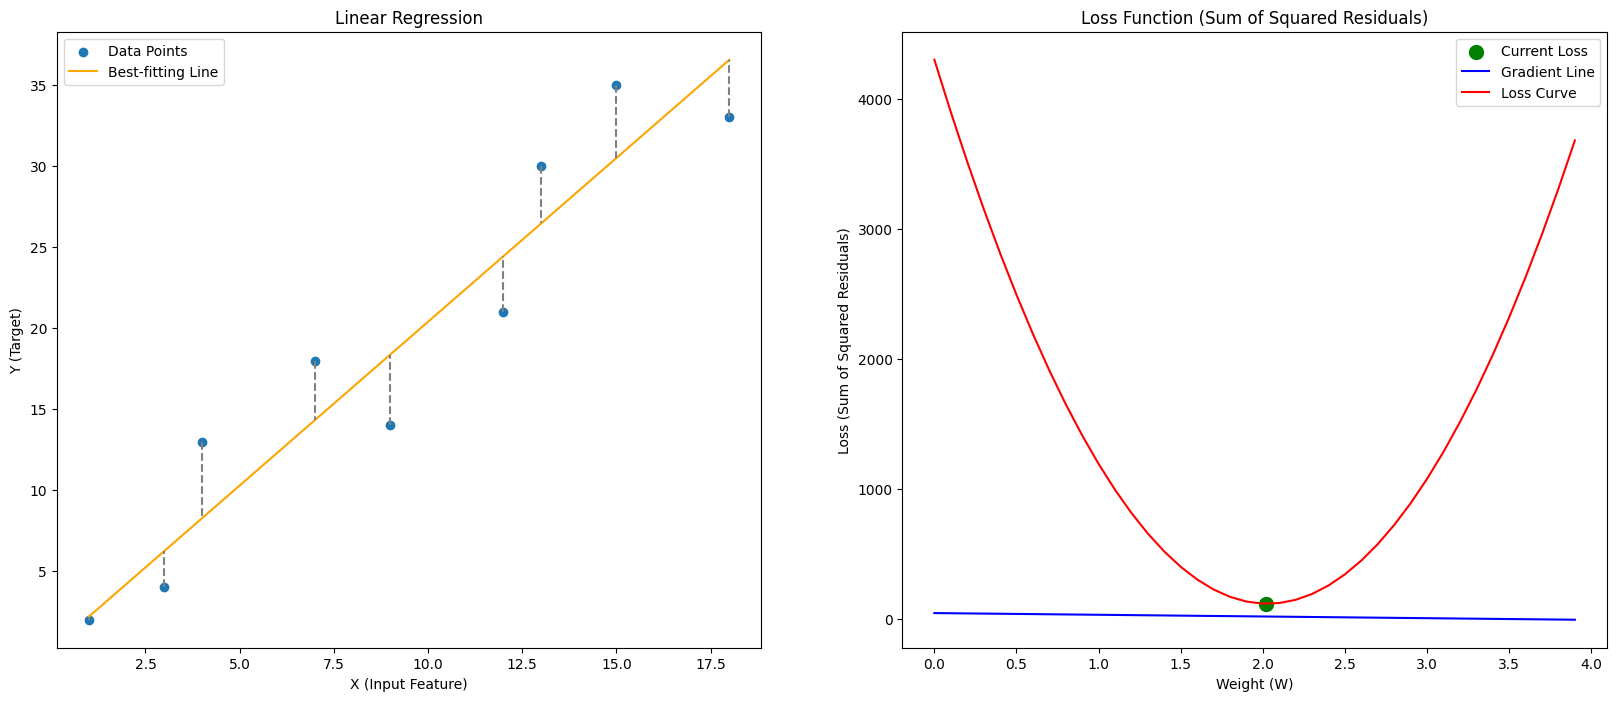

In [ ]:
# Set random W and B
w = 0
b = 0

for i in range(25):
    y_pred = w * x + b
    w, b = calc_gradient(x, y, y_pred, w, b)

# Try larger learning rate (0.0009)

W = 3.7422 | LossFunc Slope = (-4158) | Distance = 3144.6676239199996


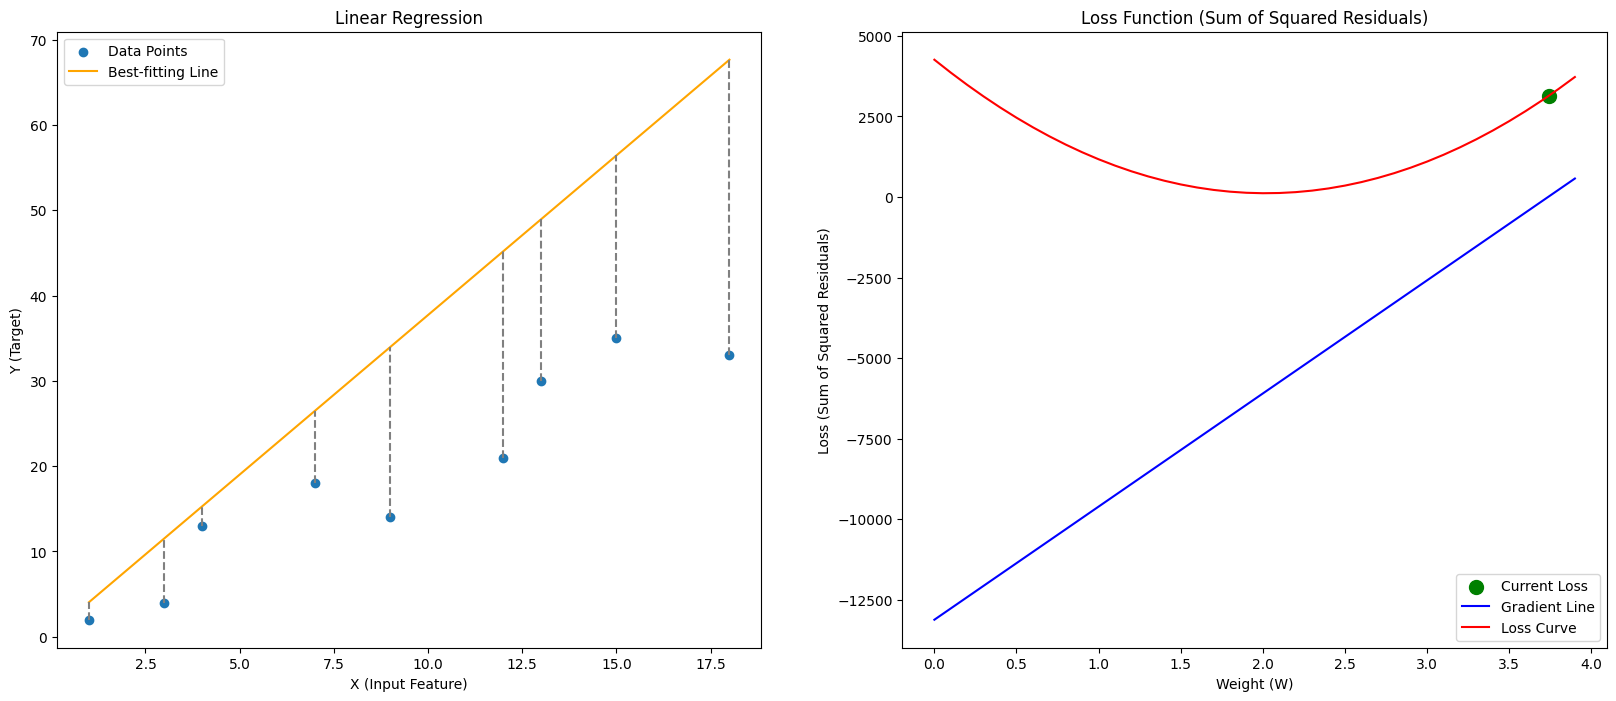

W = 0.5820271200000007 | LossFunc Slope = (3511.3031999999994) | Distance = 2275.436023278061


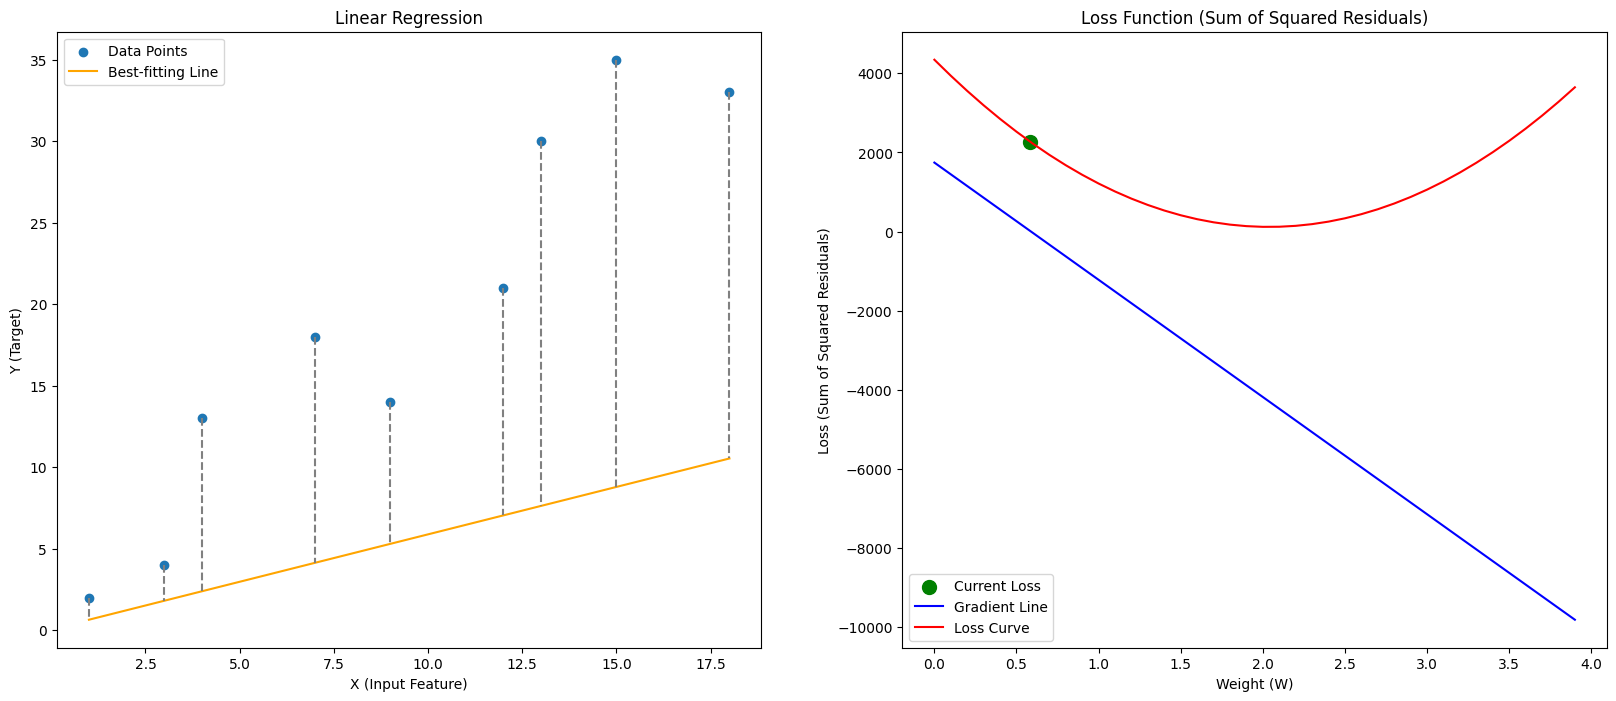

W = 3.2496477791039995 | LossFunc Slope = (-2964.0229545599987) | Distance = 1655.7812492037683


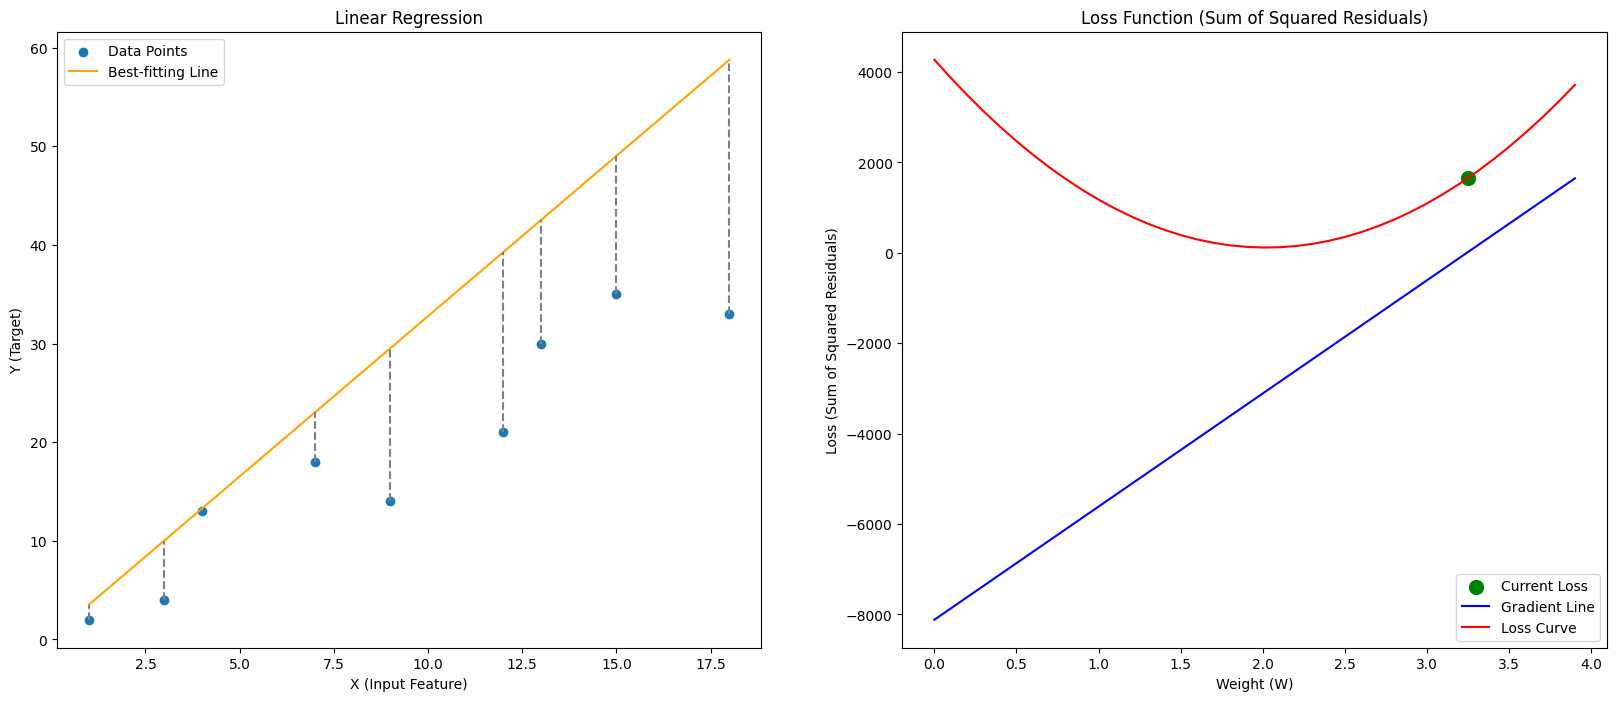

W = 0.9967654257242122 | LossFunc Slope = (2503.2026148664304) | Distance = 1214.0426653800653


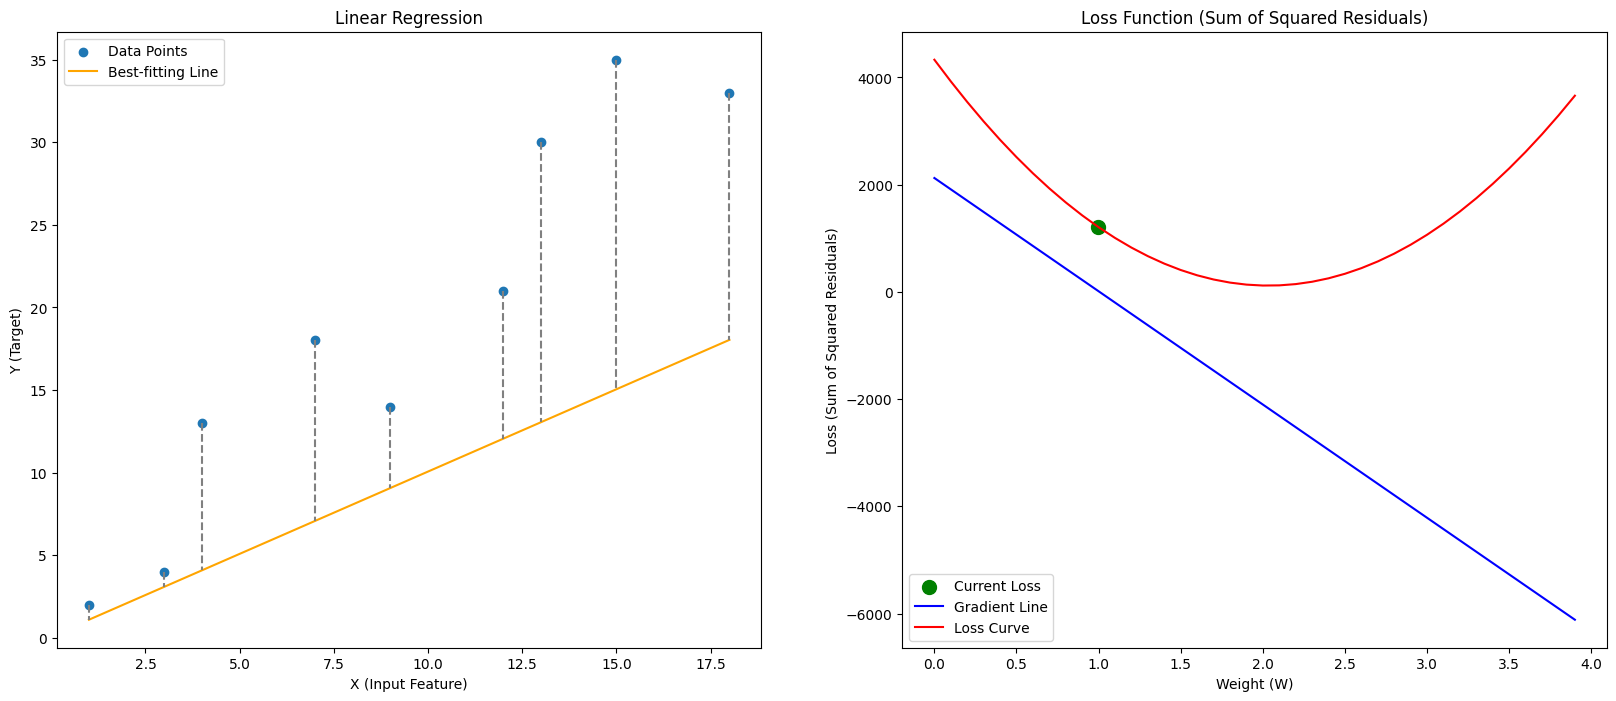

W = 2.898350073037423 | LossFunc Slope = (-2112.871830348012) | Distance = 899.135462023605


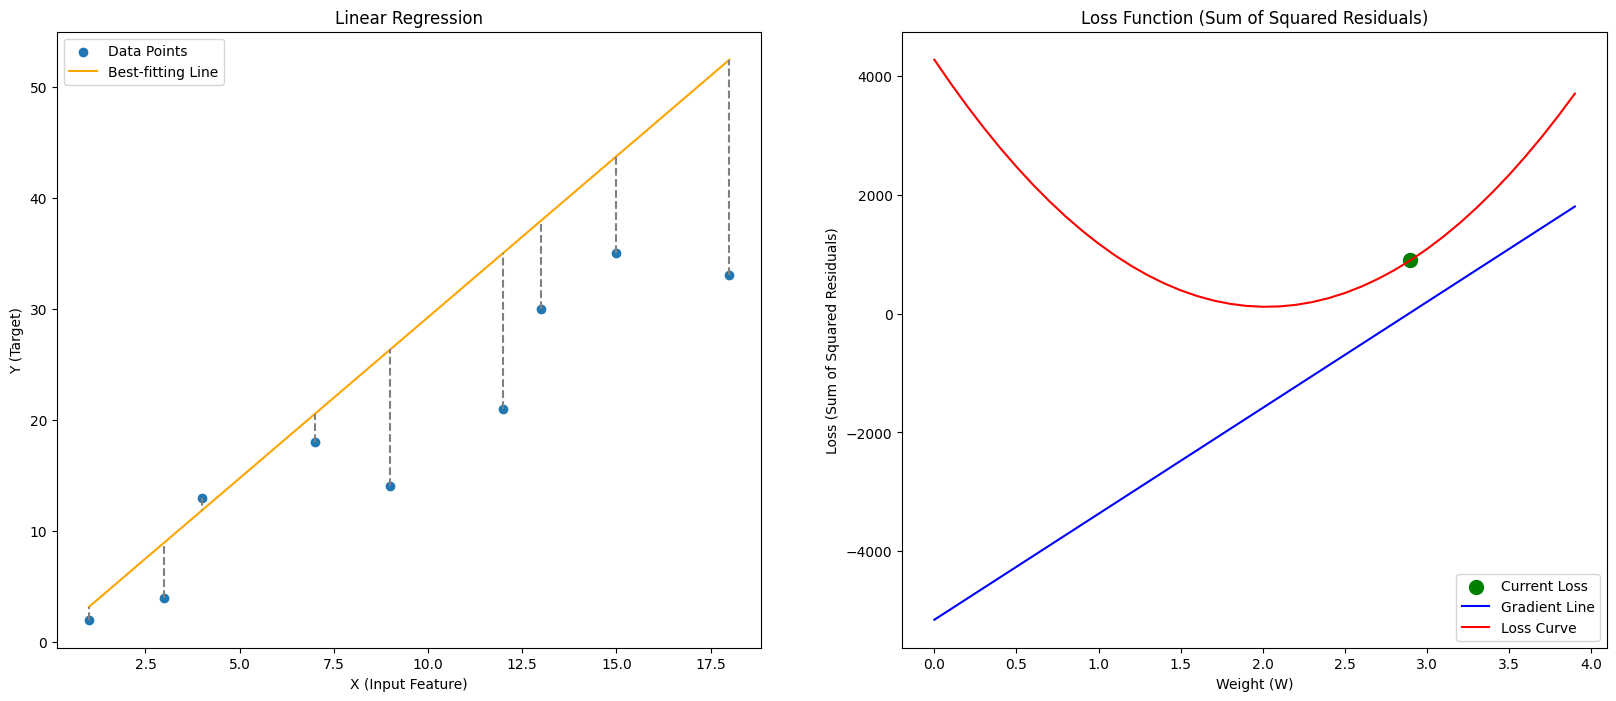

W = 1.2922498116177858 | LossFunc Slope = (1784.555846021819) | Distance = 674.6427451276999


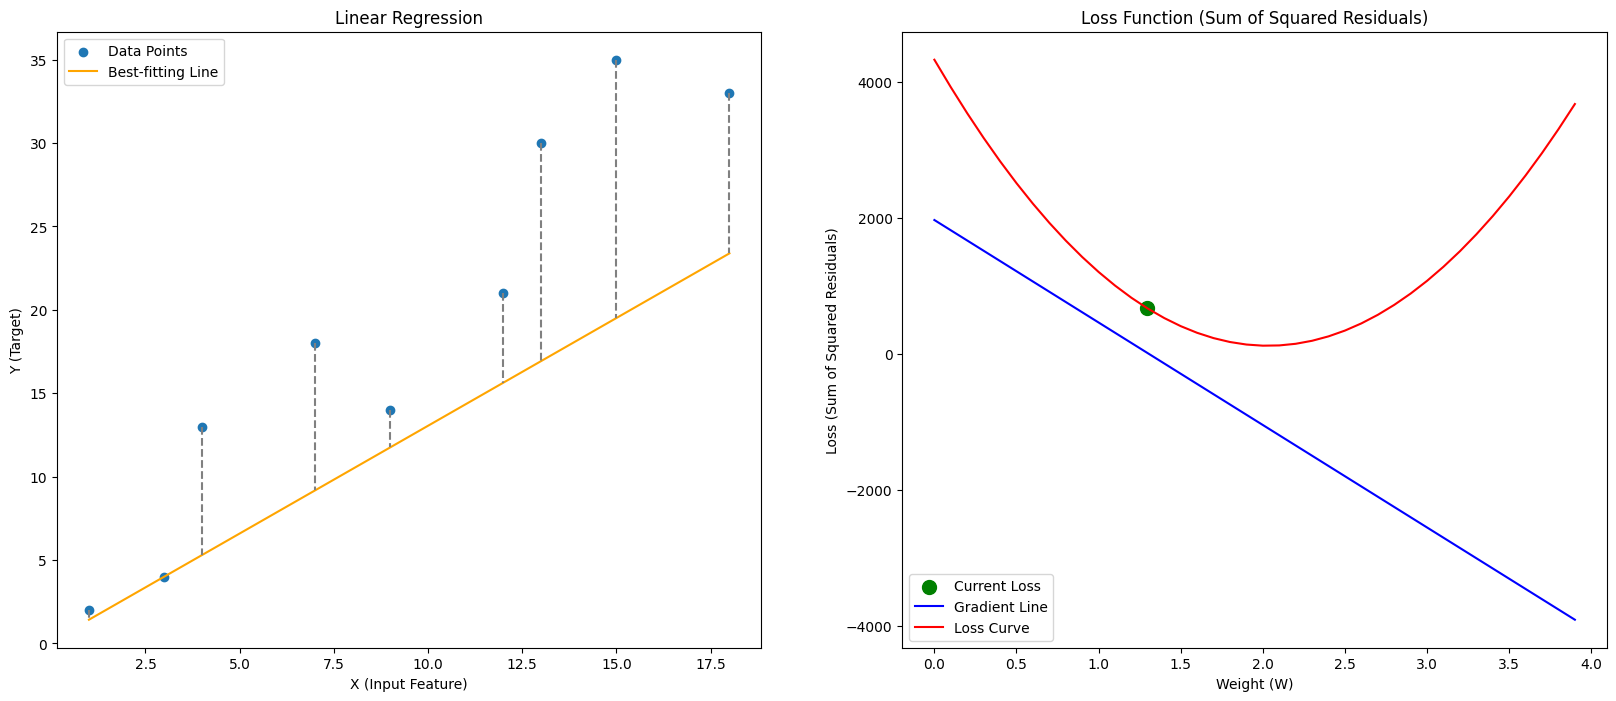

W = 2.647750118429559 | LossFunc Slope = (-1506.111452013081) | Distance = 514.6039565657784


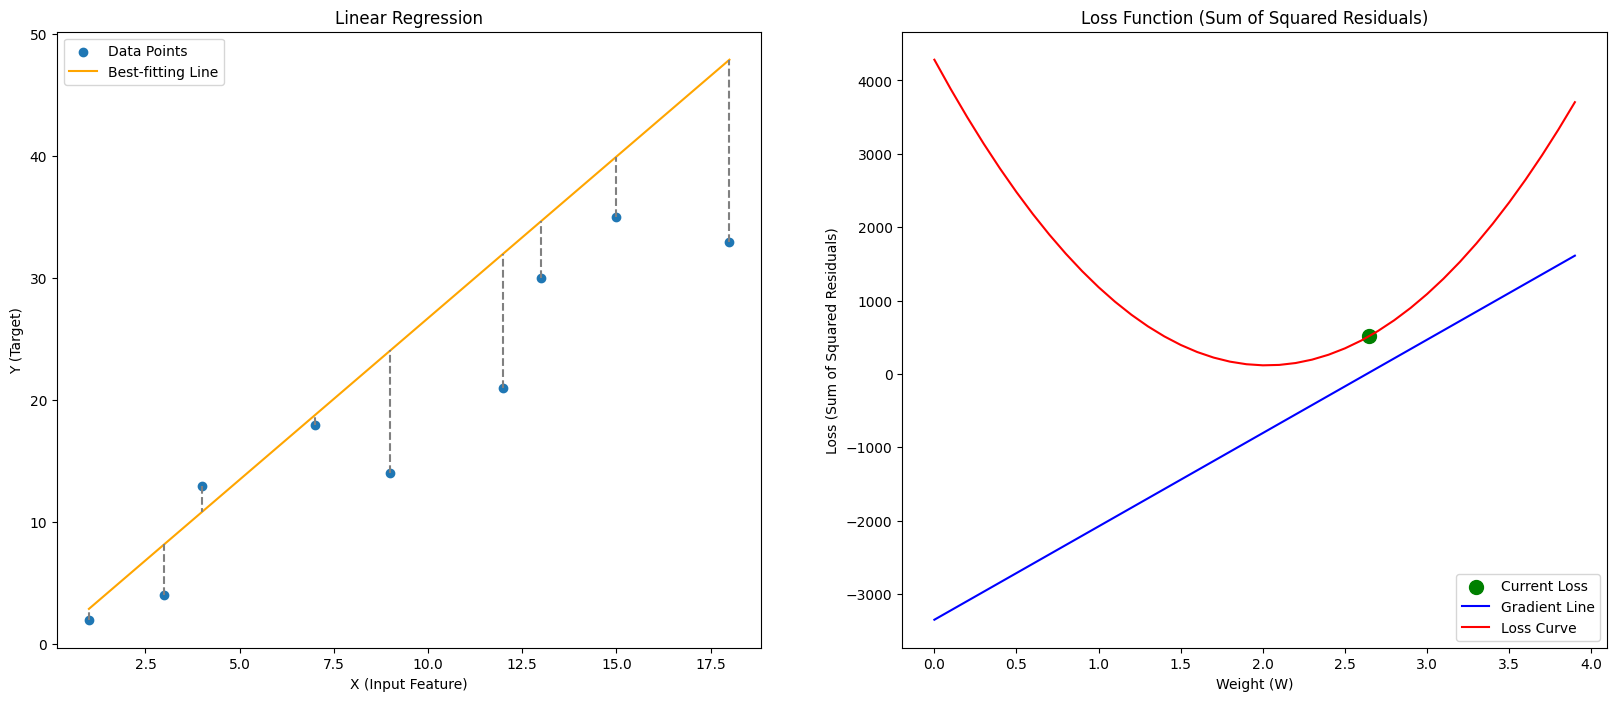

W = 1.5027229617371416 | LossFunc Slope = (1272.2523963249082) | Distance = 400.5125597446627


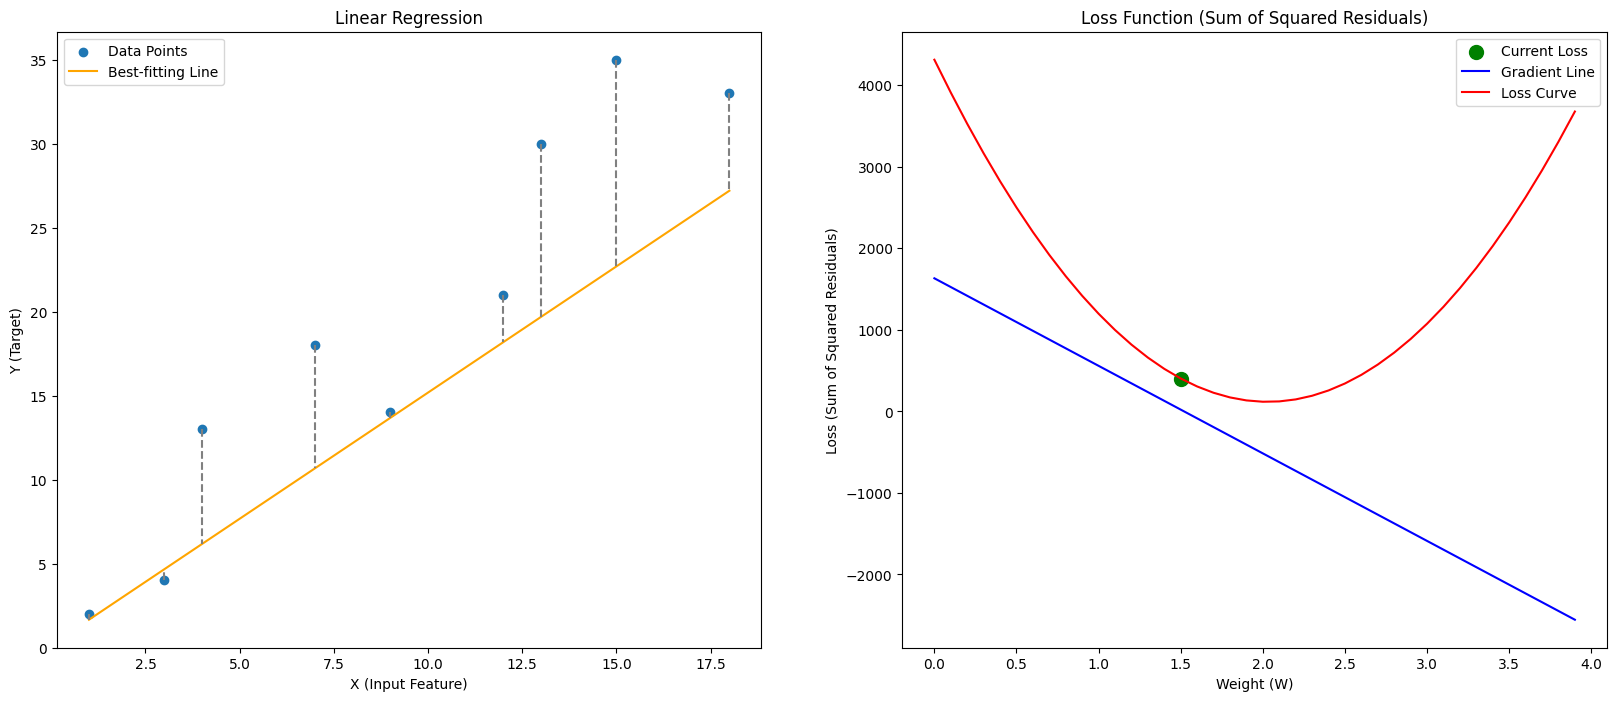

W = 2.468936150990838 | LossFunc Slope = (-1073.5702102818846) | Distance = 319.17577593678743


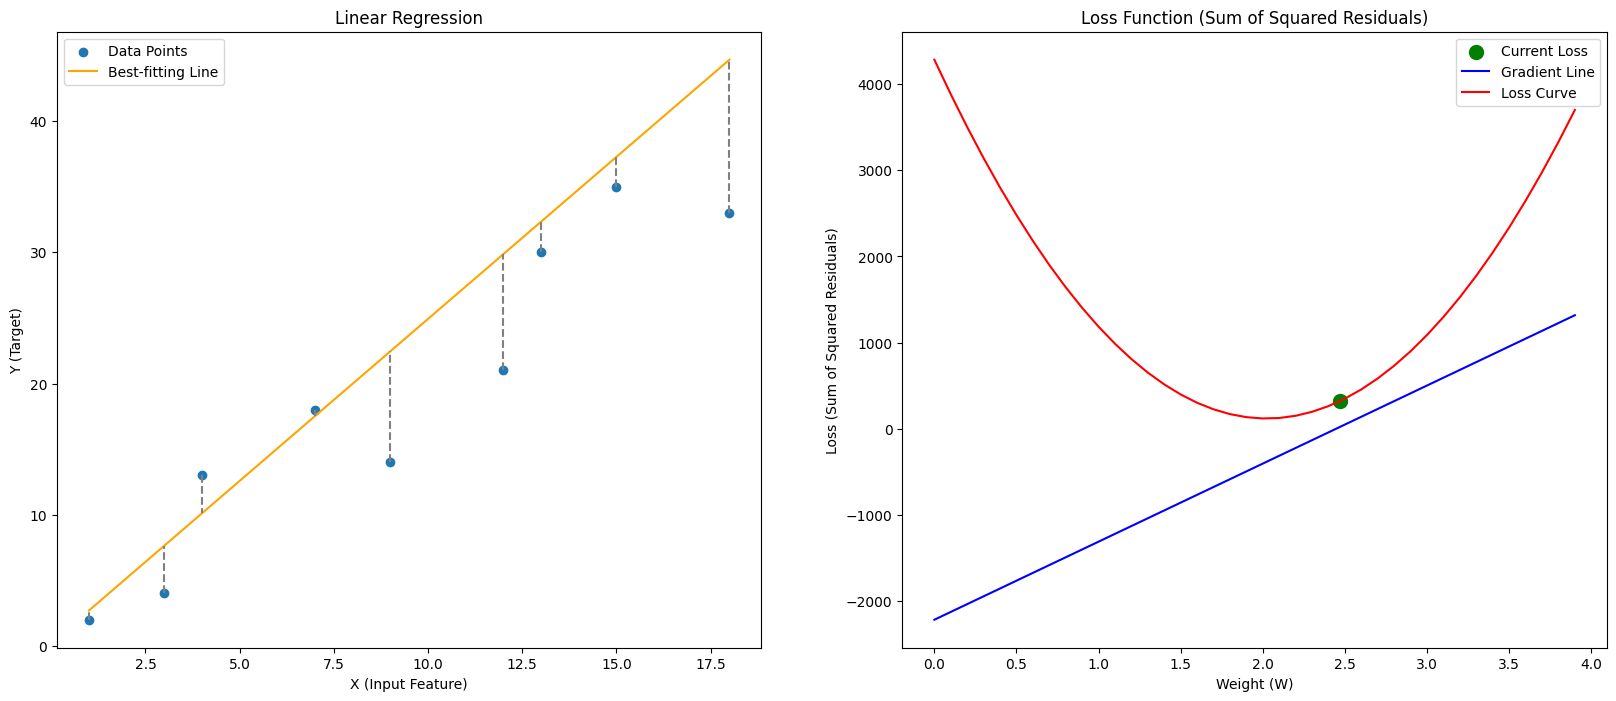

W = 1.6525954895886337 | LossFunc Slope = (907.0451793357824) | Distance = 261.1888517823084


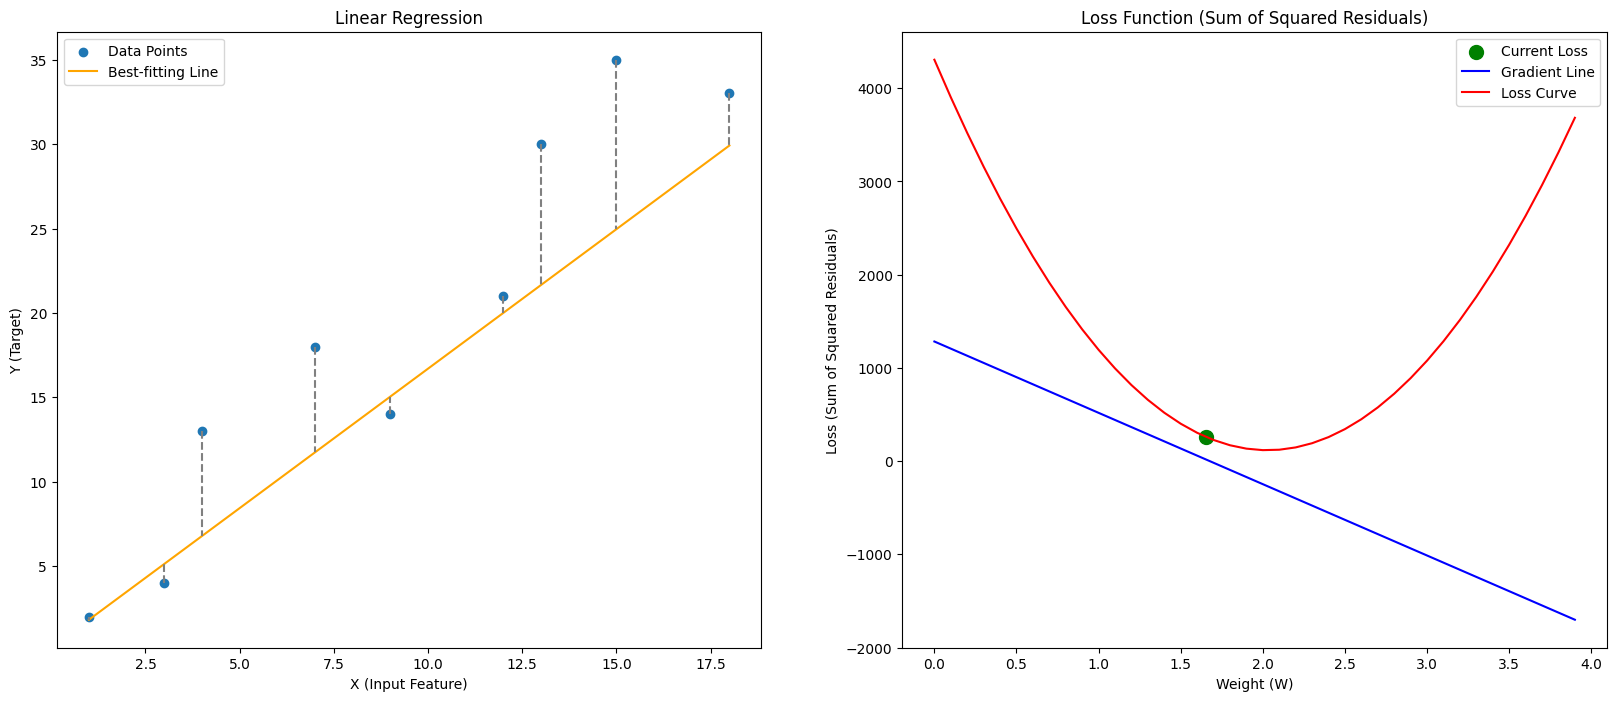

W = 2.3412977919255296 | LossFunc Slope = (-765.2247803743287) | Distance = 219.84740841217905


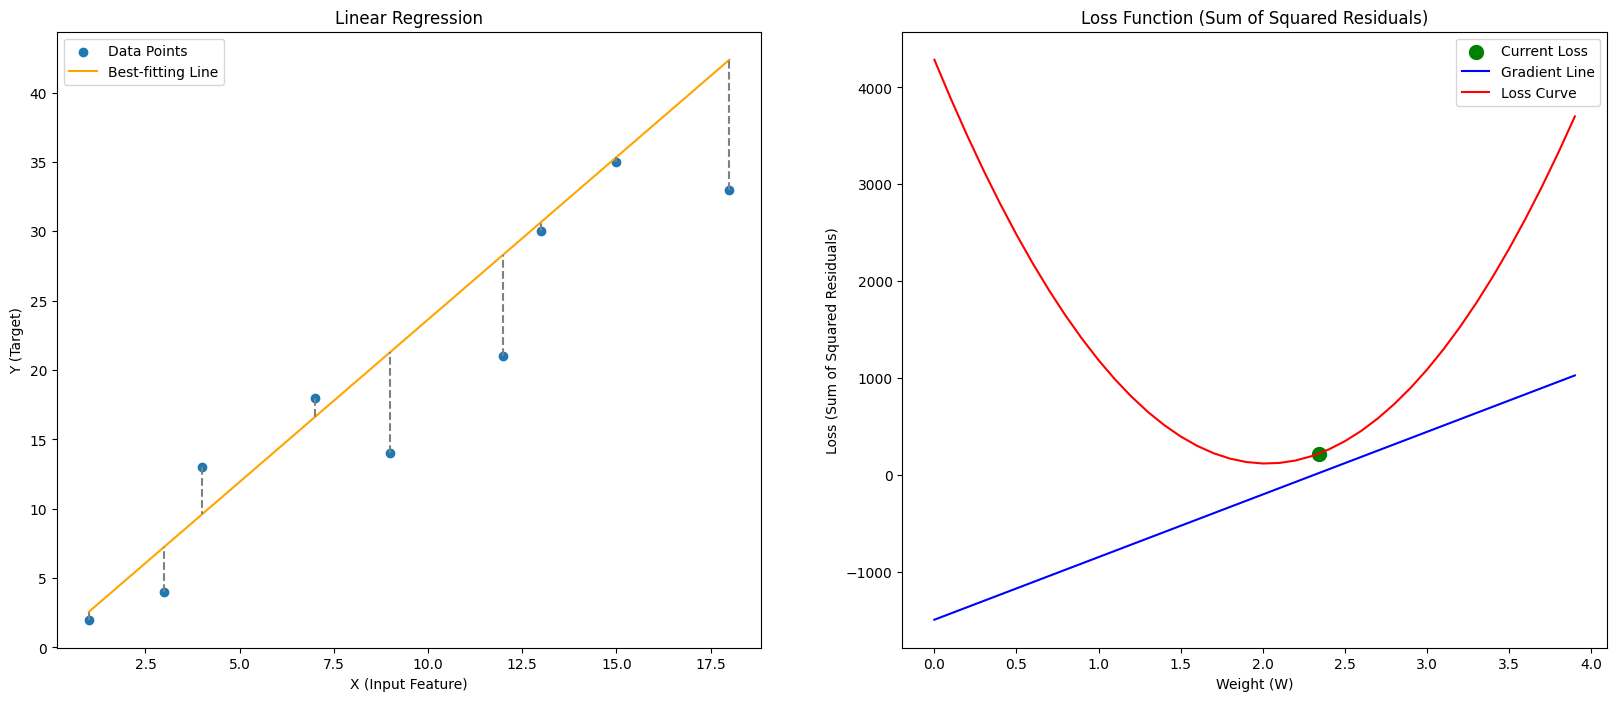

W = 1.75926900807872 | LossFunc Slope = (646.6986487186771) | Distance = 190.37208637658338


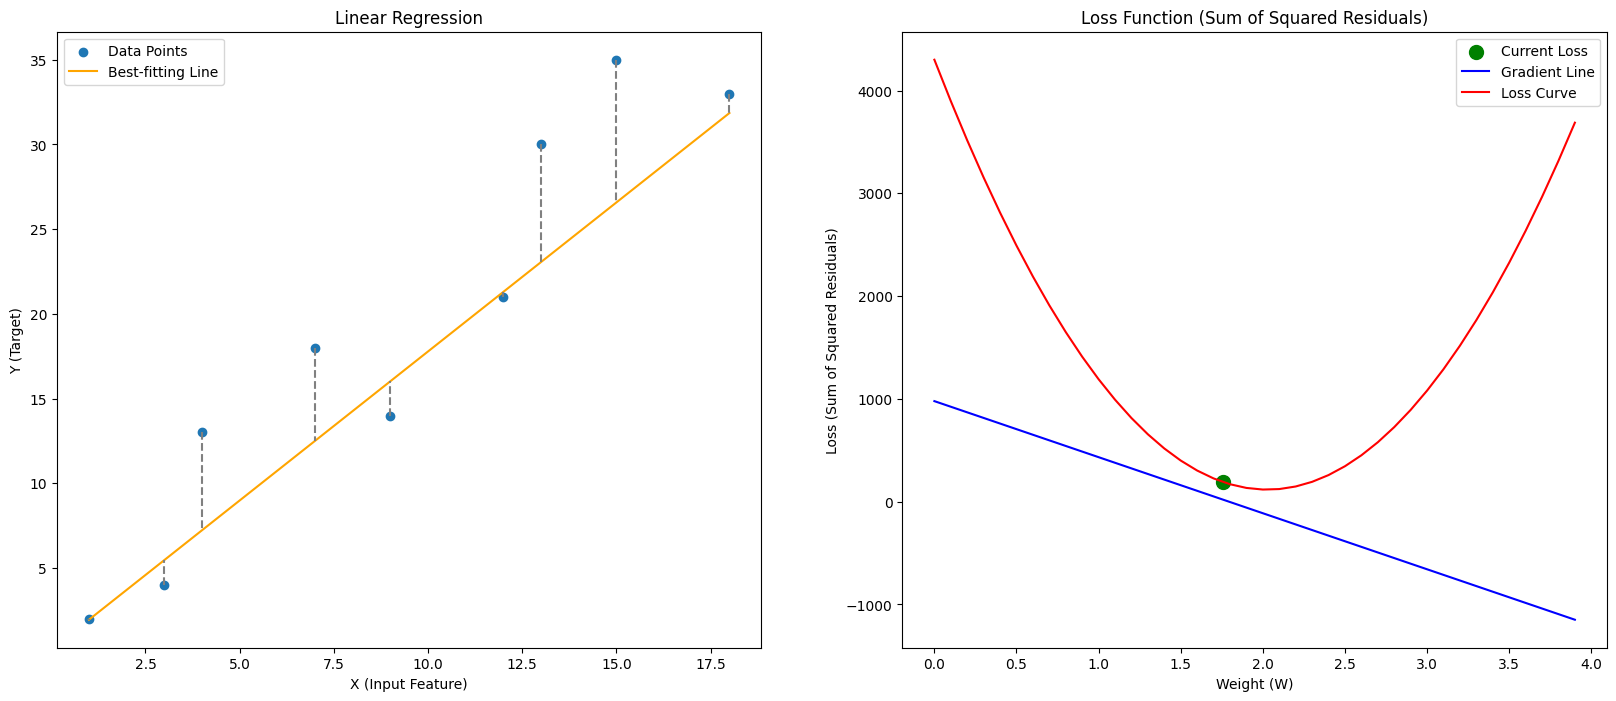

W = 2.250142481836968 | LossFunc Slope = (-545.4149708424978) | Distance = 169.35581728350695


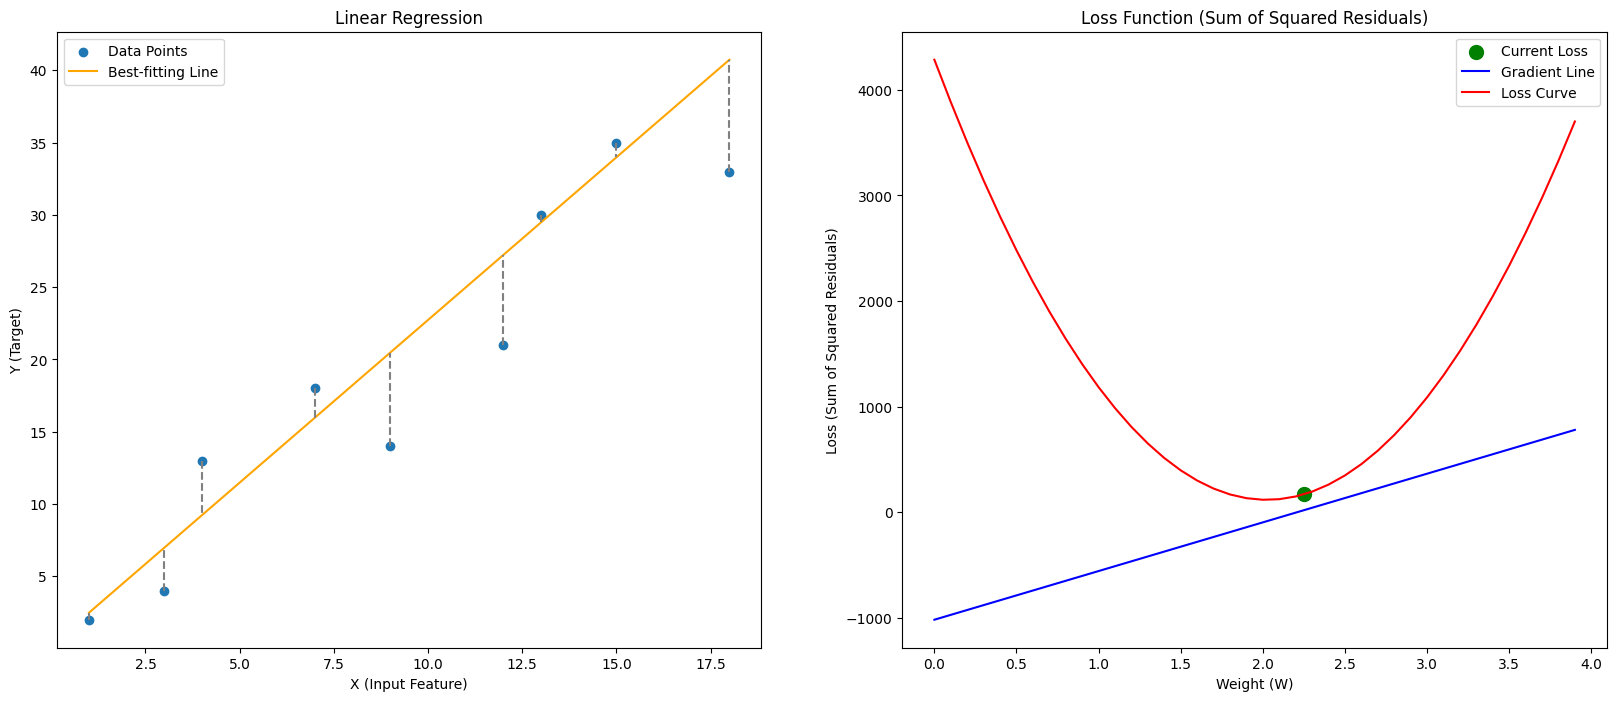

W = 1.8351486149986243 | LossFunc Slope = (461.1042964870485) | Distance = 154.36979962486478


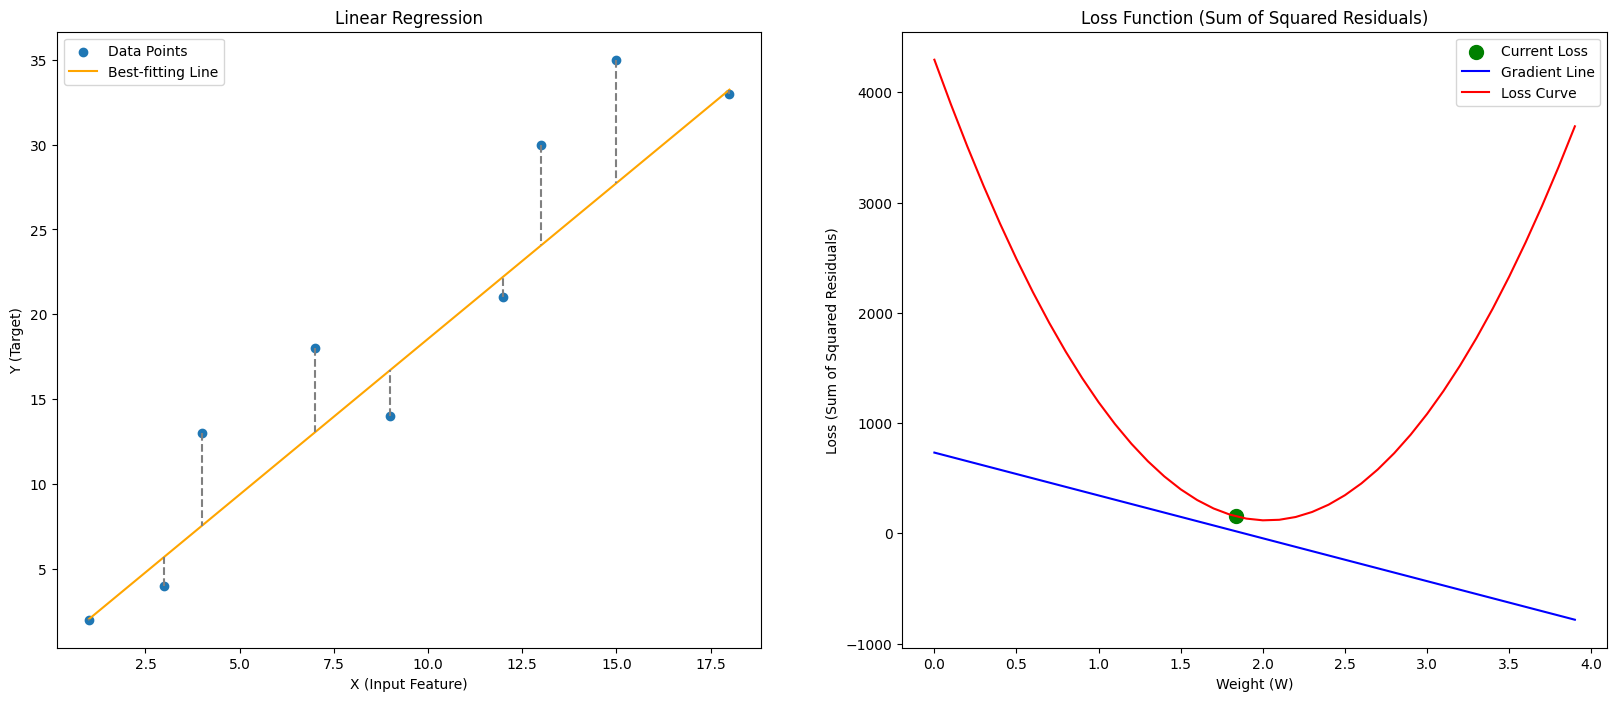

W = 2.1849963049165146 | LossFunc Slope = (-388.71965546432284) | Distance = 143.6826102597625


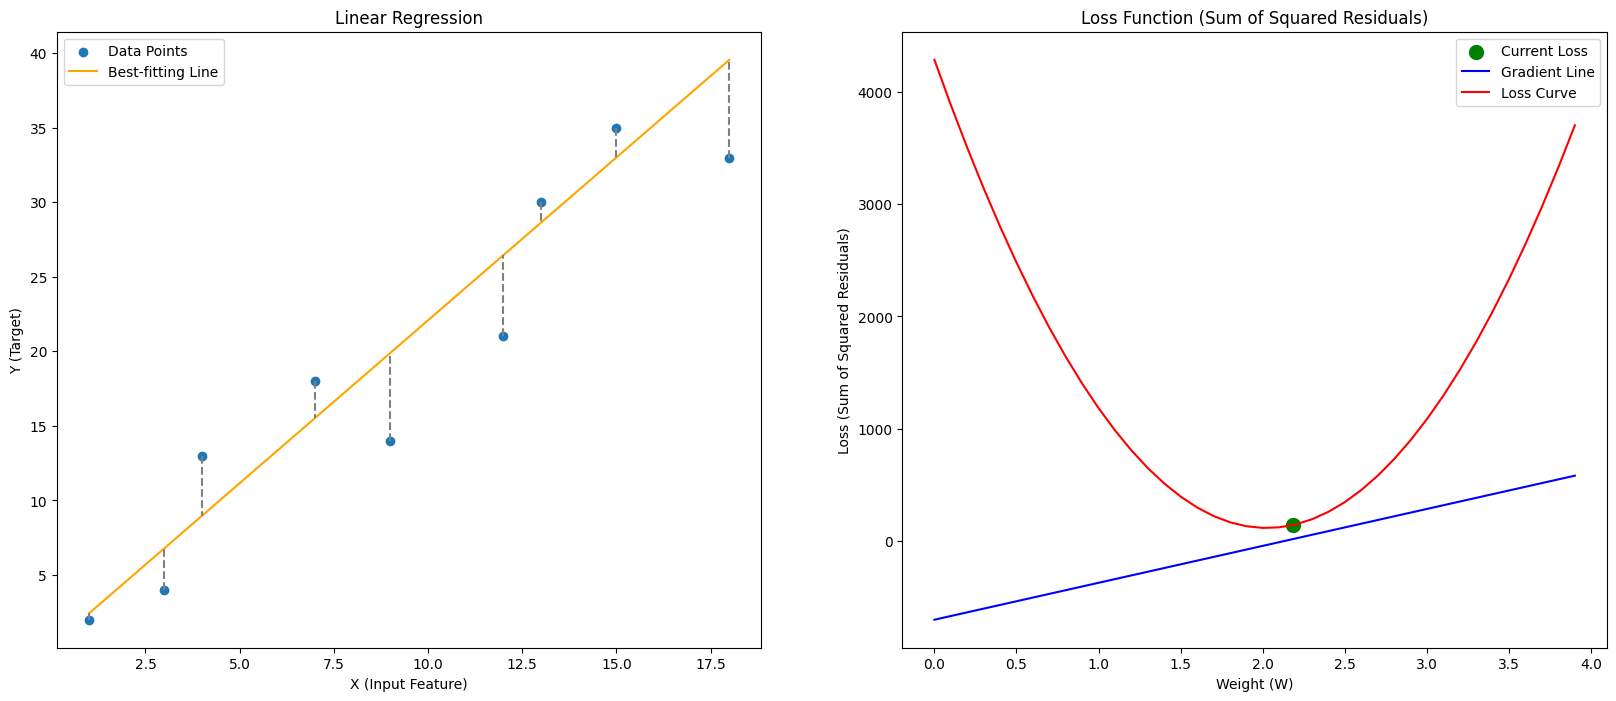

W = 1.889077536124485 | LossFunc Slope = (328.7986319911441) | Distance = 136.05996705834303


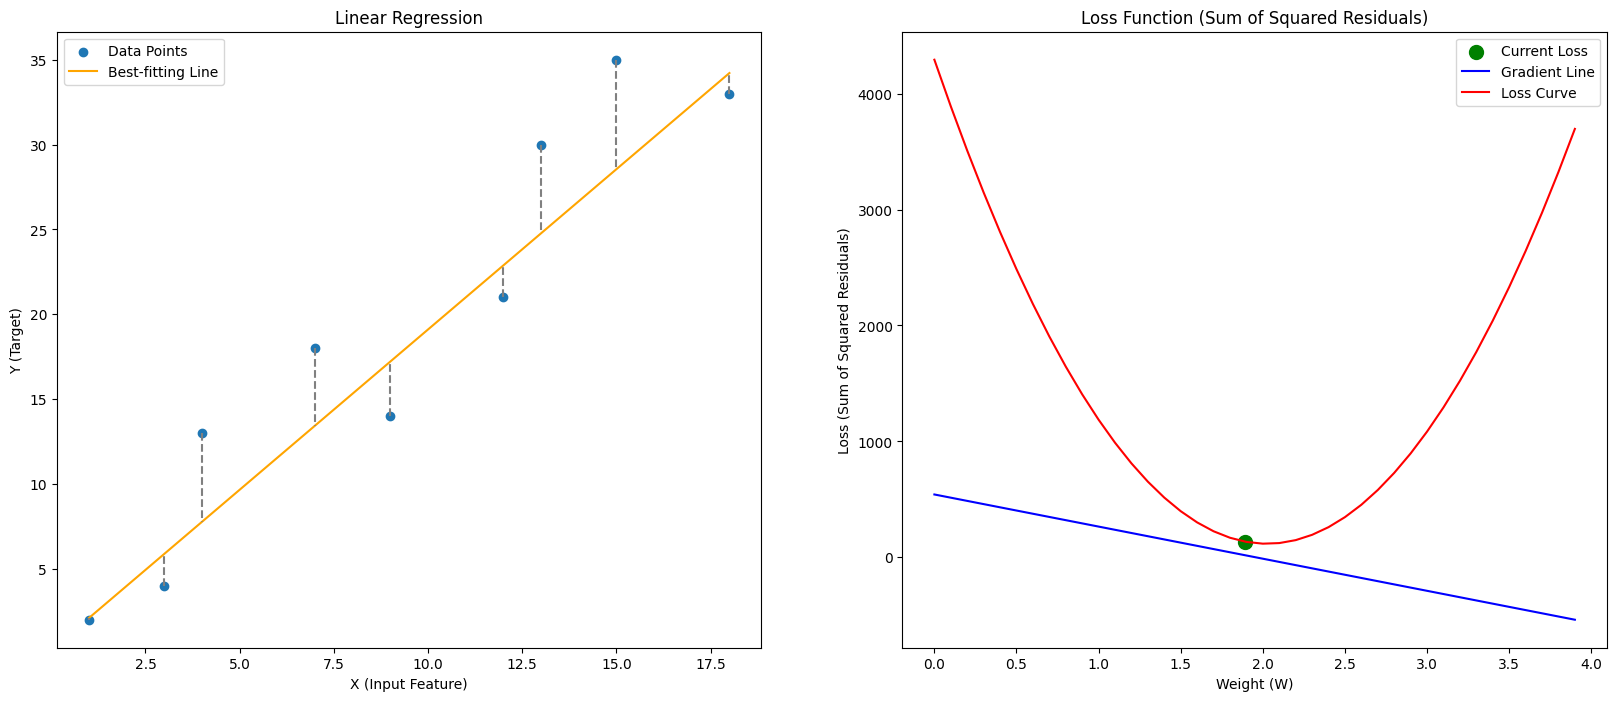

W = 2.1383926953093093 | LossFunc Slope = (-277.0168435386937) | Distance = 130.62198544161504


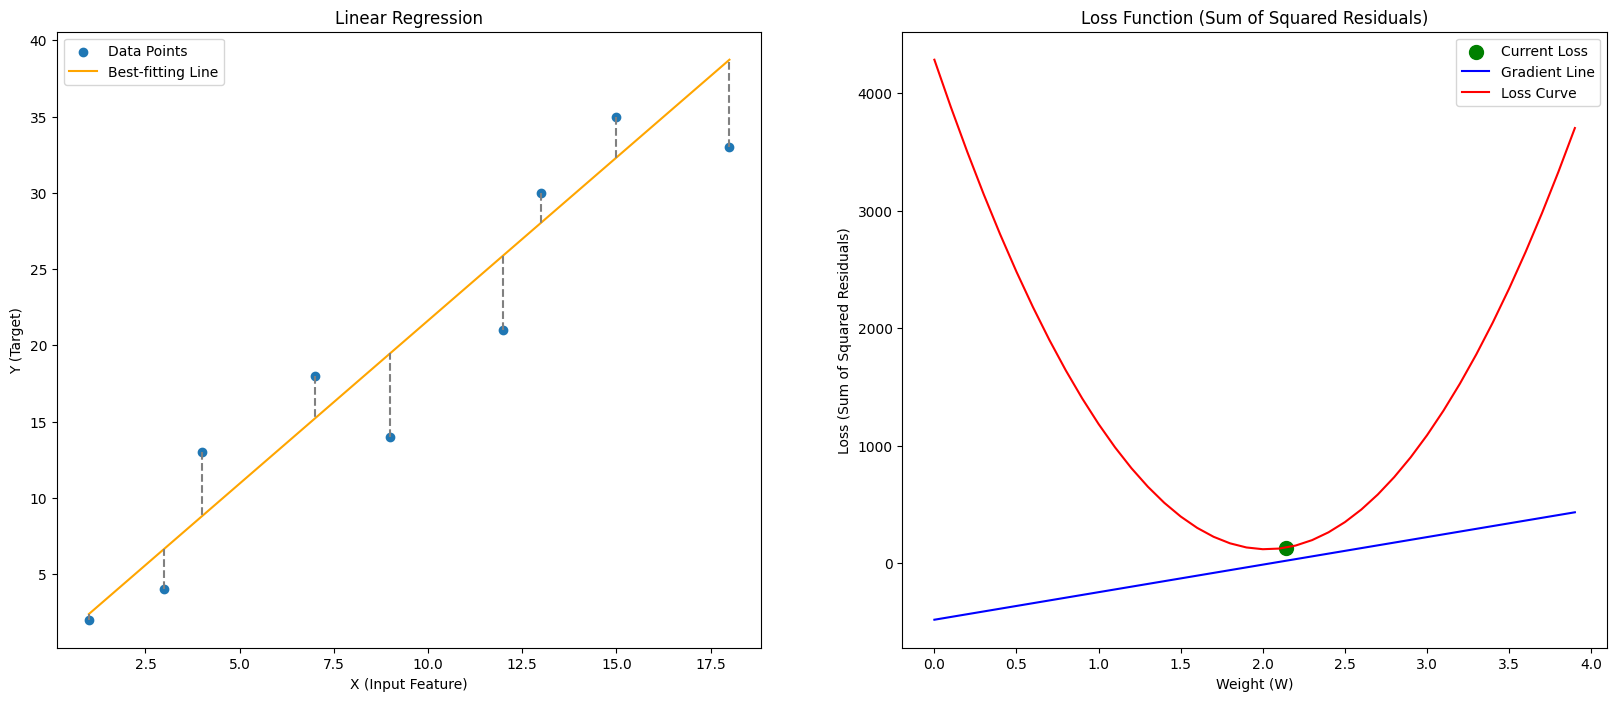

W = 1.9273598410779156 | LossFunc Slope = (234.48094914599295) | Distance = 126.74142066843582


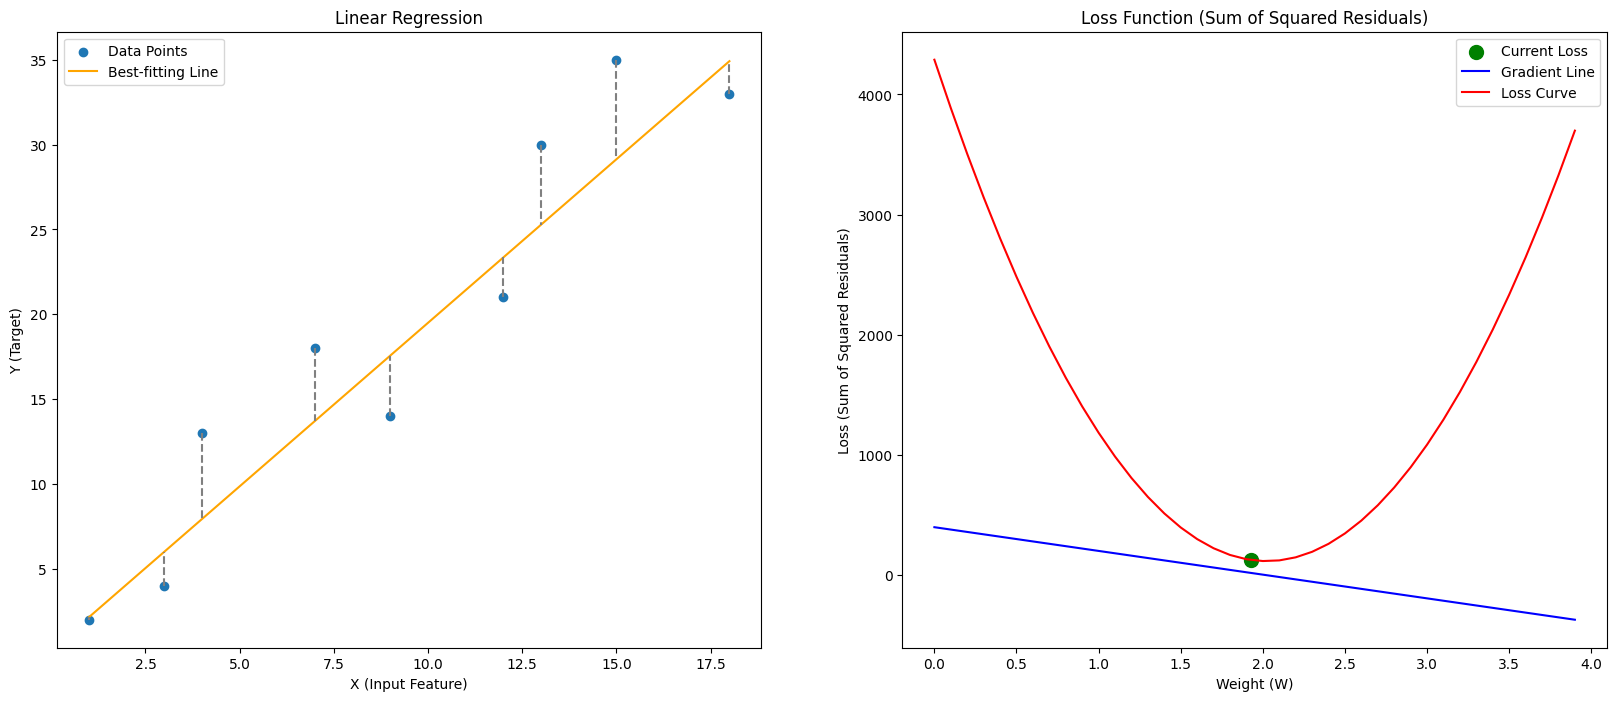

W = 2.1050089406713046 | LossFunc Slope = (-197.38788843709912) | Distance = 123.97112768448153


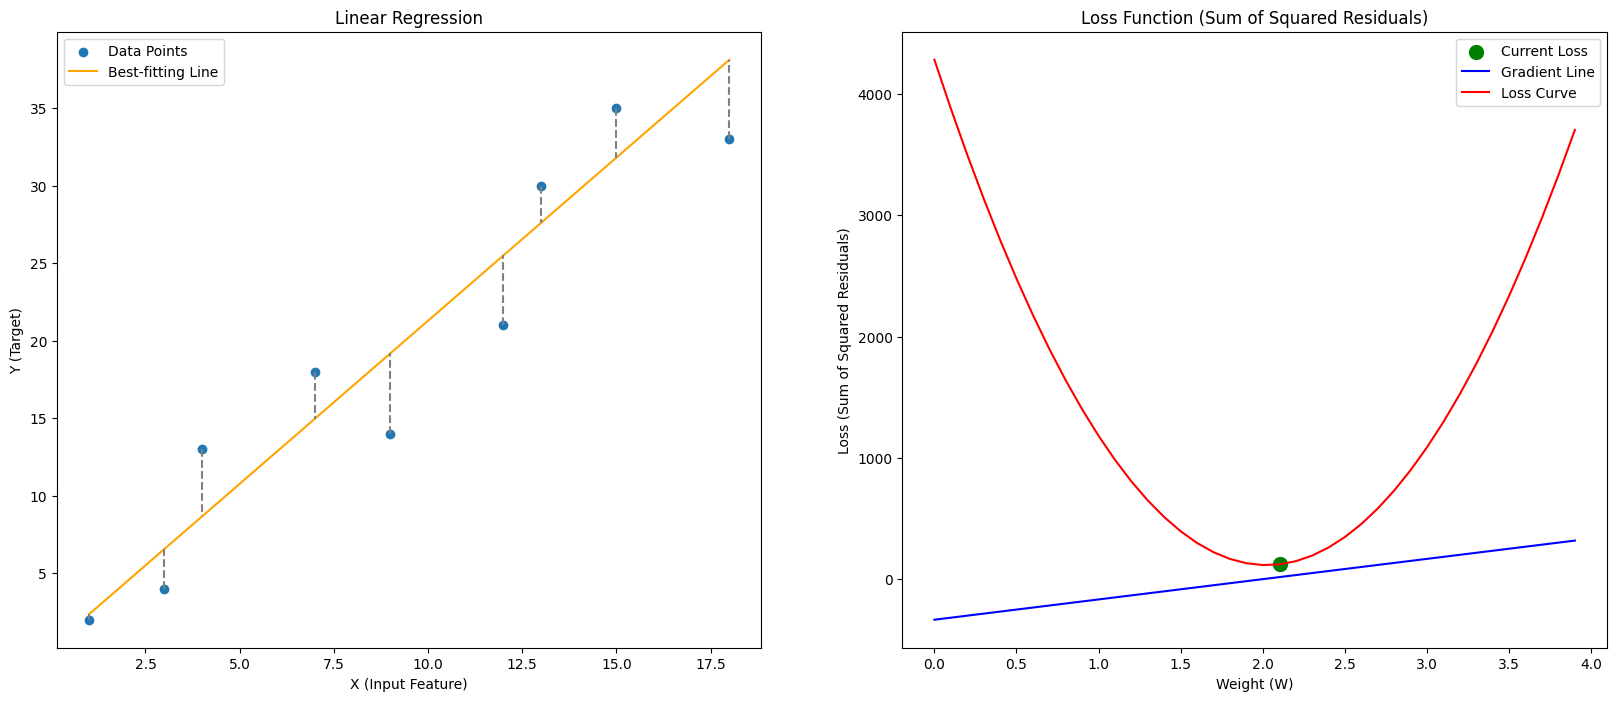

W = 1.9544895080884994 | LossFunc Slope = (167.24381398089474) | Distance = 121.99234933199466


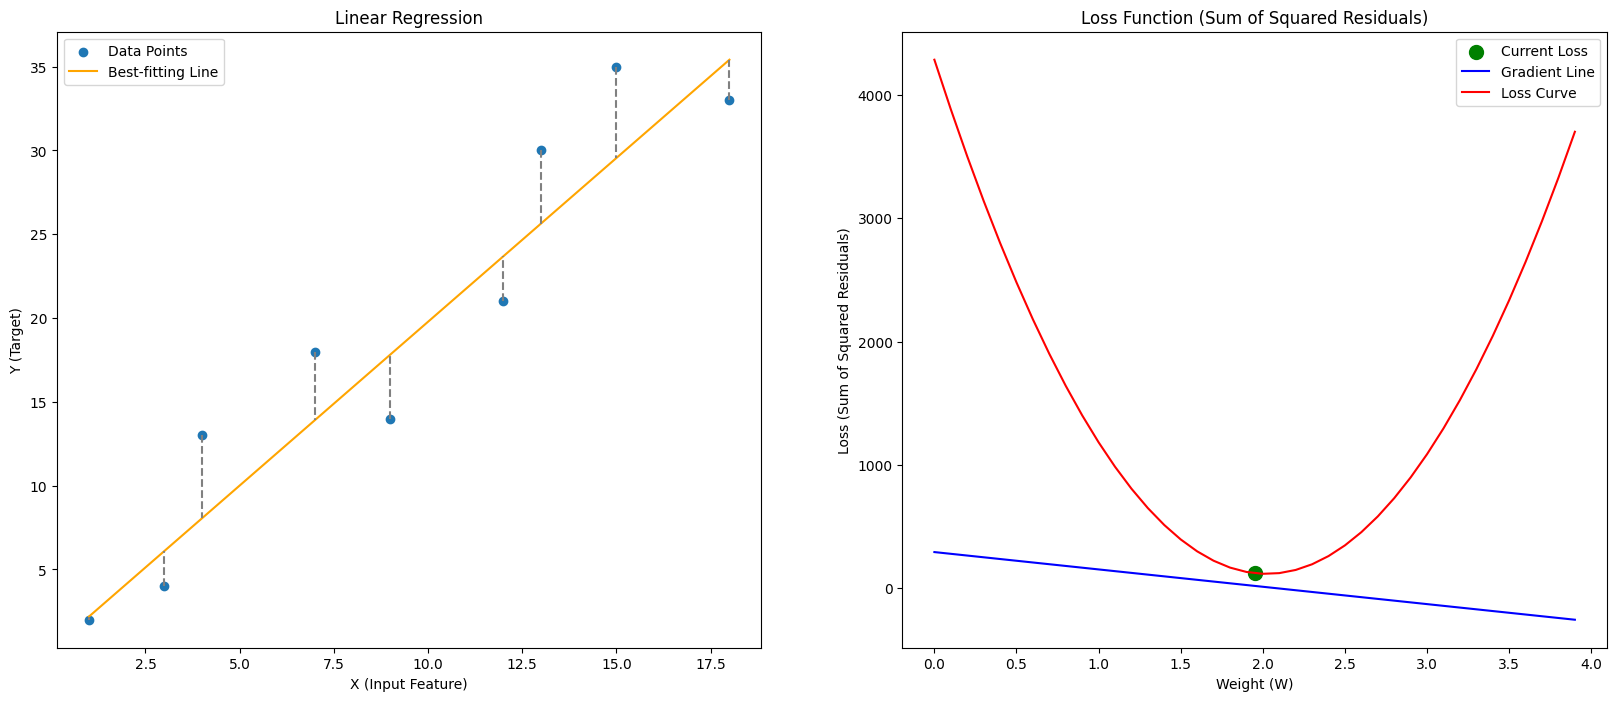

W = 2.0810506203548322 | LossFunc Slope = (-140.6234580737033) | Distance = 120.577852499716


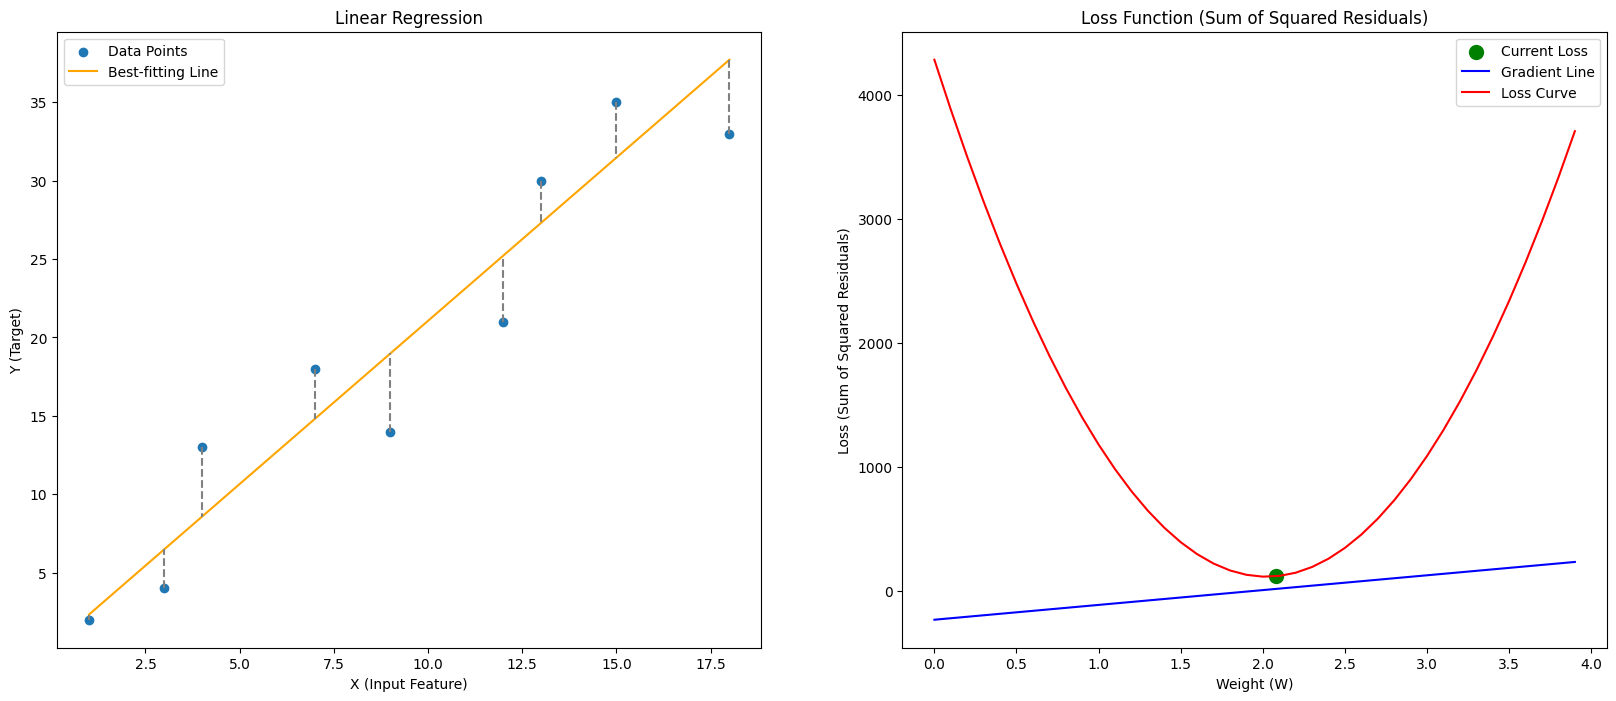

W = 1.97367015332249 | LossFunc Slope = (119.31163003593575) | Distance = 119.56564894292241


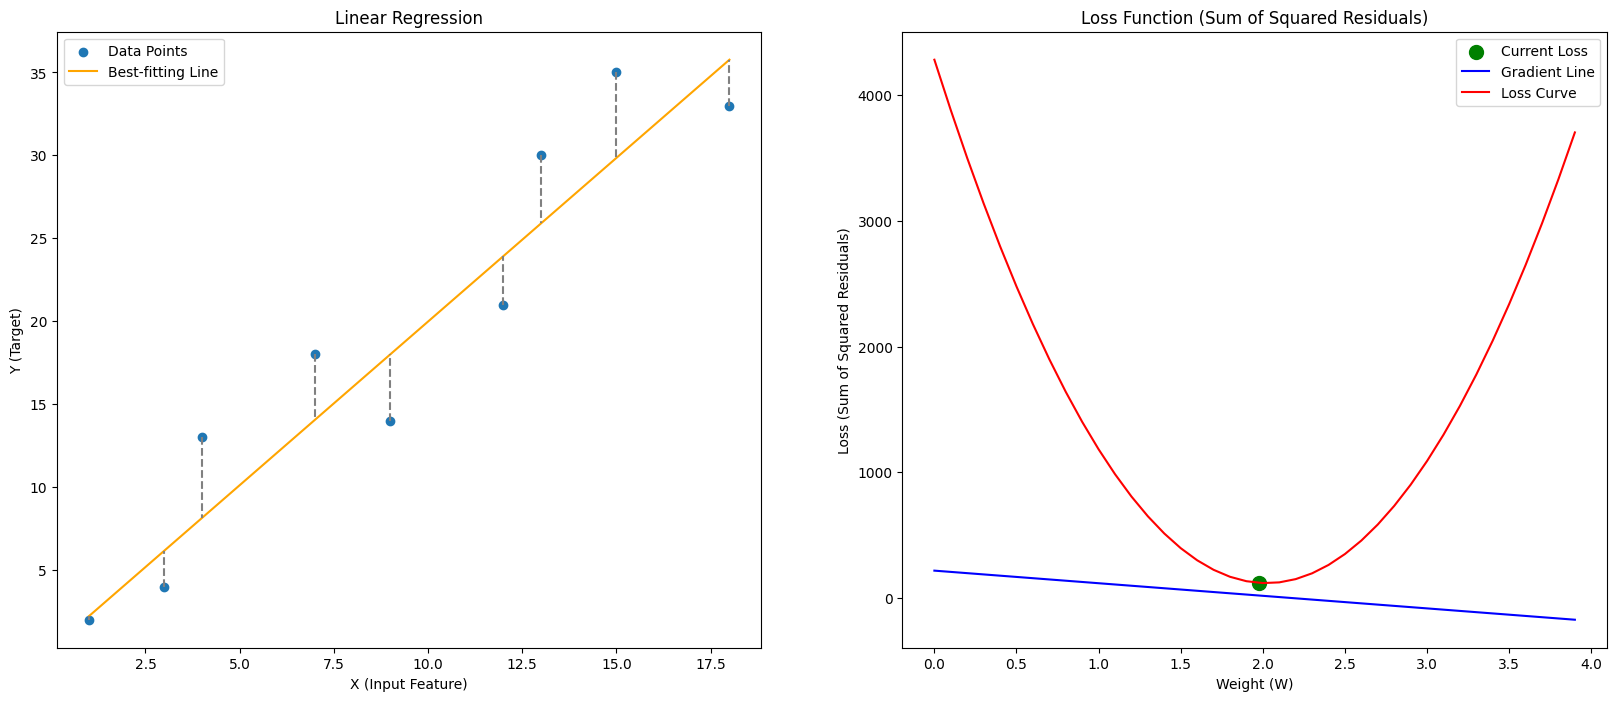

W = 2.0638127890698783 | LossFunc Slope = (-100.15848416376488) | Distance = 118.84026161078066


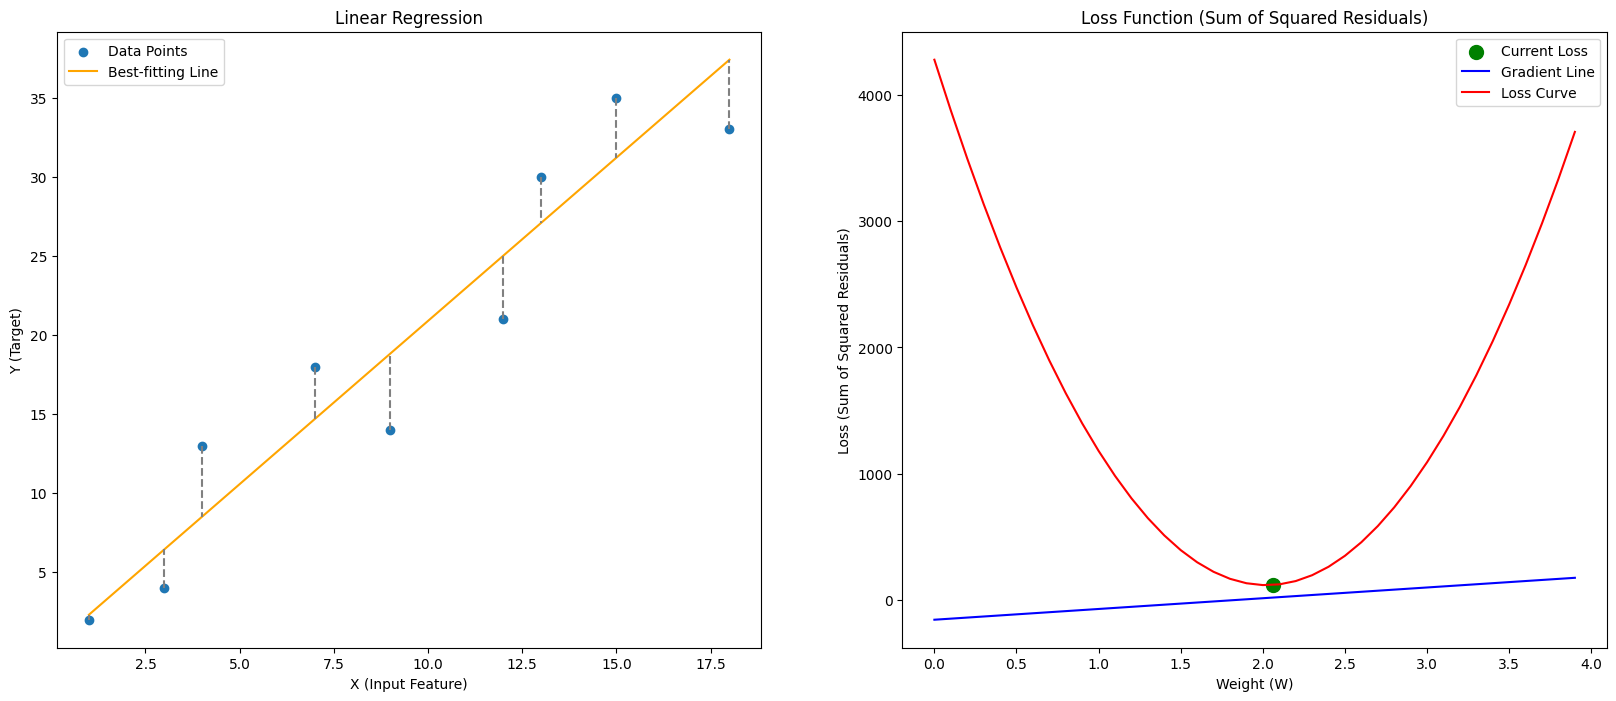

W = 1.9871855309931323 | LossFunc Slope = (85.14139786305107) | Distance = 118.31936994914965


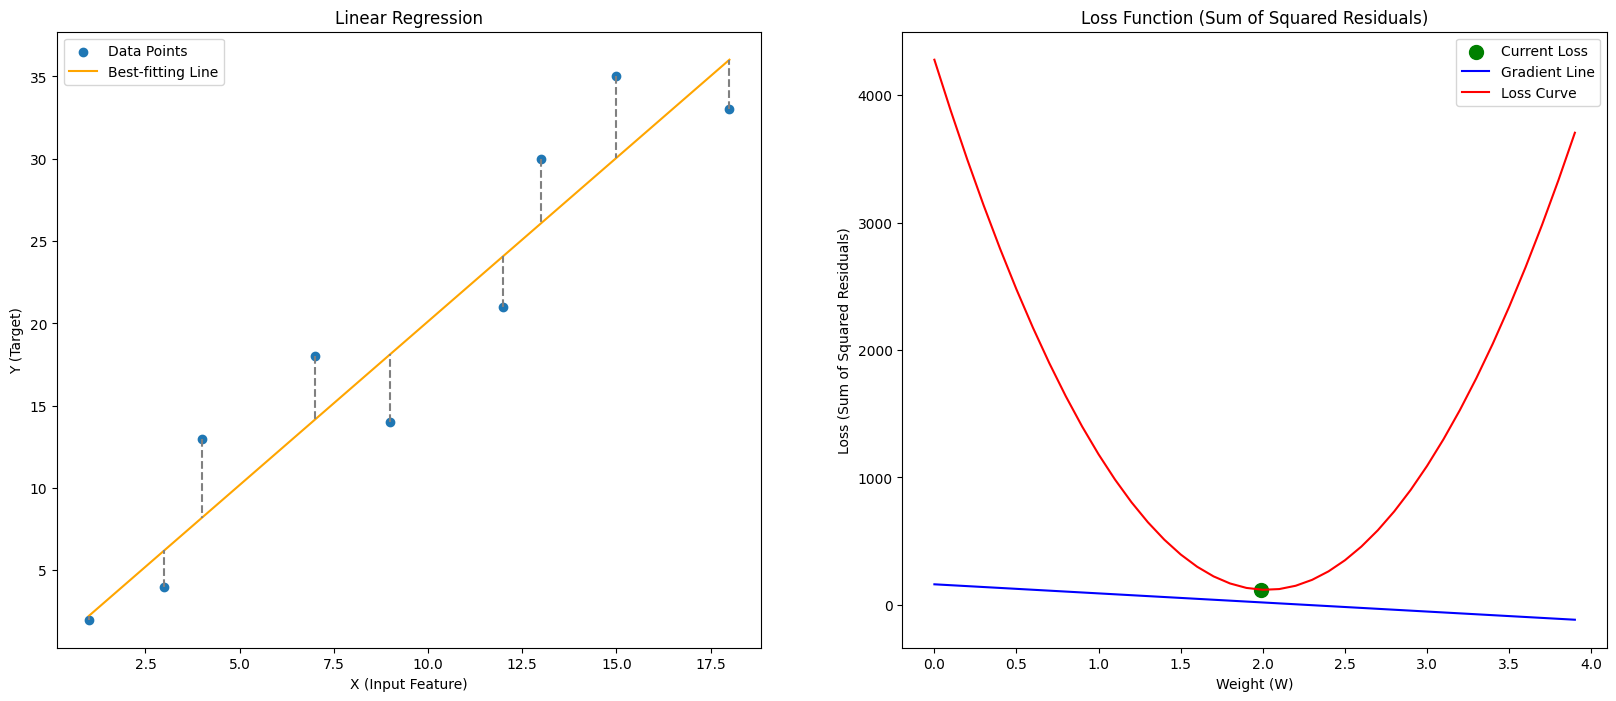

W = 2.051367157318661 | LossFunc Slope = (-71.31291813947652) | Distance = 117.94428972049035


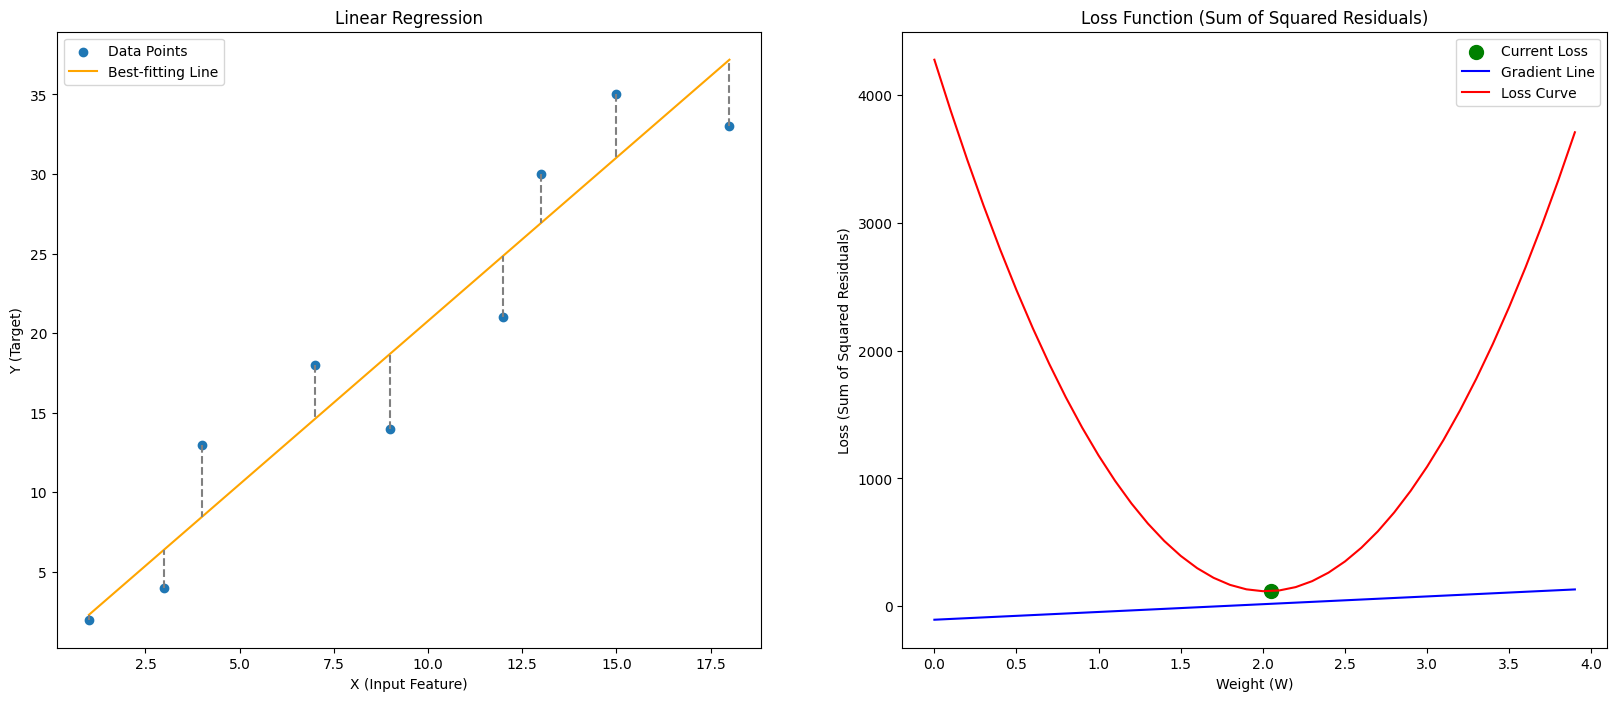

In [ ]:
# Set random W and B
w = 0
b = 0

for i in range(25):
    y_pred = w * x + b
    w, b = calc_gradient(x, y, y_pred, w, b, lr=0.0009)

# Try VERY LARGE learning rate

W = 4.158 | LossFunc Slope = (-4158) | Distance = 4792.491832000002


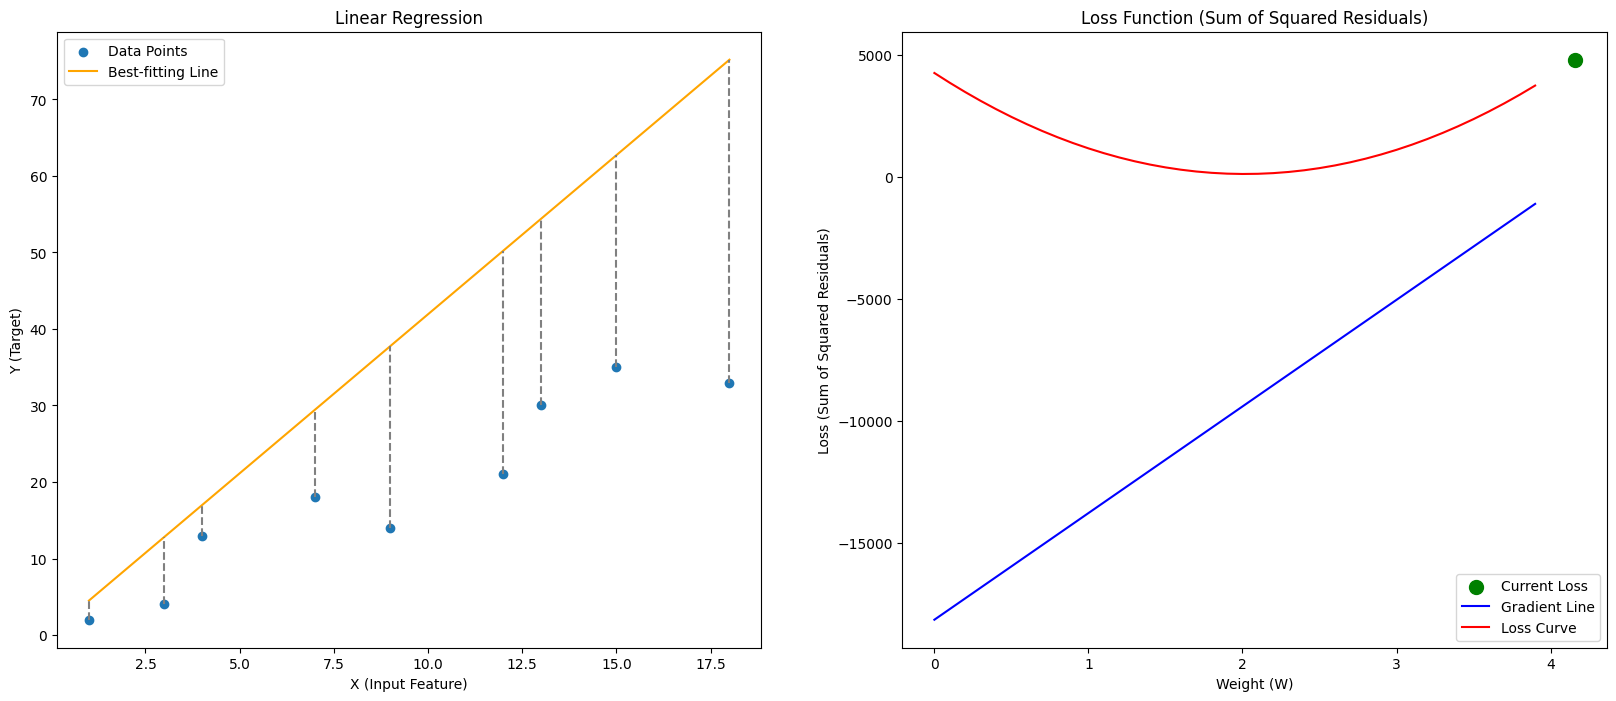

W = -0.20544800000000052 | LossFunc Slope = (4363.448000000001) | Distance = 5264.223511140995


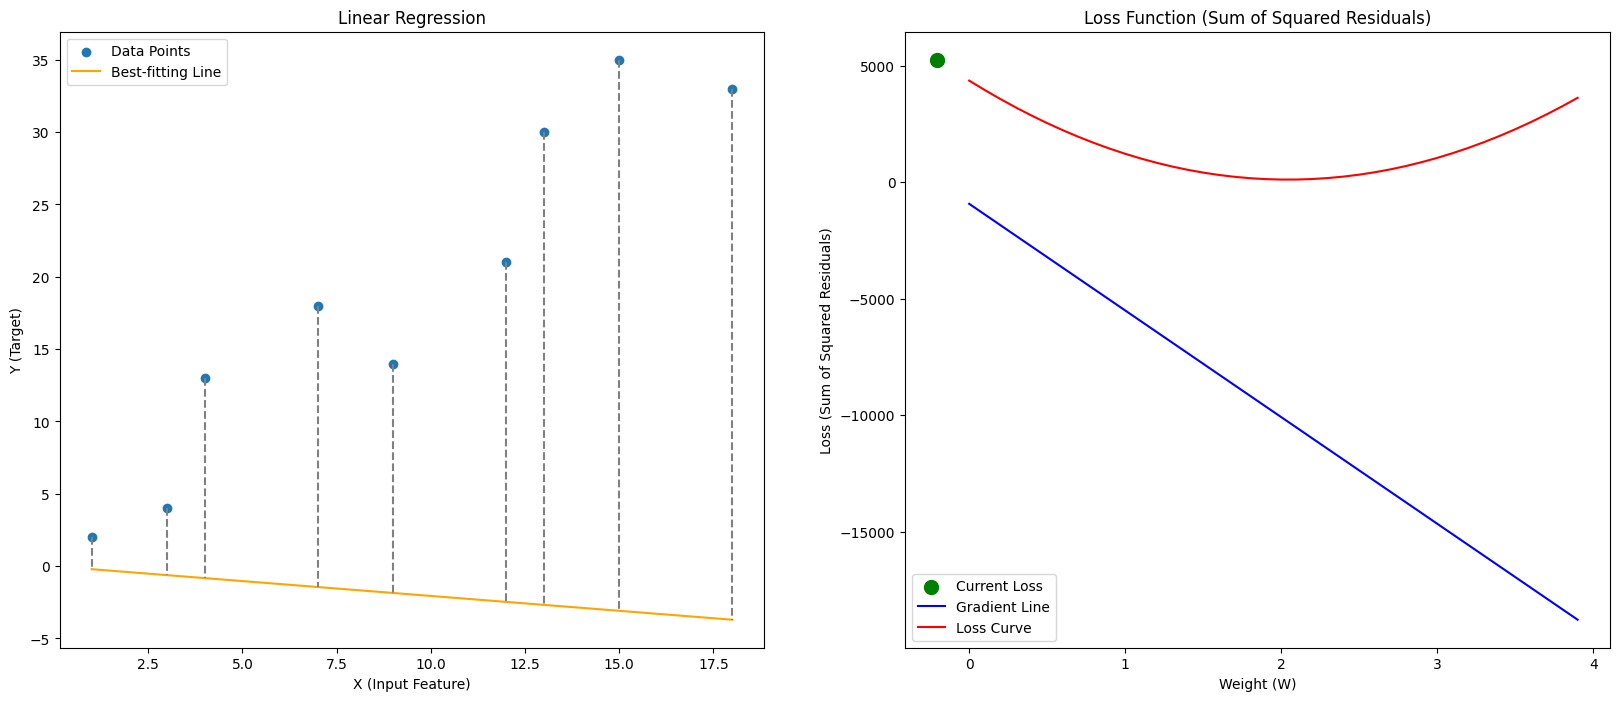

W = 4.372161376000001 | LossFunc Slope = (-4577.609376000001) | Distance = 5783.55822256549


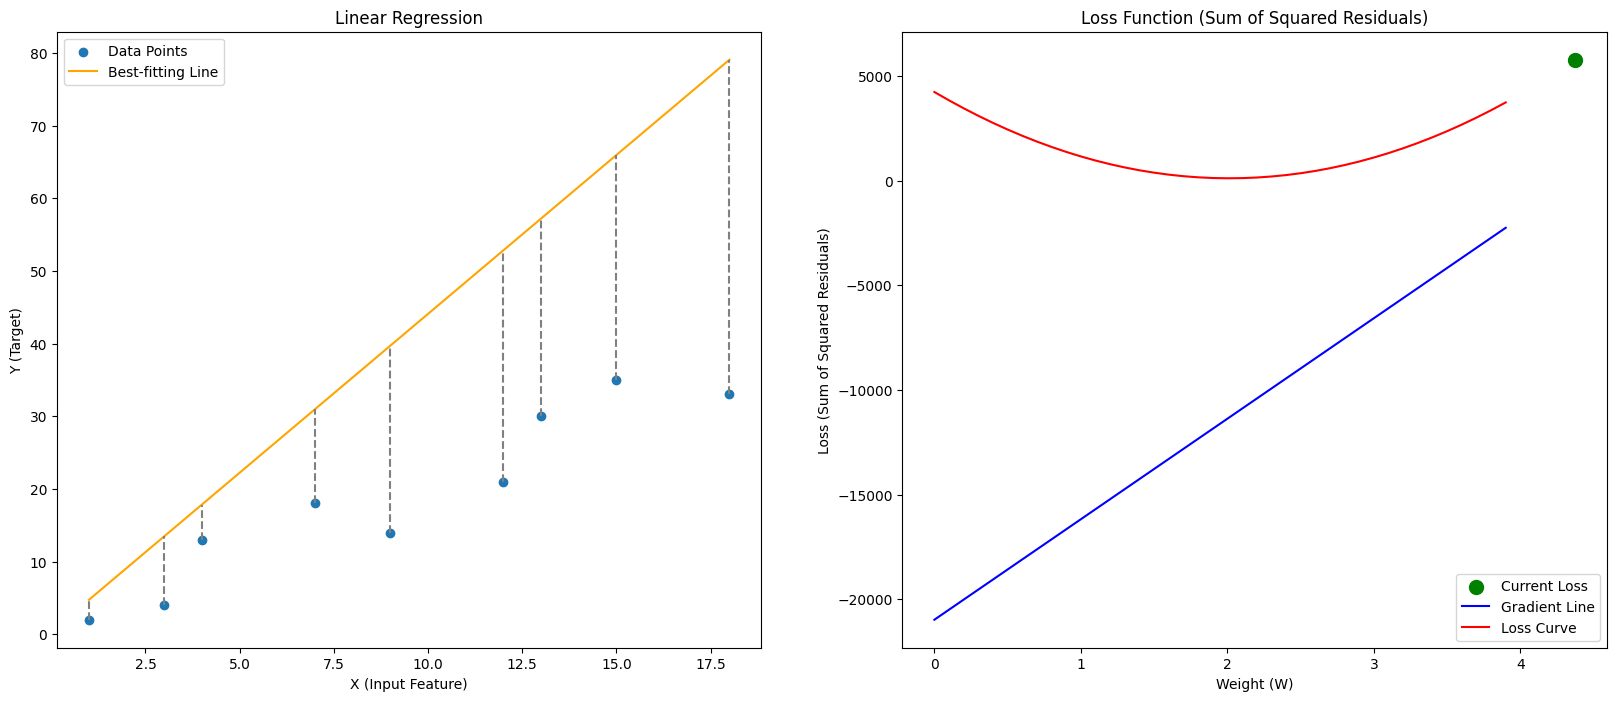

W = -0.43155137740800065 | LossFunc Slope = (4803.712753408002) | Distance = 6355.29942762059


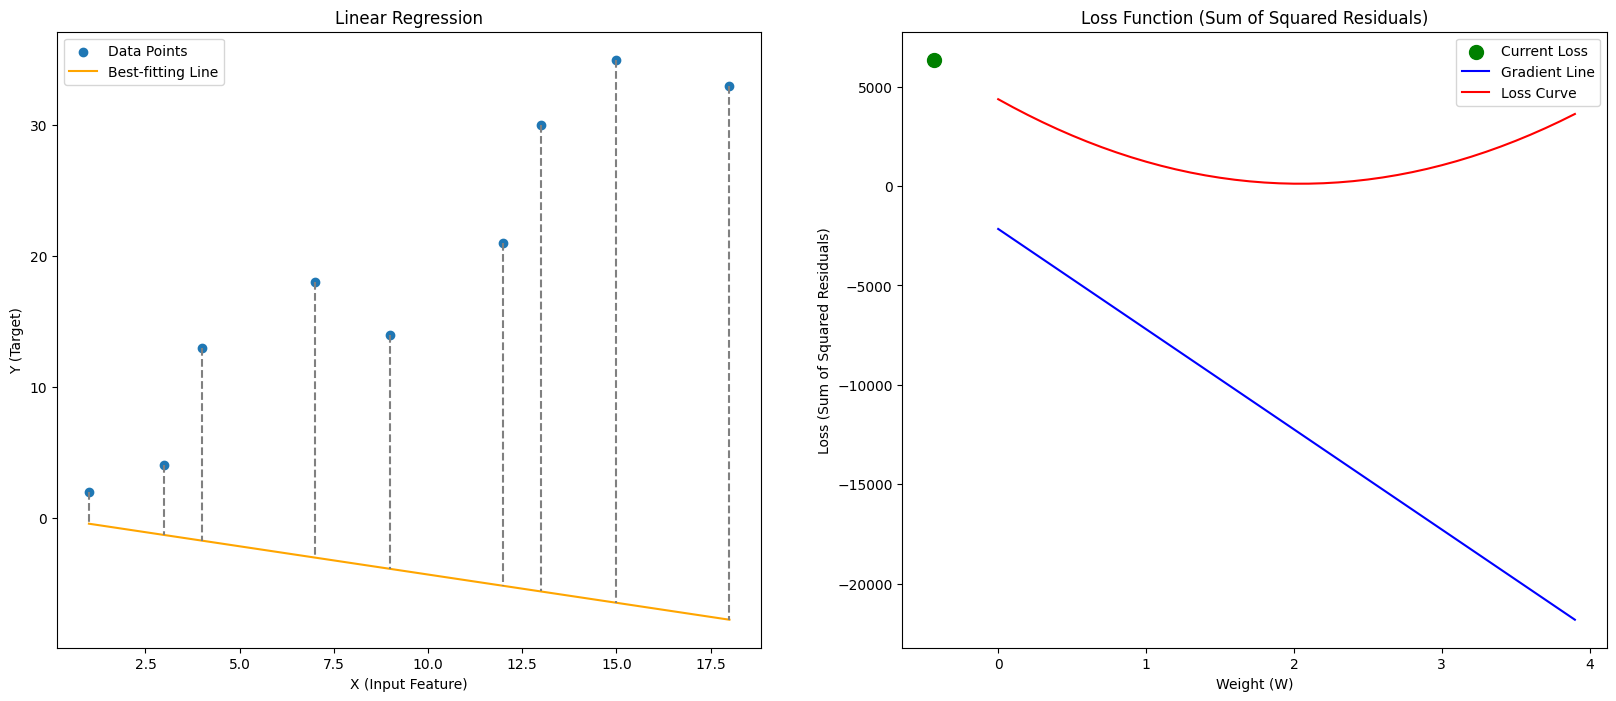

W = 4.608008546945281 | LossFunc Slope = (-5039.5599243532815) | Distance = 6984.7352908173525


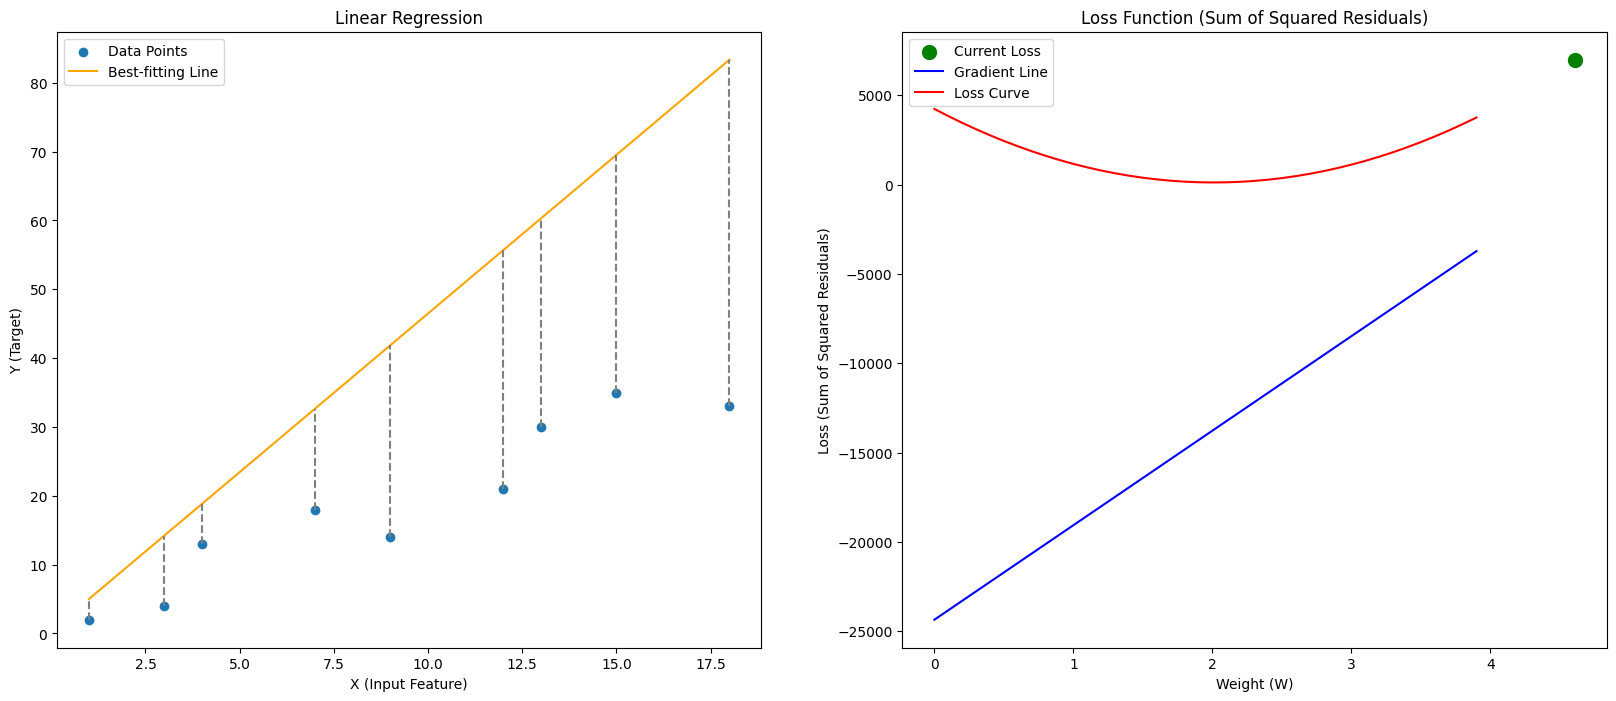

W = -0.6803951242905946 | LossFunc Slope = (5288.403671235876) | Distance = 7677.687589782342


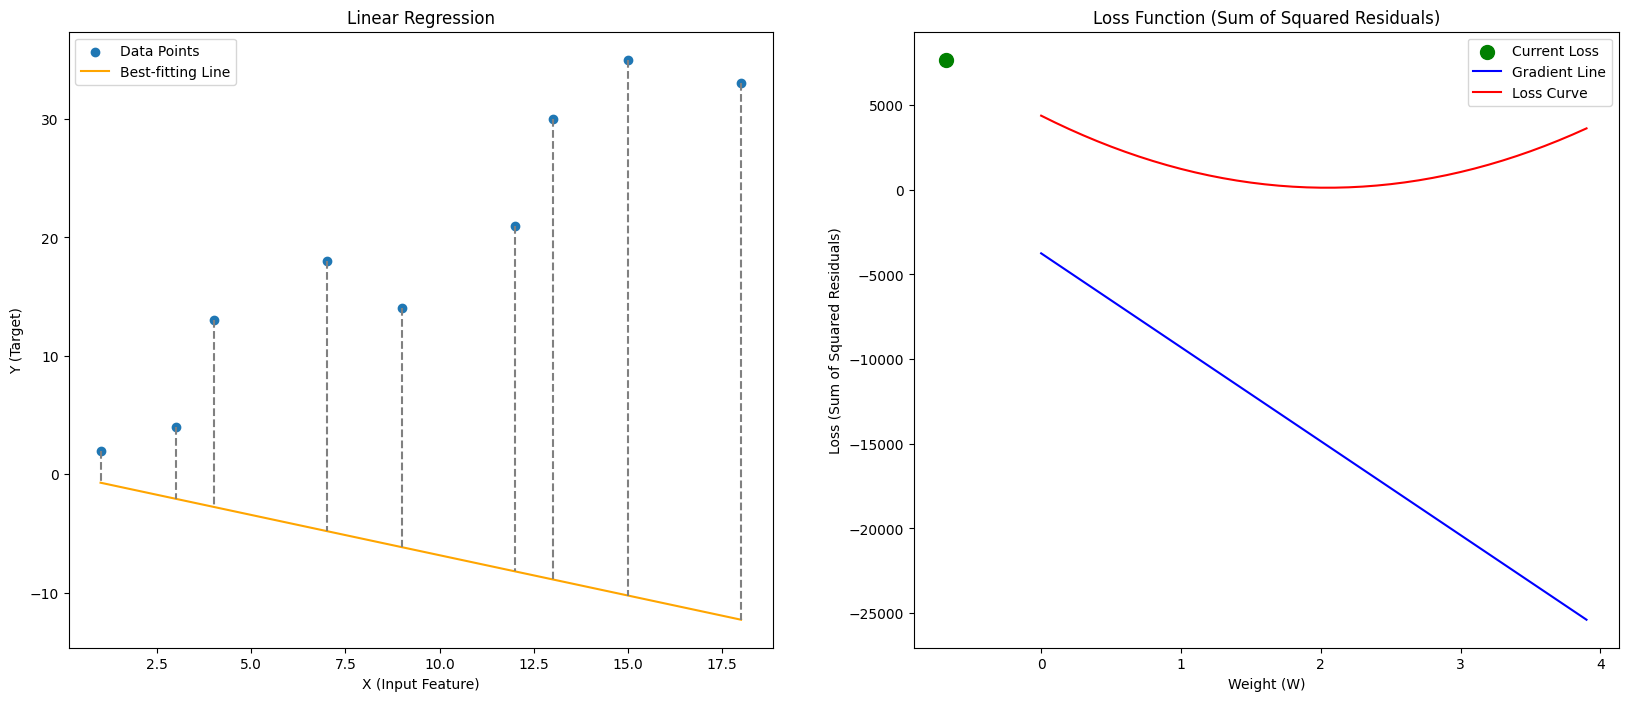

W = 4.867729045842207 | LossFunc Slope = (-5548.124170132802) | Distance = 8440.565560566843


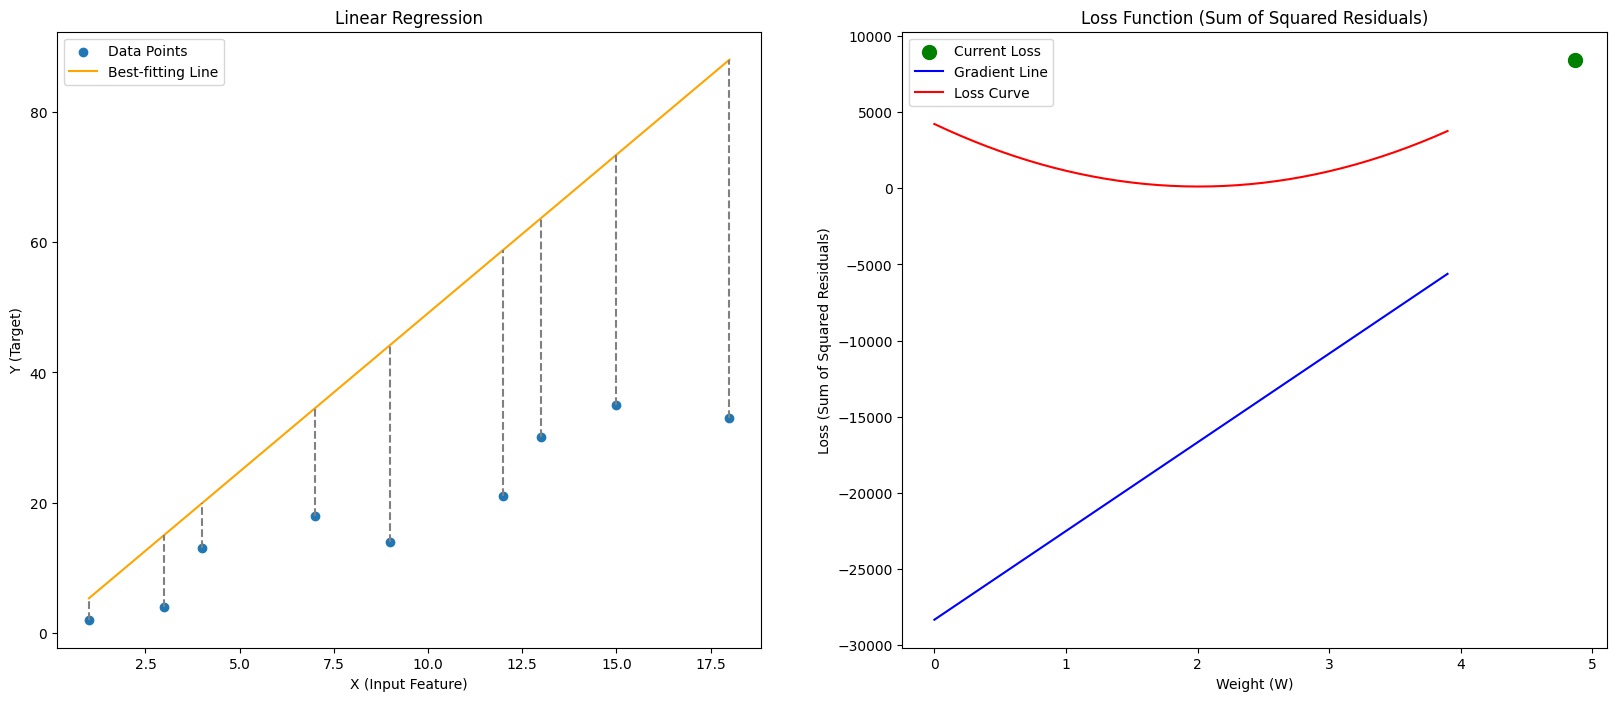

W = -0.9542746162256854 | LossFunc Slope = (5822.003662067892) | Distance = 9280.425176325896


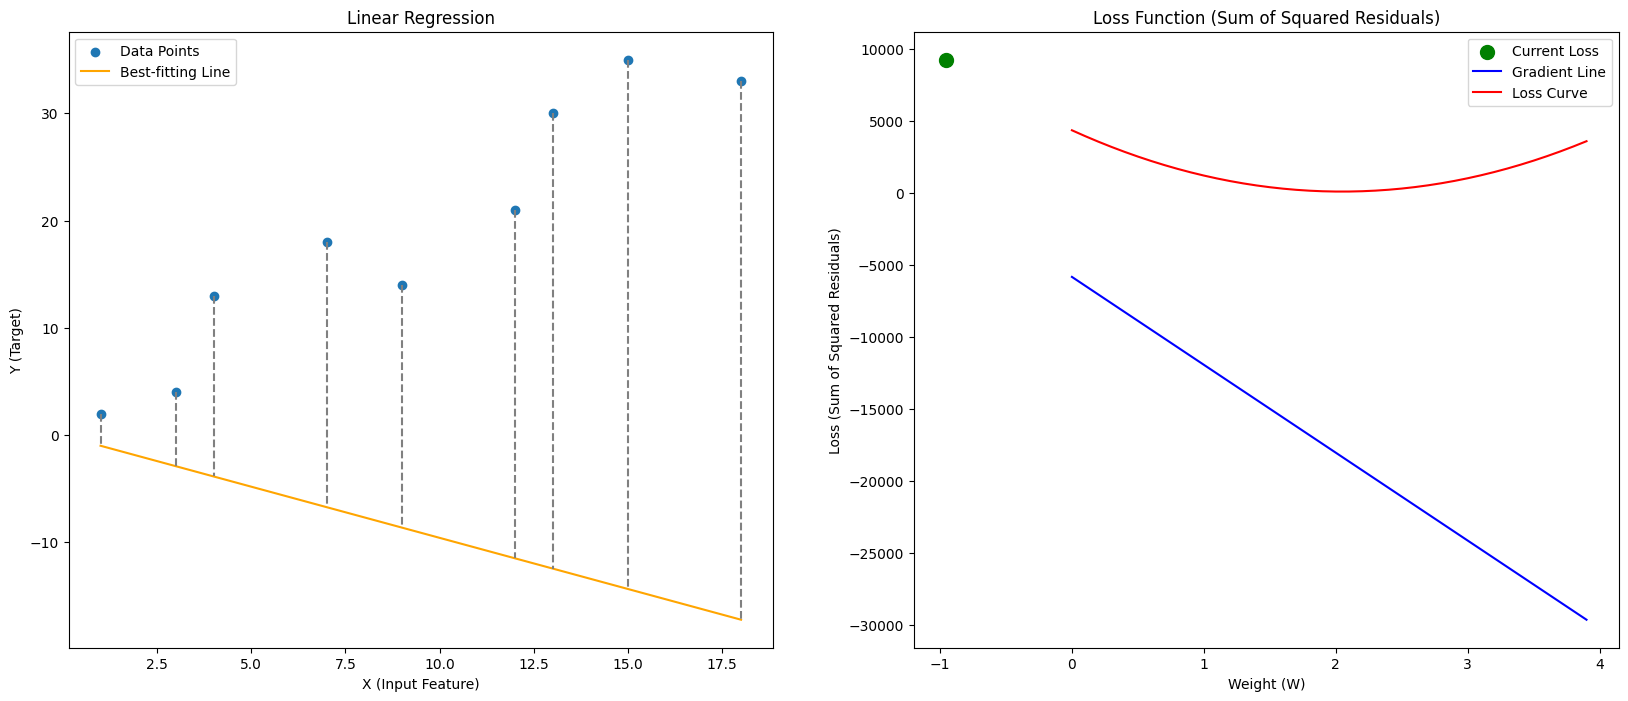

W = 5.153731149938822 | LossFunc Slope = (-6108.005766164507) | Distance = 10205.03440763239


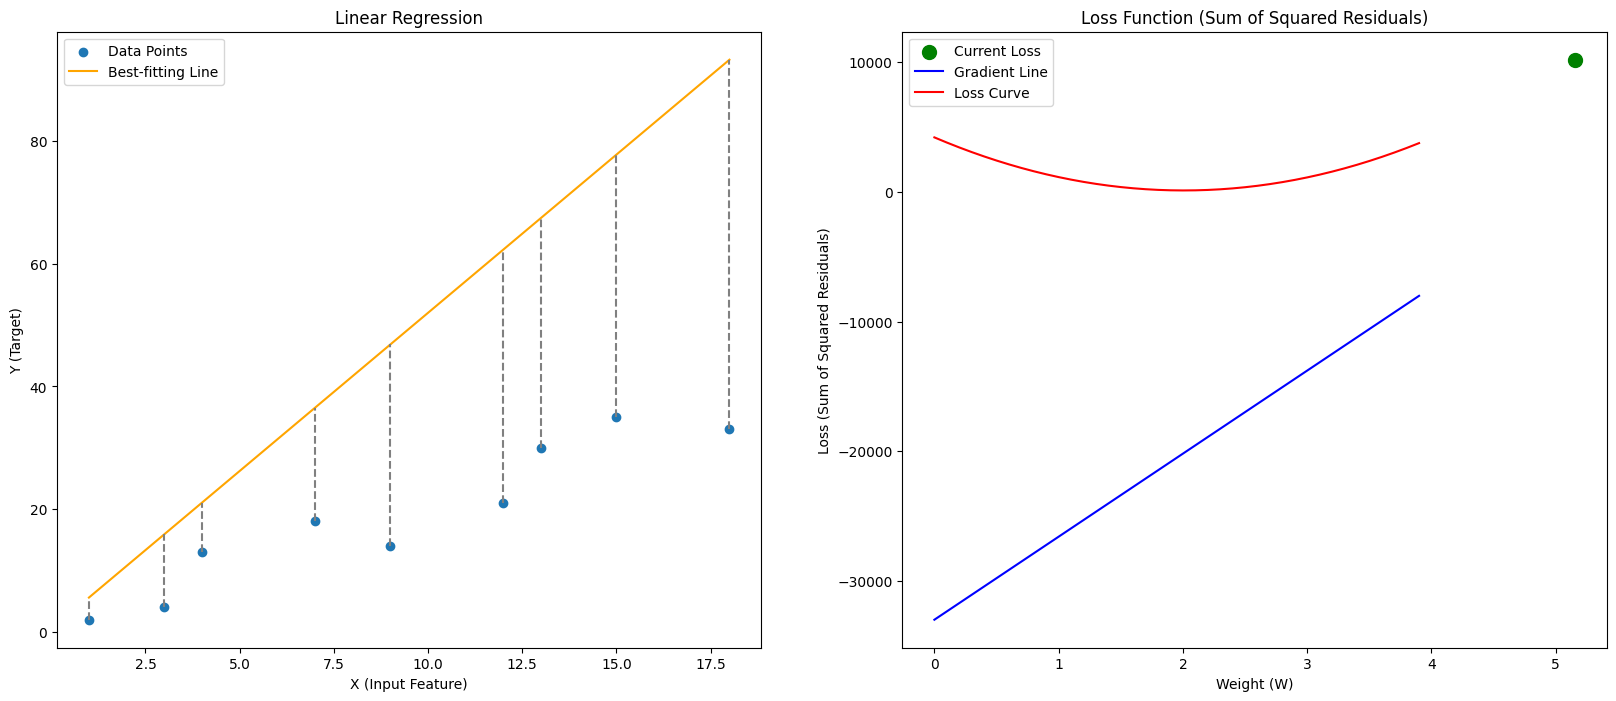

W = -1.255716841541136 | LossFunc Slope = (6409.447991479958) | Distance = 11222.945068015217


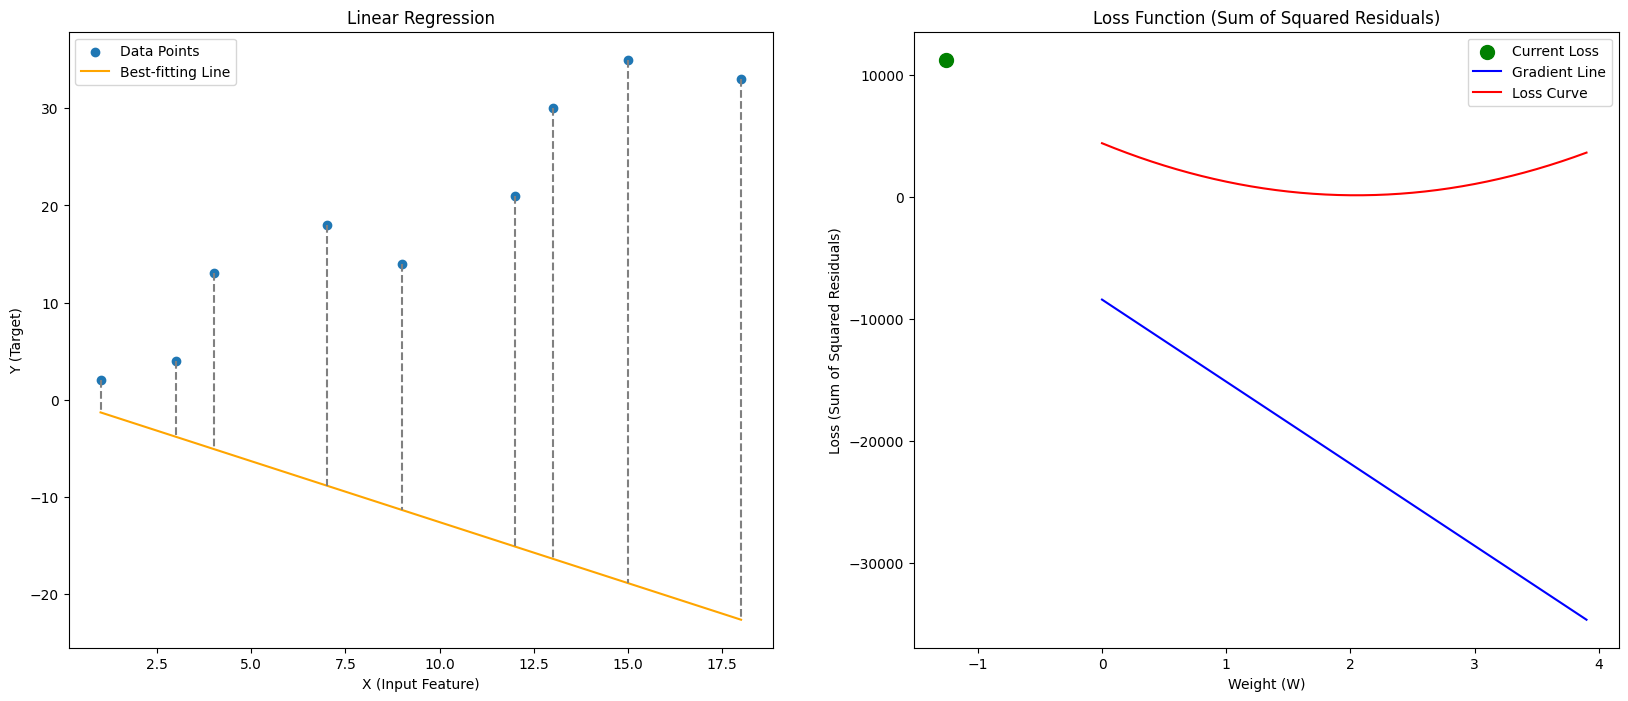

W = 5.468666155304535 | LossFunc Slope = (-6724.382996845671) | Distance = 12343.571909216751


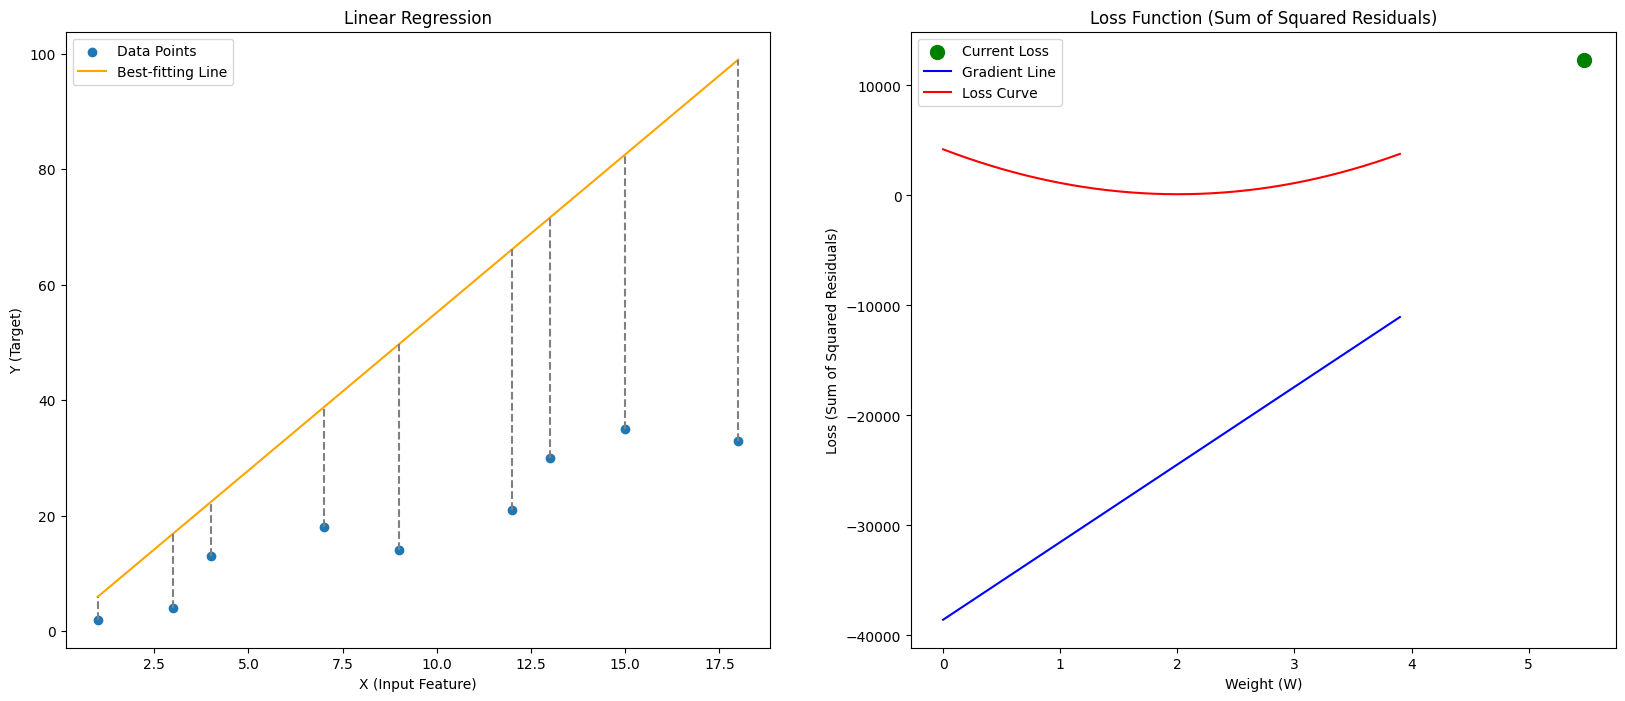

W = -1.5875037727320933 | LossFunc Slope = (7056.169928036628) | Distance = 13577.279697717351


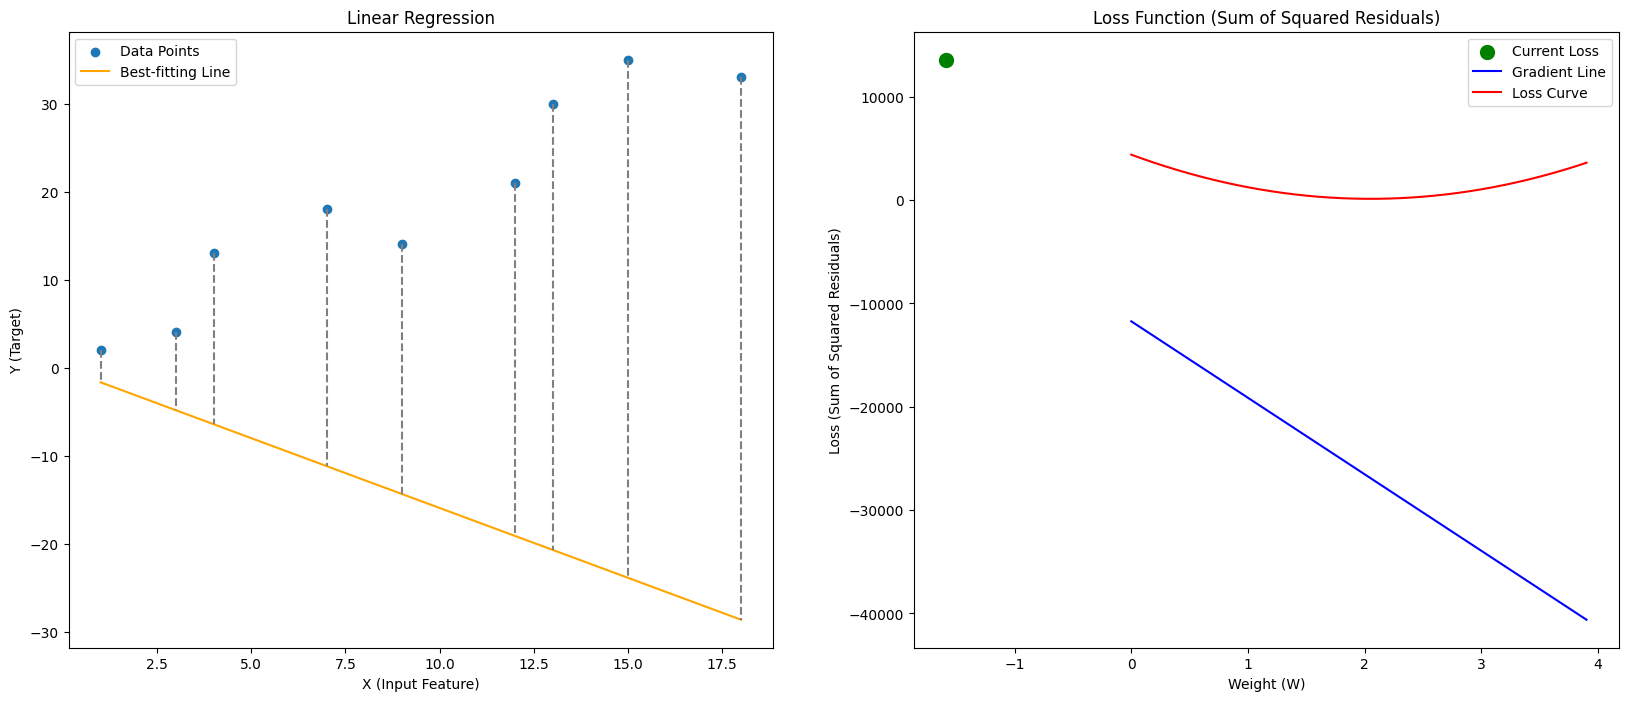

W = 5.815452899071984 | LossFunc Slope = (-7402.956671804077) | Distance = 14935.479077892658


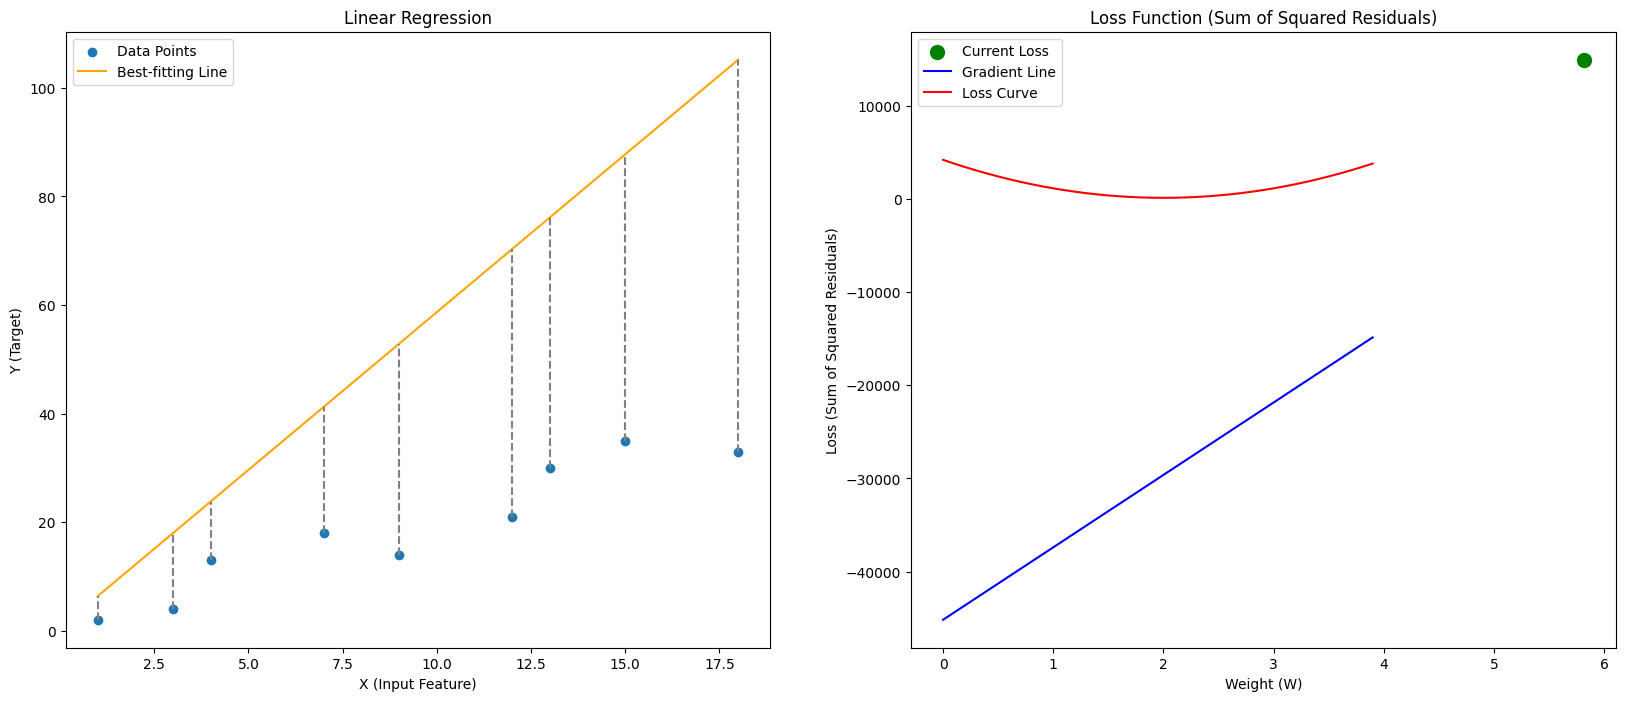

W = -1.952698096217829 | LossFunc Slope = (7768.150995289812) | Distance = 16430.73210843685


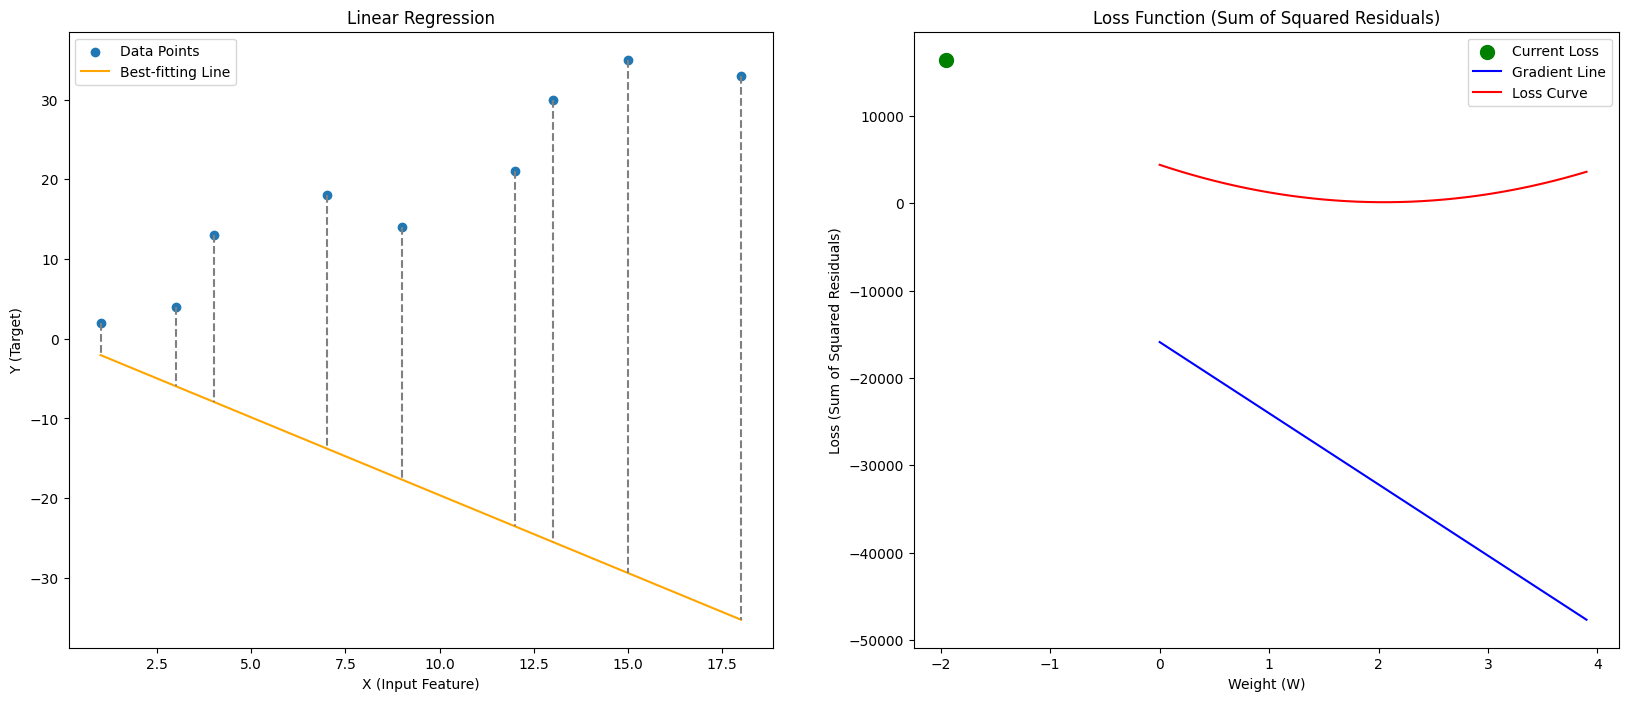

W = 6.197304756145884 | LossFunc Slope = (-8150.002852363712) | Distance = 18076.868448152054


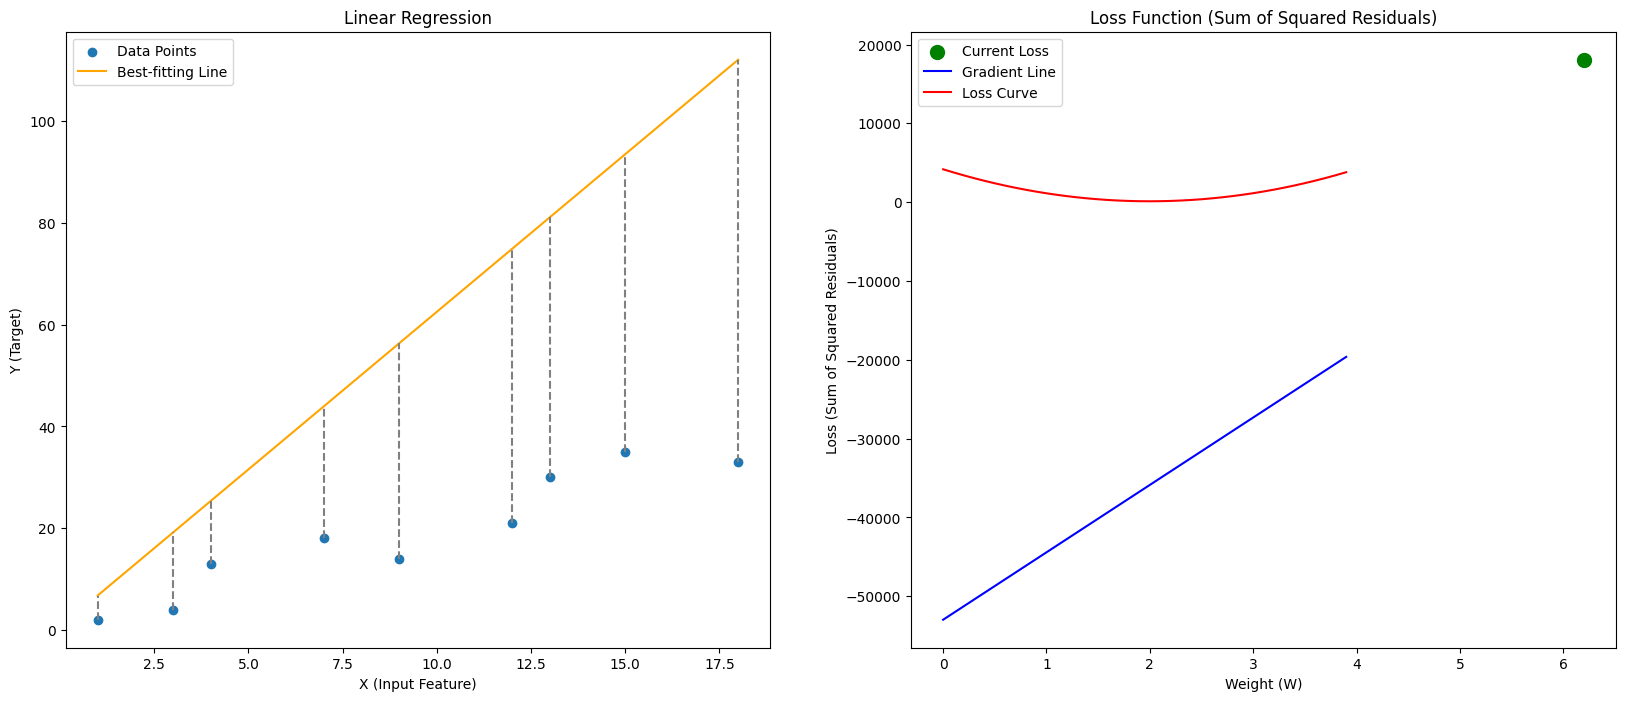

W = -2.3546715384111545 | LossFunc Slope = (8551.976294557038) | Distance = 19889.11326569995


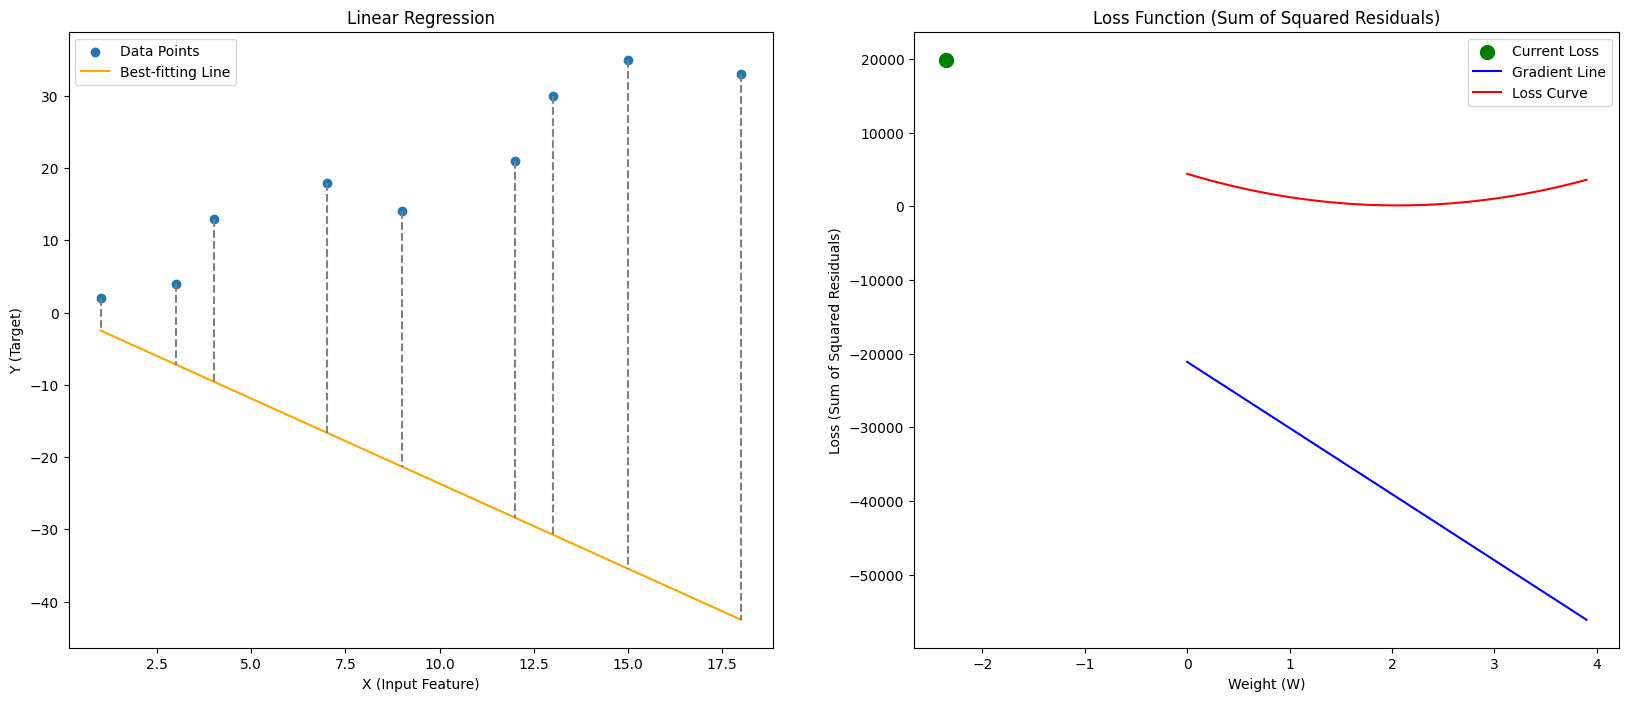

W = 6.617759360070029 | LossFunc Slope = (-8972.430898481183) | Distance = 21884.228056345655


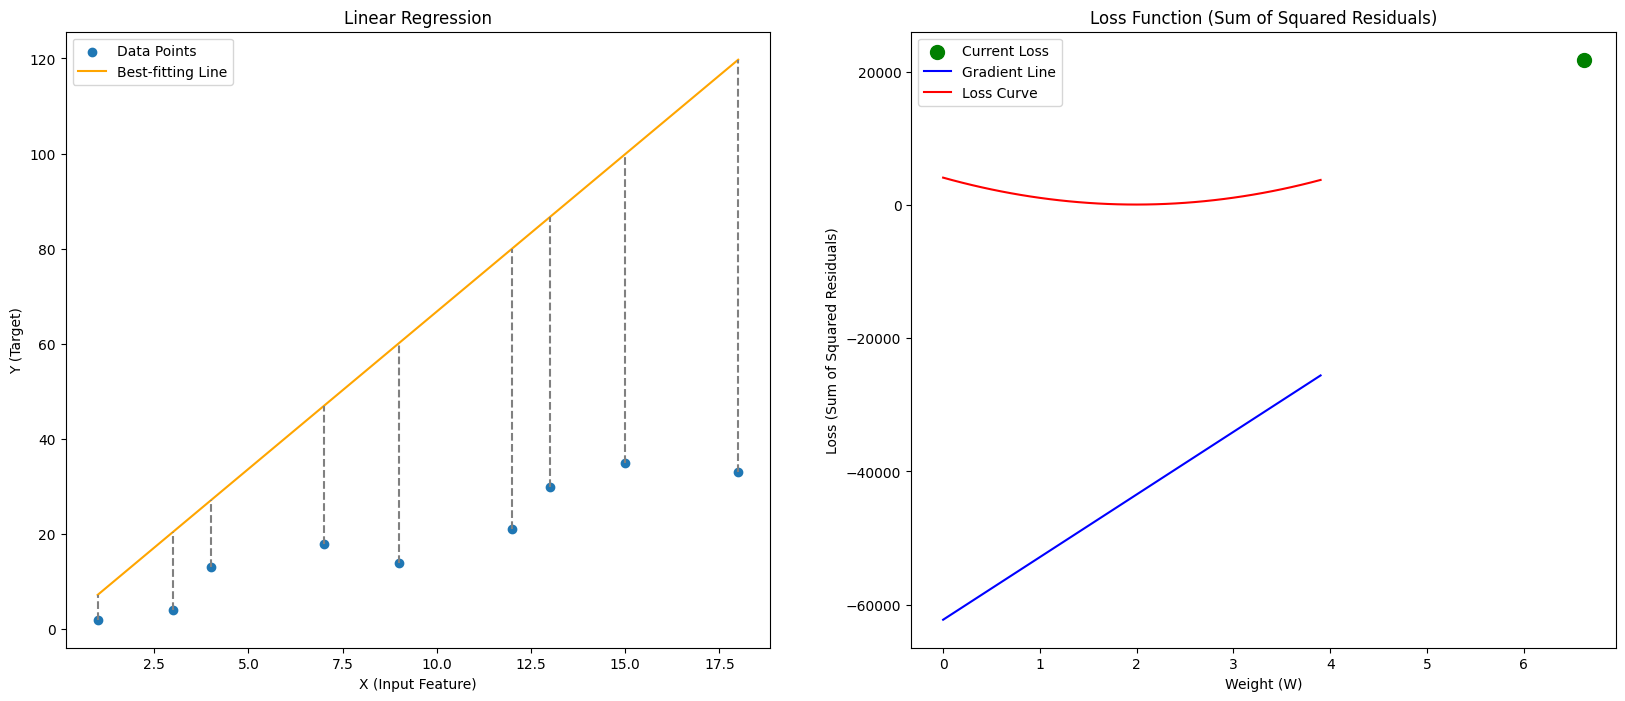

W = -2.7971360500865545 | LossFunc Slope = (9414.895410156583) | Distance = 24080.6656681


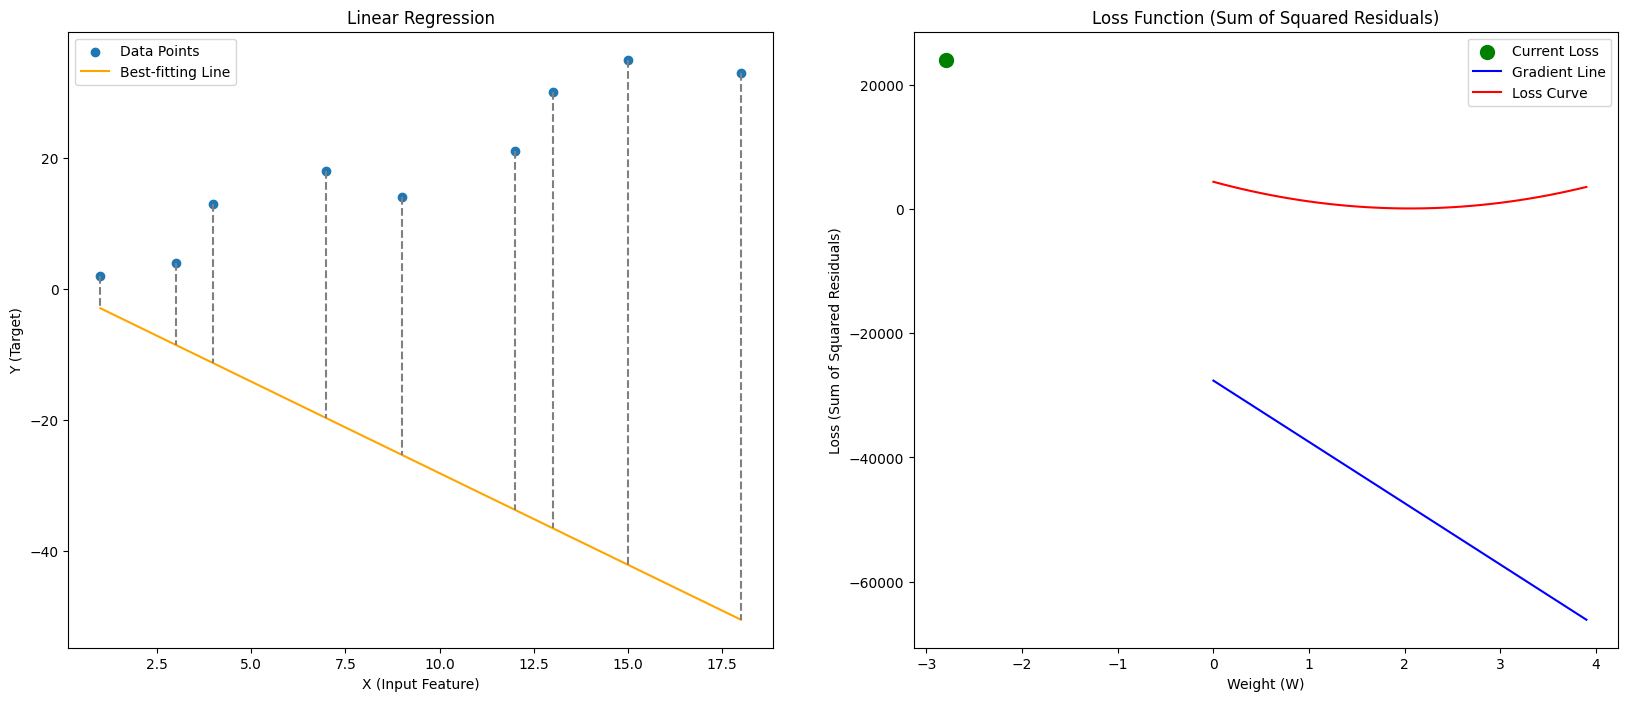

W = 7.0807113229390835 | LossFunc Slope = (-9877.847373025637) | Distance = 26498.74097108822


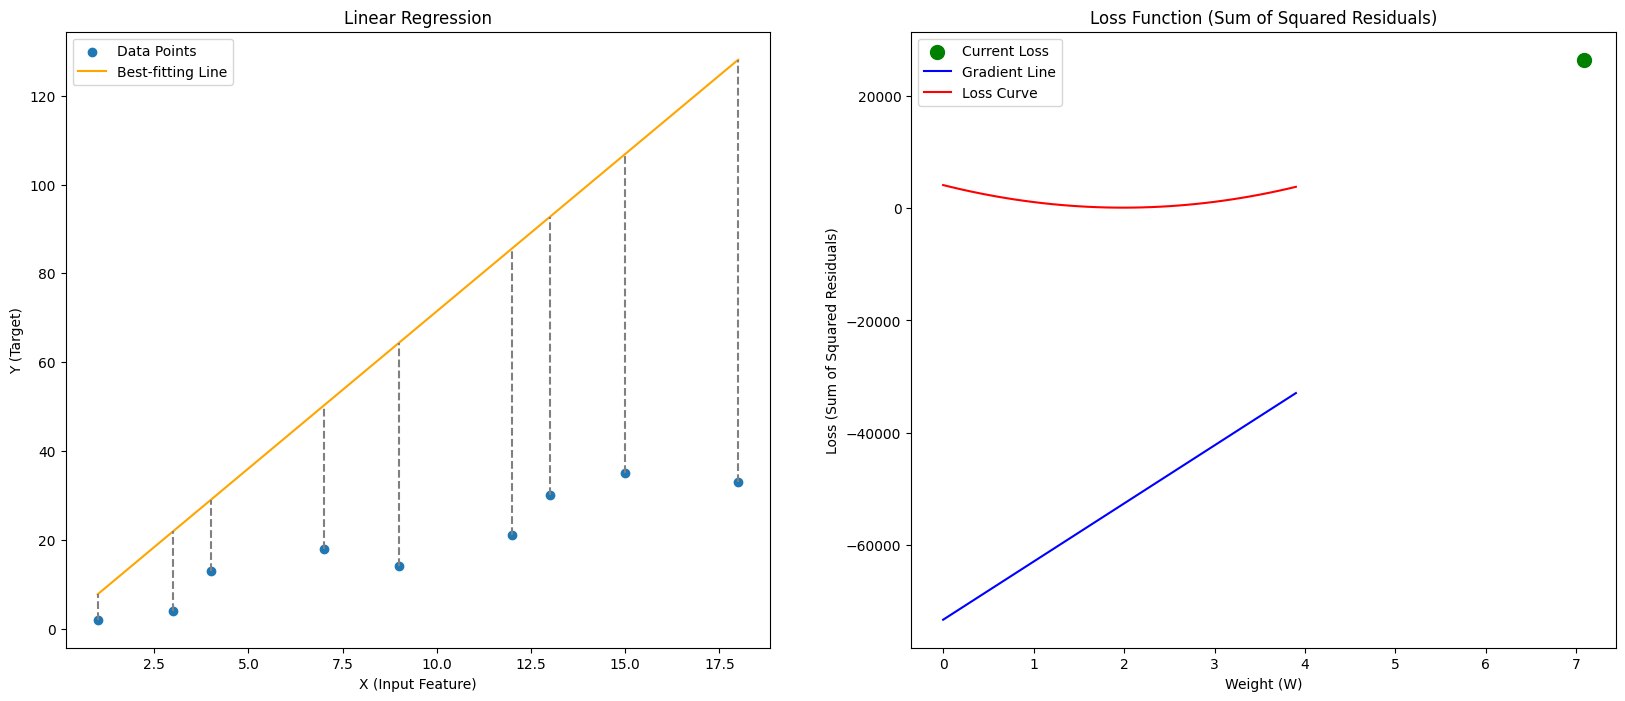

W = -3.284178137469495 | LossFunc Slope = (10364.889460408578) | Distance = 29160.818748656828


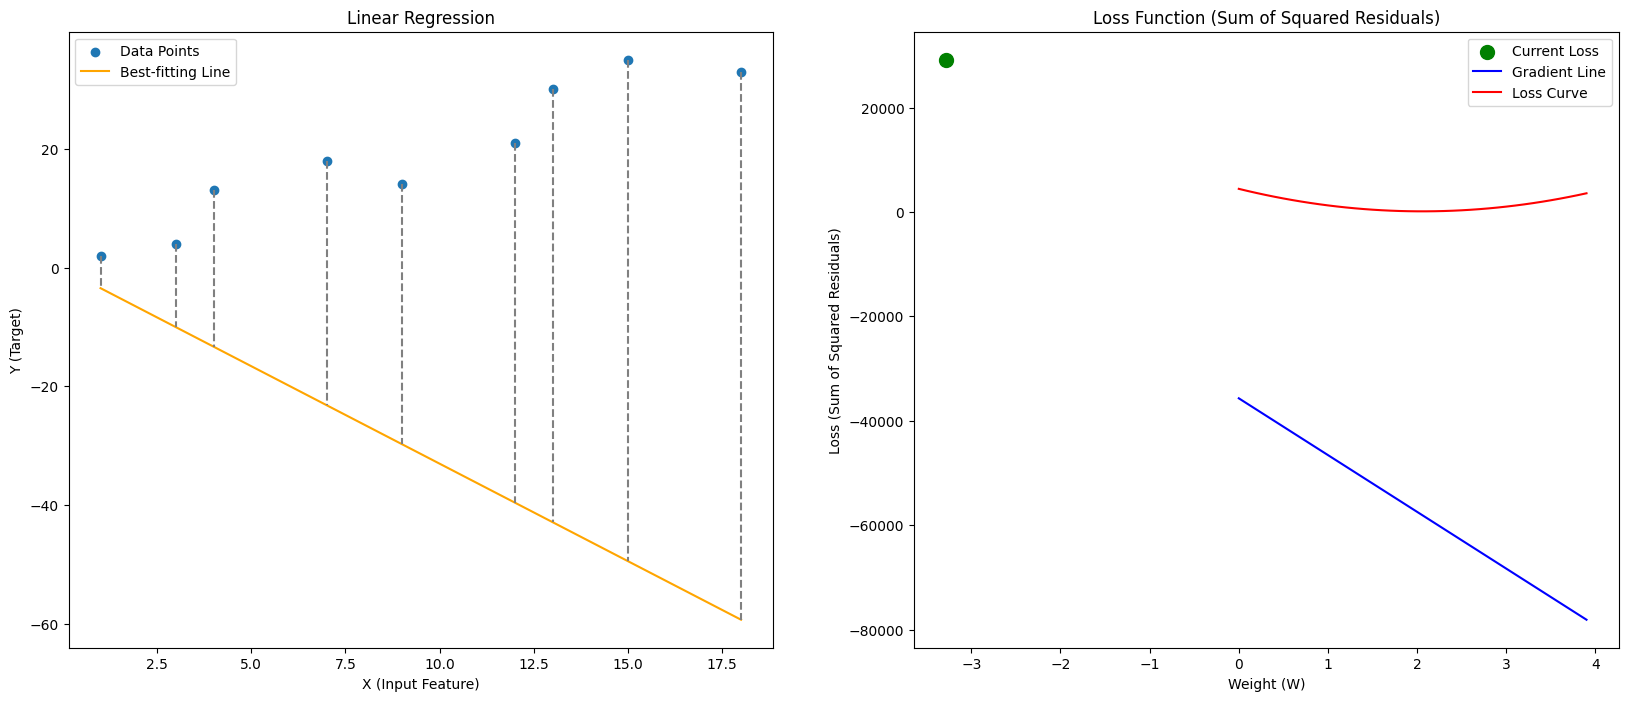

W = 7.590448256979845 | LossFunc Slope = (-10874.62639444934) | Distance = 32091.520548012326


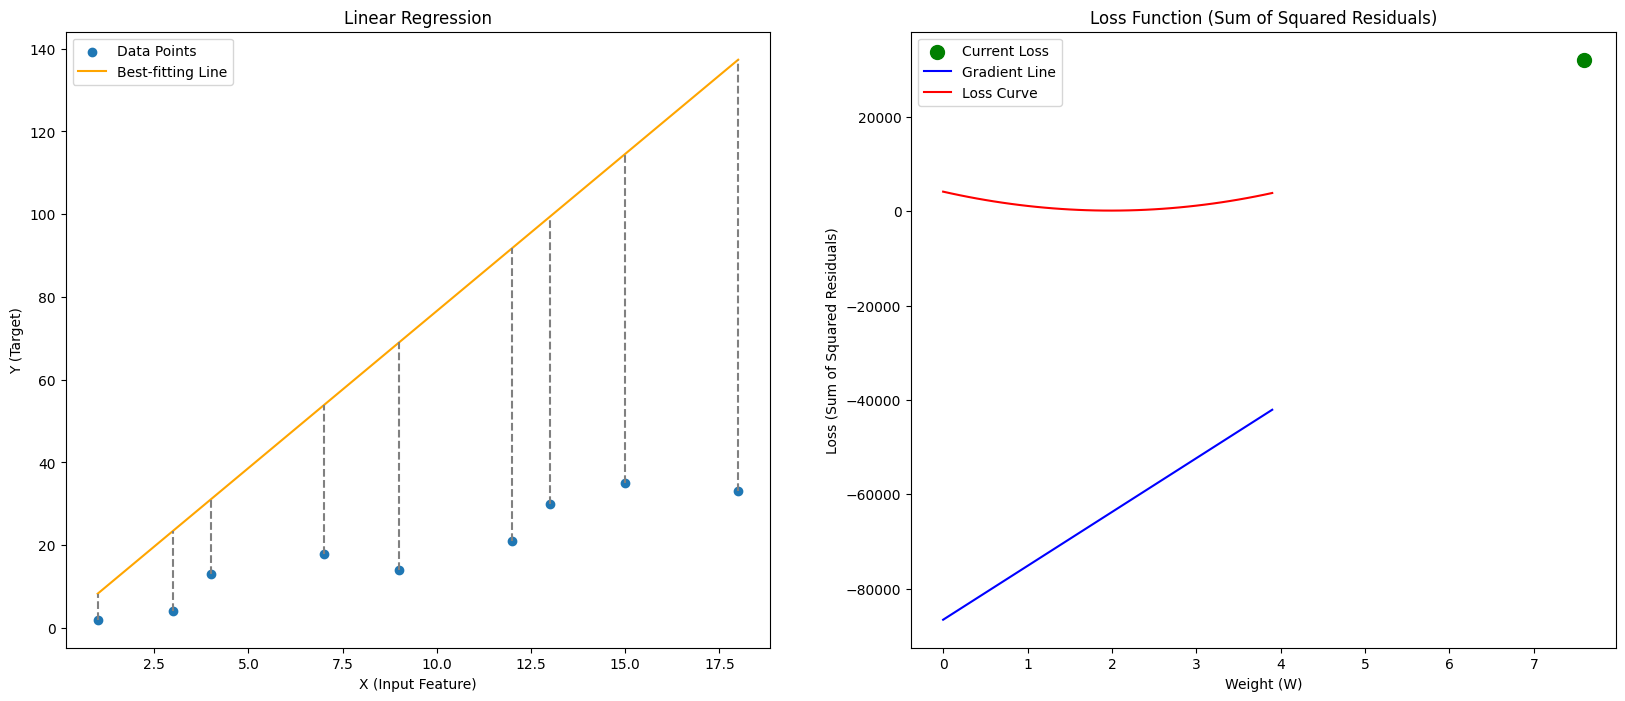

W = -3.8202966575731567 | LossFunc Slope = (11410.744914553) | Distance = 35317.952403542506


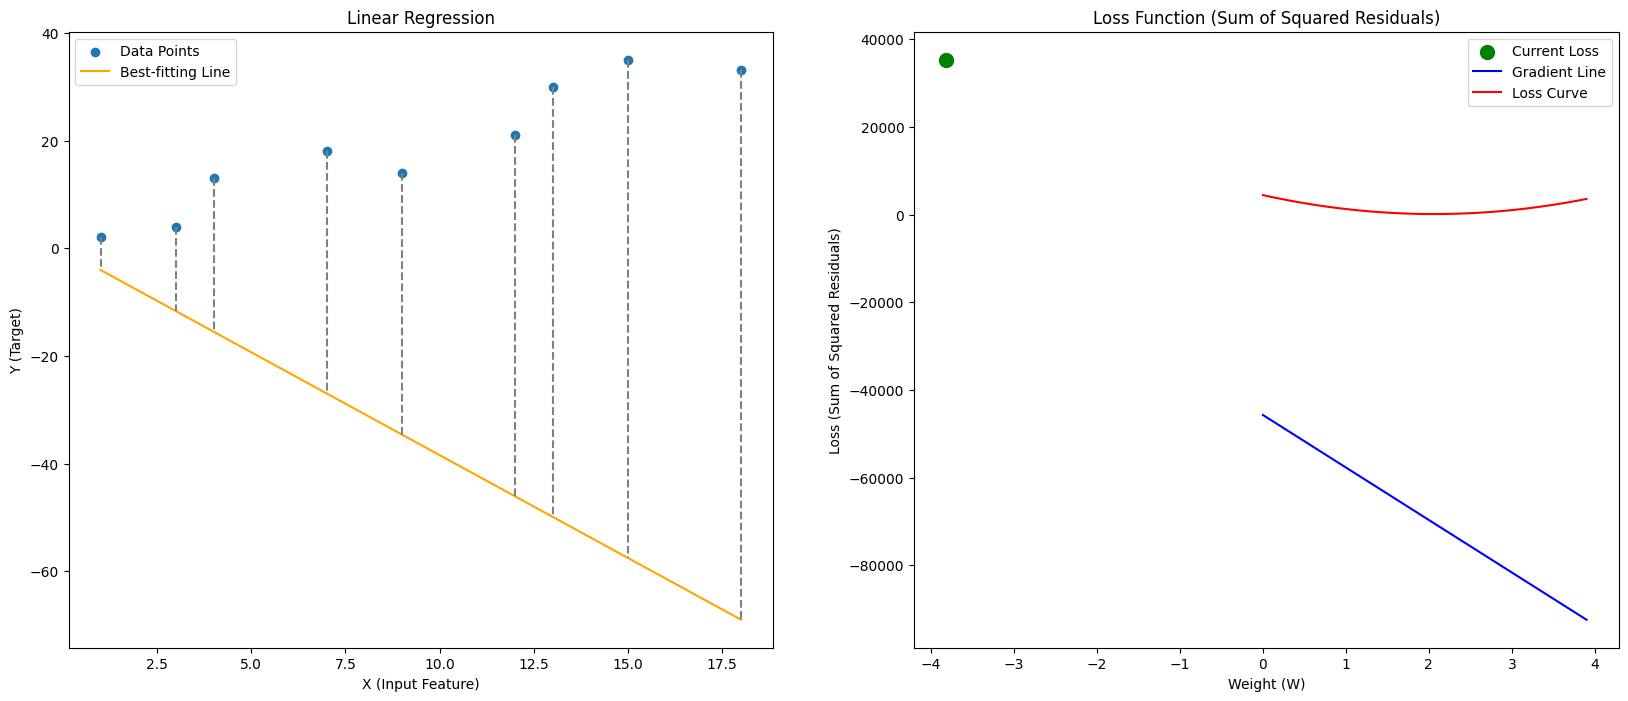

W = 8.15169043096364 | LossFunc Slope = (-11971.987088536796) | Distance = 38869.95553901981


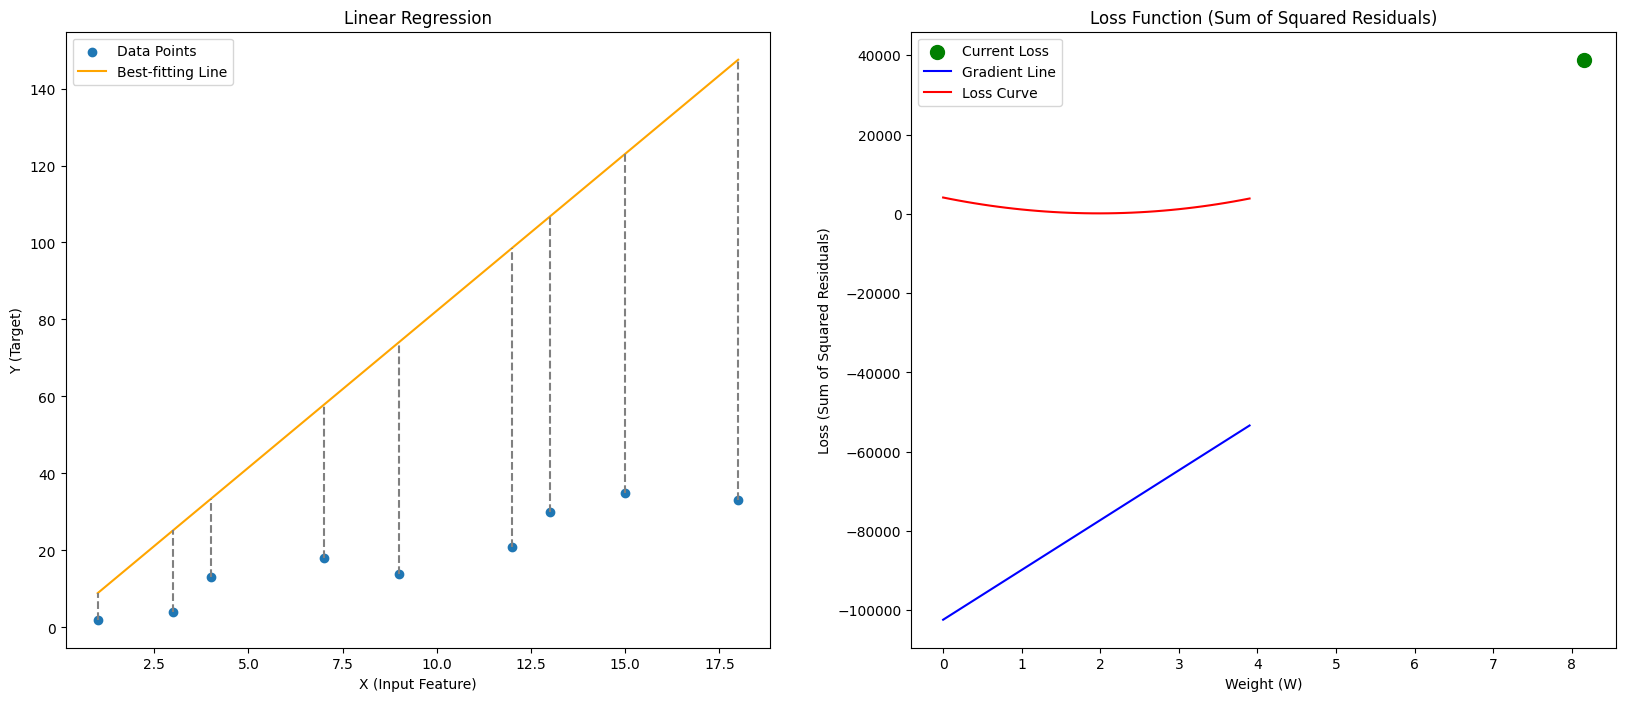

W = -4.410444427349491 | LossFunc Slope = (12562.134858313131) | Distance = 42780.382367417886


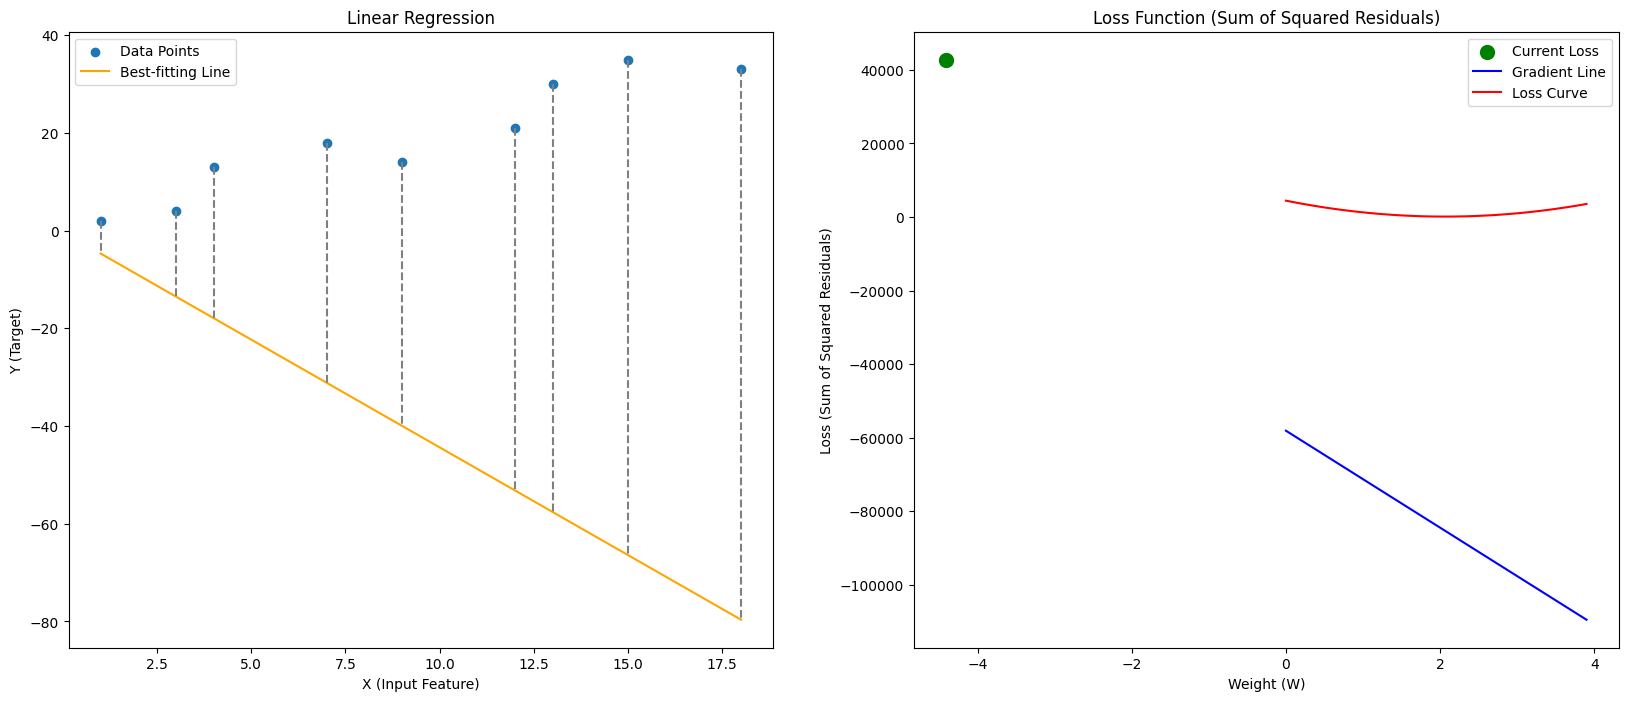

W = 8.769634428229791 | LossFunc Slope = (-13180.078855579282) | Distance = 47085.40034104795


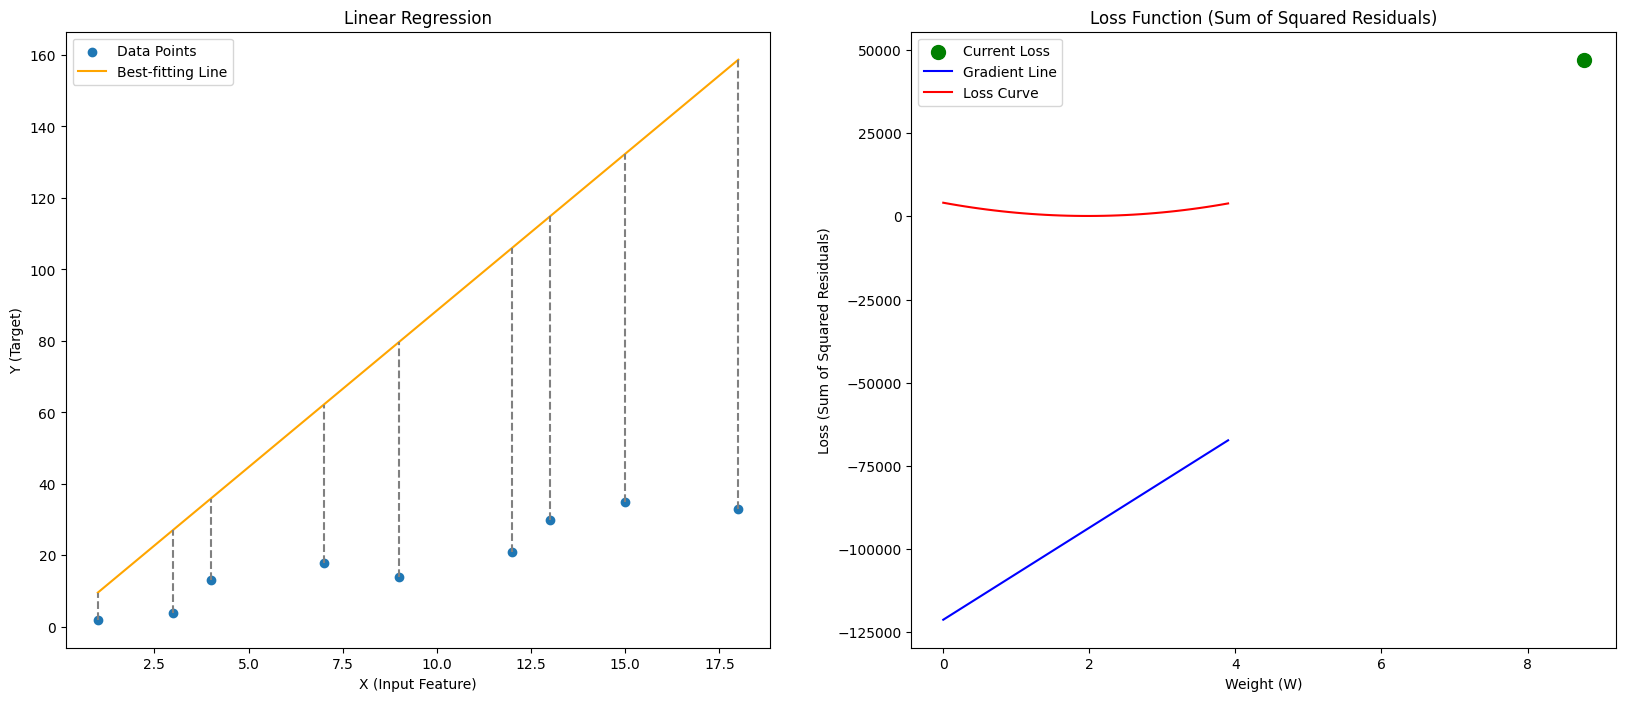

In [ ]:
# Set random W and B
w = 0
b = 0

for i in range(25):
    y_pred = w * x + b
    w, b = calc_gradient(x, y, y_pred, w, b, lr=0.001)

# Linear Regression + GD : Predict Student Performance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score  , mean_absolute_error

plt.style.use("fivethirtyeight")

In [ ]:
df=pd.read_csv("/content/Student_Performance.csv")
df

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced  Performance Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[10000 rows x 6 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Initialize the label encoder to convert categorical data into numerical form
label_encoder = LabelEncoder()

# Encode the 'Extracurricular Activities' column using the label encoder
# This transforms the categorical values (e.g., 'Yes', 'No') into numerical values (e.g., 1, 0)
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])


# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Performance Index']).values.astype(np.float32)
y = df['Performance Index'].values.astype(np.float32)


# standardize the X data (excluding 'Extracurricular Activities' column)

sc_x = StandardScaler()
sc_y = StandardScaler()

X[:,[0, 1, 3, 4]] = sc_x.fit_transform(X[:,[0, 1, 3, 4]]) # Numerical columns
y = sc_y.fit_transform(y.reshape(-1, 1))


# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Set random W and B
w = np.random.random((5,1))
b = np.array([1]).reshape(-1,1)
lr = 0.00001
epochs = 20

losses = []

# Ensure y_train is reshaped to match y_pred
y_train = y_train.reshape(-1, 1)

for i in range(epochs):
    y_pred = np.dot(X_train, w) + b

    w_gradient = np.sum(2 * -1 * X_train * (y_train - y_pred), axis=0).reshape(-1, 1)
    b_gradient = np.sum(2 * -1 * (y_train - y_pred))

    w = w - lr * w_gradient
    b = b - lr * b_gradient

    loss = np.mean((y_train - y_pred) ** 2)
    losses.append(loss)
    print(f"Epoch {i}, Loss: {loss}")


Epoch 0, Loss: 2.296171400174059
Epoch 1, Loss: 1.4849496439430998
Epoch 2, Loss: 0.96388373932028
Epoch 3, Loss: 0.6285376431702859
Epoch 4, Loss: 0.41226265753640845
Epoch 5, Loss: 0.2724657530606854
Epoch 6, Loss: 0.181885632513028
Epoch 7, Loss: 0.12304500647472598
Epoch 8, Loss: 0.08471898092263103
Epoch 9, Loss: 0.059684279468940095
Epoch 10, Loss: 0.04328295198913927
Epoch 11, Loss: 0.03250455984662833
Epoch 12, Loss: 0.025398787399299974
Epoch 13, Loss: 0.020698901245468738
Epoch 14, Loss: 0.017579939484479966
Epoch 15, Loss: 0.015503122572470007
Epoch 16, Loss: 0.014115533255640045
Epoch 17, Loss: 0.01318528794557676
Epoch 18, Loss: 0.012559543216807531
Epoch 19, Loss: 0.012137224953164943


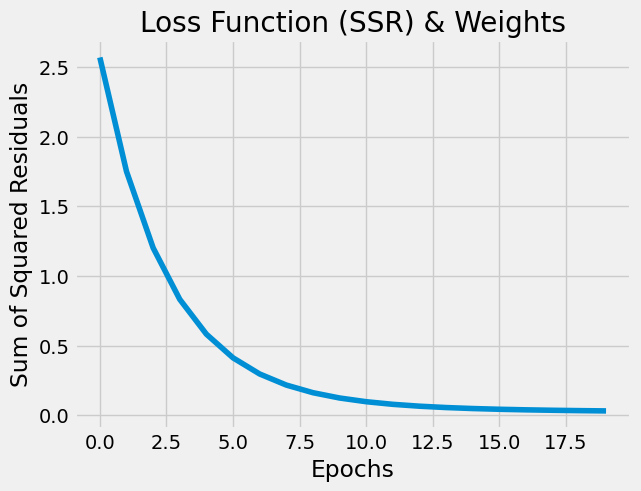

In [ ]:
# Plot different values for W and their SSR
plt.plot(list(range(epochs)), losses)
plt.title("Loss Function (SSR) & Weights")
plt.xlabel("Epochs")
plt.ylabel("Sum of Squared Residuals")
plt.show()

In [ ]:
def inference(x):
  output = np.dot(x, w) + b
  return sc_y.inverse_transform(output)

In [ ]:
inference(X_test[:10])

array([[44.52214692],
       [77.85369807],
       [58.7301433 ],
       [26.07281255],
       [79.55243516],
       [82.68272998],
       [61.00161729],
       [47.52184329],
       [37.52149993],
       [53.83338641]])

# Optimization using Pseudo Inverse

In [ ]:
def Pseudoinverse(X, y):
    X_tr = X.transpose()
    X_ps = np.linalg.inv(X_tr.dot(X)).dot(X_tr)
    weight = X_ps.dot(y)
    return weight

# Calculate weights
w = Pseudoinverse(X_train, y_train)
w

array([[0.38431817],
       [0.91870785],
       [0.01444605],
       [0.04147259],
       [0.02825977]], dtype=float32)

In [ ]:
# Inference & evaluation

y_pred = np.dot(X_test, w)
loss = np.mean((y_test - y_pred) ** 2)
print(f"Loss = {loss}")

Loss = 0.011830572038888931


(0.006, 0.015)

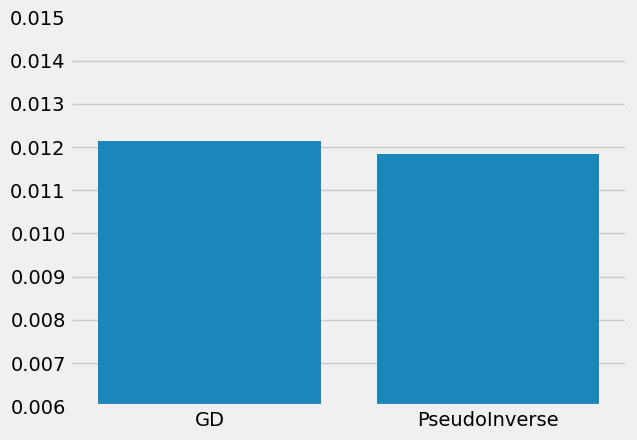

In [ ]:
# Loss comparison
sns.barplot(x=["GD", "PseudoInverse"], y=[losses[-1],loss])
plt.ylim(0.006, 0.015)


# Lab Practice

1- Apply Gradient Descent algorithm, Pseudo Inverse on Job Salaries dataset provided at ([Job Salary Dataset](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data)) <br>
2- Compare your solutions to Scikit-Learn LinearRegression model <br>
3- Which algorithm did better? and why? <br>
4- Now apply Ridge Regression & LASSO and compare the results